# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<a id='content'></a>
### Содержание

[Описание данных](#step0)

Часть 1.  [Знакомство с данными](#step1)


Часть 2.  [Предобработка](#step2)
    
- 2.1. [Изменение типа данных](#step2_1)
   
- 2.2. [Количество комнат](#step2_2)
   
- 2.3. [Число этажей](#step2_3)

- 2.4. [Балконы](#step2_4)

- 2.5. [Высота потолков](#step2_5)

- 2.6. [Аппартаменты](#step2_6)

- 2.7. [Число этажей, Часть 2.](#step2_7)

- 2.8. [Жилая площадь](#step2_8)

- 2.9. [Площадь кухни](#step2_9)

- 2.10. [География](#step2_10)

- 2.11. [Инфраструктура](#step2_11)

- 2.12. [Даты](#step2_12)

Часть 3.  [Добавление расчетных значений](#step3)

Часть 4.  [Анализ данных](#step4)

- 4.1. [Площадь](#step4_1)

- 4.2. [Цена](#step4_2)

- 4.3. [Число комнат](#step4_3)

- 4.4. [Высота потолков](#step4_4)

- 4.5. [Время продажи квартиры.](#step4_5)

- 4.6. [Факторы, влияющие на цену. ](#step4_6)

- 4.7. [Сегмент квартир в центре.](#step4_7)

Часть 5.  [Выводы](#step5)



[В оглавление](#content)

<a id='step0'></a>

<div class="alert alert-info">

<h3> Описание данных </h3>
    
- <b>airports_nearest</b> — расстояние до ближайшего аэропорта в метрах (м)
- <b>balcony</b> — число балконов
- <b>ceiling_height</b> — высота потолков (м)
- <b>cityCenters_nearest</b> — расстояние до центра города (м)
- <b>days_exposition</b> — сколько дней было размещено объявление (от публикации до снятия)
- <b>first_day_exposition</b> — дата публикации
- <b>floor</b> — этаж
- <b>floors_total</b> — всего этажей в доме
- <b>is_apartment</b> — апартаменты (булев тип)
- <b>kitchen_area</b> — площадь кухни в квадратных метрах (м²)
- <b>last_price</b> — цена на момент снятия с публикации
- <b>living_area</b> — жилая площадь в квадратных метрах(м²)
- <b>locality_name</b> — название населённого пункта
- <b>open_plan</b> — свободная планировка (булев тип)
- <b>parks_around3000</b> — число парков в радиусе 3 км
- <b>parks_nearest</b> — расстояние до ближайшего парка (м)
- <b>ponds_around3000</b> — число водоёмов в радиусе 3 км
- <b>ponds_nearest</b> — расстояние до ближайшего водоёма (м)
- <b>rooms</b> — число комнат
- <b>studio</b> — квартира-студия (булев тип)
- <b>total_area</b> — площадь квартиры в квадратных метрах (м²)
- <b>total_images</b> — число фотографий квартиры в объявлении
</div>

[В оглавление](#content)

<a id='step1'></a>

## Шаг 1. Знакомство с данными. 

In [1]:
# Загрузка библиотек
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

from IPython.display import display
pd.options.display.max_columns = 30


Сразу создадим копию наших данных, которую мы будем менять (заполнять пропуски, мнять значения)\
Чтобы мы в любой момент могли обратиться к исходным данным, не запуская каждый раз код сначала.

In [2]:
data = pd.read_csv('real_estate_data.csv', sep='\t')
#data = pd.read_csv('real_estate_data.csv', sep='\t')
data1 = data.copy()
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0



## Описание данных ##
|имя столбца              |описание                                                     |
|:------------------------|:------------------------------------------------------------|
| <b>airports_nearest</b> |- расстояние до ближайшего аэропорта в метрах (м)|
| <b>balcony</b> |- число балконов|
| <b>ceiling_height</b> |— высота потолков (м)|
| <b>cityCenters_nearest</b> |— расстояние до центра города (м)|
| <b>days_exposition</b> |— сколько дней было размещено объявление (от публикации до снятия)|
| <b>first_day_exposition</b> |— дата публикации|
| <b>floor</b> |— этаж|
| <b>floors_total</b> |— всего этажей в доме|
| <b>is_apartment</b> |— апартаменты (булев тип)|
| <b>kitchen_area</b> |— площадь кухни в квадратных метрах (м²)|
| <b>last_price</b> |— цена на момент снятия с публикации|
| <b>living_area</b> |— жилая площадь в квадратных метрах(м²)|
| <b>locality_name</b> |— название населённого пункта|
| <b>open_plan</b> |— свободная планировка (булев тип)|
| <b>parks_around3000</b> |— число парков в радиусе 3 км|
| <b>parks_nearest</b> |— расстояние до ближайшего парка (м)|
| <b>ponds_around3000</b> |— число водоёмов в радиусе 3 км|
| <b>ponds_nearest</b> |— расстояние до ближайшего водоёма (м)|
| <b>rooms</b> |— число комнат|
| <b>studio</b> |— квартира-студия (булев тип)|
| <b>total_area</b> |— площадь квартиры в квадратных метрах (м²)|
| <b>total_images</b> |— число фотографий квартиры в объявлении|

In [3]:
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

None

##### Посмотрим, сколько пропусков в наших данных

In [4]:
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

### Вывод



1. Много пропусков в столбце `ceiling_height` (высота потолков). Можно предположить, что продавец квартиры не посчитал нужным ее обозначить - значит она либо стандартная, либо не имеетдля него значения.                       Счастливые обладатели высоких потолков почти наверняка не забудут их указать в анкете.


2. Пропуски в `floors_total` (число этажей в дома) - 86 штук. Их немного. Странные пропуски. Надо будет смотреть на данные с этими пропусками - вдруг они с чем-нибудь коррелируются. Возможно, речь идет о домах сложной формы, когда в разных частях дома разное количество этажей.


3. Пропуски в столбце `living area` (Жилая площадь). Нехорошие пропуски - их наобум с потолка не заполнишь. И на цену они должны иметь значительное влияние. И их почти 2000. Целых 8%.


4. 20924 пропуска в столбце `is_apartament`! По сути это данные типа bool, но в таблице данные этого столбца отнесены к типу `object`.


5. Пропуски `kithen_area` (площадь кухни) - 2278 - почти 10%. 


6. 11519 пропусков в колонке `balcony` (число балконов). Можно предположить, что их просто не заполнили те, у кого балконов нет. Ведь если балконы есть, то не указать их странно.


7. `locality_name` (Населенный пункт) - 49 попусков! Странно. 


8. Расстояние до парков, водоемов, аэропорта, центра города, - очень много пропусков (5 и 15 тысяч) и на эту информацию надо смотреть отдельно. Эти данные были получены автоматически из картографических данных. Это может быть например показателем настолько большого расстояния, что оно уже не имеет значения. 


9. Пропуски в столбце `days_exposition` (число дней от публикации до снятия объявления) - возможно, это связано с тем, что объявление до сих пор не снято. 


10. В столбце `first_day_exposition` данные типа `data` отнесены к типу `object`

[В оглавление](#content)

<a id='step2'></a>
## Шаг 2. Предобработка данных

<a id='step2_1'></a>
### 2.1. Изменение типа данных

In [5]:
# В коллонках studio и open_plan значения типа bool без пропусков.
# Можем заменить здесь тип на int, для удобства работы.
data1 = data1.astype({'studio': 'int',
                      'open_plan': 'int'})

# Исправим формат даты в столбце 'first_day_exposition' 
# Формат даты: "2018-06-19T00:00:00"
data1['first_day_exposition'] = pd.to_datetime(data1['first_day_exposition'], 
                                               format="%Y-%m-%dT%H:%M:%S")
# Проверим, что получилось: 
display(data1.head(3))
display(data1.info())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.7,16.0,51.0,8,NaN,0,0,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,0,0,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,0,0,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          2775 non-null   object        
 10  studio                23699 non-null  int64         
 11  open_plan             23699 non-null  int64         
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

None

In [6]:
# Еще у нас странный тип данных в 'is_apartment'
data1['is_apartment'].unique()

array([nan, False, True], dtype=object)

In [7]:
display(data1.query('is_apartment != is_apartment'))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,NaN,0,0,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.6,1,NaN,0,0,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.3,4,NaN,0,0,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,NaN,0,0,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,NaN,0,0,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,NaN,0,0,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15,3,NaN,5.0,38.0,4,NaN,0,0,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11,2,NaN,3.0,29.7,1,NaN,0,0,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,NaN,12,NaN,0,0,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


***Это очень неудобный тип данных, и пока совершенно непонятно, что с ним делать - в этом столбце довольно много пропусков неясной природы.***

[В оглавление](#content)

<a id='step2_2'></a>
### 2.2. Изучим количество комнат

In [8]:
data1['rooms'].value_counts()

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64

***Если 1 или 3 комнаты выглядят довольно стандартно, то 15 комнат или 19 комнат - это необычно. \
Изучим многокомнатные предложения - их совсем немного.***

In [9]:
display(data.query('rooms >= 10'))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
648,3,17500000.0,183.7,2018-07-01T00:00:00,11,3.40,7.0,138.8,7,NaN,False,False,13.3,NaN,Санкт-Петербург,23606.0,3148.0,0.0,NaN,0.0,NaN,NaN
866,5,25000000.0,363.0,2017-12-23T00:00:00,14,3.16,5.0,222.0,4,NaN,False,False,16.6,NaN,Санкт-Петербург,38076.0,7950.0,0.0,NaN,2.0,435.0,418.0
4149,6,23000000.0,272.6,2018-01-11T00:00:00,10,3.14,7.0,145.9,7,NaN,False,False,18.8,1.0,Санкт-Петербург,10726.0,12169.0,1.0,191.0,1.0,531.0,NaN
5358,20,65000000.0,590.0,2019-02-14T00:00:00,15,3.50,6.0,409.0,3,NaN,False,False,100.0,NaN,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14.0
9688,8,33000000.0,194.1,2017-02-07T00:00:00,11,3.43,5.0,129.0,2,NaN,False,False,11.9,NaN,Санкт-Петербург,21469.0,1015.0,1.0,686.0,2.0,66.0,813.0
14498,6,32250000.0,374.6,2018-06-09T00:00:00,19,NaN,5.0,264.5,2,NaN,False,False,27.6,NaN,Санкт-Петербург,19497.0,3574.0,0.0,NaN,2.0,548.0,114.0
18119,4,15500000.0,216.1,2016-07-04T00:00:00,10,3.15,5.0,161.4,2,NaN,False,False,19.8,0.0,Санкт-Петербург,24353.0,4921.0,1.0,368.0,0.0,NaN,11.0
18848,6,28500000.0,270.0,2015-03-02T00:00:00,16,3.00,4.0,180.0,4,NaN,False,False,13.0,1.0,Санкт-Петербург,23575.0,4142.0,1.0,516.0,0.0,NaN,1365.0
18891,11,40000000.0,290.0,2016-06-21T00:00:00,10,3.50,6.0,189.4,6,NaN,False,False,30.0,1.0,Санкт-Петербург,26229.0,4932.0,3.0,316.0,1.0,227.0,77.0
19540,8,420000000.0,900.0,2017-12-06T00:00:00,12,2.80,25.0,409.7,25,NaN,False,False,112.0,NaN,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0


- Все многокомнатные квариры (более 10 комнат)расположены в довольно невысоких домах (4-7 этажей), кроме единственной квартиры на последнем этаже 25-этажного дома. 
- У всех довольно большие площади (от 183 до 900 кв.м.)
- У всех стоят пропуски в колонке "is_apartment"
- Все расположены непосредственно в Санкт-Петербурге
- Число балконов - либо 0, либо 1, либо NaN.
- Потолки довольно высокие - почти все выше 3 метров (исключение - 2.8 метра в 12-комнатной квартире на 25 этаже)

***0 комнат - это тоже не совсем обычно.\
У нас таких - 197 квартир. \
Посмотрим на них:***

In [10]:
rooms0 = data1.query('rooms == 0')
display(rooms0)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30,0,NaN,24.0,15.50,2,NaN,1,0,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0
349,4,2320000.0,25.00,2017-09-27,0,NaN,14.0,17.00,1,NaN,0,1,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
440,8,2480000.0,27.11,2018-03-12,0,NaN,17.0,24.75,4,NaN,1,0,NaN,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
508,0,3375000.0,34.40,2017-03-28,0,NaN,26.0,24.30,19,NaN,0,1,NaN,1.0,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0
608,2,1850000.0,25.00,2019-02-20,0,NaN,10.0,NaN,7,NaN,1,0,NaN,NaN,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3200000.0,26.00,2017-09-01,0,NaN,25.0,18.00,16,NaN,1,0,NaN,0.0,Санкт-Петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14.0
23442,0,2500000.0,27.70,2017-09-28,0,NaN,24.0,18.00,4,NaN,0,1,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,4.0
23554,15,3350000.0,26.00,2018-09-07,0,NaN,19.0,NaN,8,NaN,1,0,NaN,NaN,Санкт-Петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,31.0
23592,10,1450000.0,29.00,2017-11-11,0,NaN,9.0,18.00,8,NaN,0,1,NaN,2.0,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,82.0


In [11]:
rooms0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 144 to 23637
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          197 non-null    int64         
 1   last_price            197 non-null    float64       
 2   total_area            197 non-null    float64       
 3   first_day_exposition  197 non-null    datetime64[ns]
 4   rooms                 197 non-null    int64         
 5   ceiling_height        82 non-null     float64       
 6   floors_total          194 non-null    float64       
 7   living_area           183 non-null    float64       
 8   floor                 197 non-null    int64         
 9   is_apartment          6 non-null      object        
 10  studio                197 non-null    int64         
 11  open_plan             197 non-null    int64         
 12  kitchen_area          0 non-null      float64       
 13  balcony         

1. Во всех этих квартирах пропущены значения площади кухни. То есть похоже, что речь идет о квартирах-студиях или о квартирах со свободной планировкой, где нет отдельной кухни. Одна из задач, которую предстоит решить - посчитать отношение площади кухни к общей площади. Возможно, в таких квартирах площадь кухни можно принять за 0, и это не повредит нашим данным. 


2. Почти все значения в `is_apartment` пропущены (кроме 6 сток)


3. Много пропусков в высотах потолков.

In [12]:
rooms0[rooms0['ceiling_height'].notnull()]['ceiling_height'].value_counts()

2.70     22
2.80     14
2.75     12
2.60      9
3.00      3
2.65      3
3.10      3
2.76      2
2.50      2
2.90      1
3.30      1
3.33      1
3.50      1
2.55      1
3.57      1
2.68      1
27.00     1
5.80      1
2.64      1
2.77      1
2.74      1
Name: ceiling_height, dtype: int64

Известные высоты потолков в студиях похожи на стандартные: 2.7 - 2.8 м.

In [13]:
# Посмотрим, есть ли в этой выборке (с нулем комнат) квартиры ,
# в которых одновременно параметры studio и open_plan имеют значения False
print ('Одновременно studio и open_plan имеют значения False:')
display(rooms0.query('studio == 0 and open_plan == 0'))

print()
print()
# И в которых эти параметры одновременно True
print ('Одновременно studio и open_plan имеют значения True:')
display(rooms0.query('studio == 1 and open_plan == 1'))


Одновременно studio и open_plan имеют значения False:


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition




Одновременно studio и open_plan имеют значения True:


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


***То еть все квартиры с нулём комнат - это либо студии, либо open_plan. \
Площадь кухонь в этой выборке можно считать равной нулю.***

In [14]:
# Посмотрим на непропущенные строки в is_apartment:
display(rooms0[rooms0['is_apartment'].notnull()])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
839,14,1900000.0,35.0,2017-04-14,0,2.70,5.0,15.0,3,False,0,1,NaN,1.0,поселок Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,7.0
4930,6,2176000.0,23.0,2017-12-08,0,2.90,4.0,19.0,1,False,1,0,NaN,NaN,Санкт-Петербург,31391.0,3659.0,1.0,484.0,3.0,214.0,7.0
5855,3,945750.0,19.5,2017-09-18,0,2.76,3.0,12.7,2,False,1,0,NaN,0.0,поселок городского типа Дубровка,NaN,NaN,NaN,NaN,NaN,NaN,3.0
7256,16,3500000.0,29.2,2017-04-16,0,2.64,16.0,16.7,3,False,1,0,NaN,2.0,Санкт-Петербург,17693.0,12516.0,0.0,NaN,0.0,NaN,28.0
10534,10,2100000.0,26.7,2018-08-03,0,NaN,17.0,14.2,7,False,1,0,NaN,1.0,деревня Новое Девяткино,NaN,NaN,NaN,NaN,NaN,NaN,18.0
20584,12,2170000.0,22.2,2018-11-04,0,NaN,18.0,16.6,7,False,1,0,NaN,1.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,36.0


Единственным ненулевым значениям is_apartment в квартирах без комнат соответствует только значение False.

In [15]:
# Проверим сразу, сколько у нас квартир в полных данных с околонулевыми площадями кухонь.
display(data1.query('kitchen_area <= 2'))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
906,15,2600000.0,27.00,2017-07-10,1,2.75,23.0,18.0,18,NaN,0,0,2.0,0.0,Санкт-Петербург,22131.0,17459.0,0.0,NaN,1.0,411.0,10.0
6262,9,3100000.0,24.00,2018-06-25,2,3.00,5.0,16.0,5,NaN,0,0,2.0,NaN,Санкт-Петербург,31960.0,4914.0,2.0,426.0,1.0,936.0,54.0
9138,17,2920000.0,23.29,2018-12-12,1,NaN,3.0,21.0,1,NaN,0,0,2.0,NaN,Санкт-Петербург,19506.0,4008.0,0.0,NaN,2.0,45.0,107.0
11033,6,5350000.0,32.00,2016-04-20,1,NaN,14.0,16.0,10,NaN,0,0,2.0,0.0,Санкт-Петербург,19008.0,3953.0,0.0,NaN,1.0,69.0,210.0
16367,2,2720000.0,25.70,2017-10-30,1,NaN,19.0,22.6,11,NaN,0,0,2.0,NaN,Санкт-Петербург,14472.0,13268.0,0.0,NaN,0.0,NaN,109.0
19642,5,1190000.0,14.00,2018-07-29,1,NaN,5.0,11.0,1,NaN,0,0,2.0,NaN,Санкт-Петербург,9898.0,11122.0,0.0,NaN,0.0,NaN,4.0
20217,7,4250000.0,28.50,2019-05-01,1,2.80,14.0,19.5,10,NaN,0,0,1.3,NaN,Санкт-Петербург,37199.0,12721.0,0.0,NaN,0.0,NaN,NaN
21419,4,1870000.0,20.00,2018-03-06,1,2.50,5.0,14.0,1,NaN,0,0,2.0,NaN,Санкт-Петербург,16652.0,15654.0,1.0,619.0,1.0,937.0,45.0


Нет нулевых значений площади кухни. Самые маленькие площади - 2 и даже 1.3 кв.м.\
То есть если мы пропуски в плщадях кухонь заменим на ноль, то мы их не потеряем - они будут отличаться от всех остальных кухонь. И это не будет противоречить нашей задаче (мы сможем посчитать конверсию площади кухонь к общей площади - деления на ноль не возникнет)...

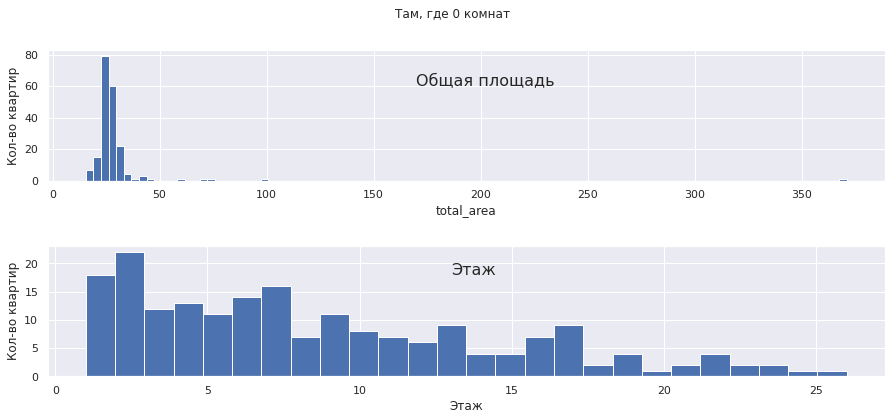

In [16]:
# Гистограммы для квартир с rooms=0.
plt.figure(figsize=(15,6))
plt.subplots_adjust(hspace=0.5)
plt.suptitle('Там, где 0 комнат')

plt.subplot(2,1,1)
plt.text(170, 60, 'Общая площадь', fontsize=16)
rooms0['total_area'].hist(bins=100)
plt.xlabel('total_area')
plt.ylabel('Кол-во квартир')

plt.subplot(2,1,2)
plt.text(13, 18, 'Этаж', fontsize=16)
rooms0['floor'].hist(bins=26)
plt.xlabel('Этаж')
plt.ylabel('Кол-во квартир')

plt.show()

#### Вывод.

- Большинство квартир имеют 1, 2 или 3 комнаты:
|комнат |количество |
|:-----:|:---------:|
|1      |  8047|
|2      |  7940|
|3      |  5814|

- Четырехкомнатные квартиры встречаются реже, но их все равно довольно много - 1180 (5% всех квартир)

- 0 комнат. Это все квартиры типа `studio` и `open_plan` (197 строк). 
  - В них отсутствуют кухни. 
  - У этих квартир разнообразная география 
  - среди известных значений высот потолков (86 строк) почти все значения находятся в пределах 2.7 - 2.8 м.
  - преобладают небольшие площади квартир - в основном 25-30 кв.м.

- 5-7 комнат встречаются значительно реже:
|комнат |количество |
|:-----:|:---------:|
|5      |   326|
|6      |   105|
|7      |    59|

- Больше семи комнат встречается совсем редко. Это единичные случаи. Есть и вовсе уникальные случаи с 15, 16 и 19 комнатами.
|комнат |количество |
|:-----:|:---------:|
|8      | 12  |
|9      |  8  |
|10     |  3  |
|11     |  2  |
|14     |  2  |
|19     |  1  |
|16     |  1  |
|12     |  1  |
|15     |  1  |

- Все многокомнатные квариры (более 10 комнат) имеют общие черты:
    - расположены в довольно невысоких домах (4-7 этажей), кроме единственной квартиры на последнем этаже 25-этажного дома.
    - У всех довольно большие площади (от 183 до 900 кв.м.)
    - У всех стоят пропуски в колонке "is_apartment"
    - Все расположены непосредственно в Санкт-Петербурге
    - Число балконов - либо 0, либо 1, либо NaN.
    - Потолки довольно высокие - почти все выше 3 метров (исключение - 2.8 метра в 12-комнатной квартире на 25 этаже)



[В оглавление](#content)

<a id='step2_3'></a>
### 2.3. Число этажей.

In [17]:
data1['floors_total'].value_counts()

5.0     5788
9.0     3761
16.0    1376
12.0    1362
4.0     1200
10.0    1174
25.0    1075
6.0      914
17.0     833
3.0      668
7.0      592
14.0     553
18.0     505
24.0     469
8.0      390
2.0      383
15.0     365
23.0     352
19.0     339
22.0     286
20.0     271
13.0     229
11.0     203
27.0     164
21.0     158
26.0     124
1.0       25
35.0      24
28.0      21
36.0       3
37.0       1
34.0       1
33.0       1
60.0       1
29.0       1
52.0       1
Name: floors_total, dtype: int64

Топ самых популярных этажностей: 5, 9, 16, 12, 4, 10 и 25 этажей.\
Похоже на преобладание типовых проектов на рынке :).\
Это может нам помочь в заполнении некоторых пропусков  в высотах потолков, например.

В наших данных есть малоэтажные здания (1-3 этажа). Есть вероятность, что сюда может попадать частный сектор, с какими-нибудь характерными параметрами, которые можно будет учесть при дальнейшей обработке. Посмотрим на эти данные, пока мы их не изменили

##### сделаем срезы по одноэтажным и двухэтажным зданиям.

In [18]:
floor1 = data1.query('floors_total == 1')
display(floor1.head(5))

floor2 =  data1.query('floors_total == 2')
display(floor1.head(5))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3076,20,2000000.0,80.0,2018-01-03,3,NaN,1.0,48.5,1,NaN,0,0,10.0,NaN,Волосово,NaN,NaN,NaN,NaN,NaN,NaN,44.0
4379,5,5300000.0,58.5,2017-11-15,2,NaN,1.0,31.6,1,NaN,0,0,9.4,NaN,поселок городского типа Рощино,NaN,NaN,NaN,NaN,NaN,NaN,226.0
5300,5,2990000.0,60.0,2018-11-15,3,NaN,1.0,50.0,1,NaN,0,0,10.0,NaN,поселок станции Вещево,NaN,NaN,NaN,NaN,NaN,NaN,40.0
5698,7,450000.0,42.0,2017-07-31,2,NaN,1.0,23.0,1,NaN,0,0,5.8,NaN,городской посёлок Будогощь,NaN,NaN,NaN,NaN,NaN,NaN,233.0
5787,16,9000000.0,88.0,2018-08-06,3,NaN,1.0,NaN,1,NaN,0,0,NaN,NaN,Санкт-Петербург,44870.0,20802.0,0.0,NaN,1.0,792.0,60.0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3076,20,2000000.0,80.0,2018-01-03,3,NaN,1.0,48.5,1,NaN,0,0,10.0,NaN,Волосово,NaN,NaN,NaN,NaN,NaN,NaN,44.0
4379,5,5300000.0,58.5,2017-11-15,2,NaN,1.0,31.6,1,NaN,0,0,9.4,NaN,поселок городского типа Рощино,NaN,NaN,NaN,NaN,NaN,NaN,226.0
5300,5,2990000.0,60.0,2018-11-15,3,NaN,1.0,50.0,1,NaN,0,0,10.0,NaN,поселок станции Вещево,NaN,NaN,NaN,NaN,NaN,NaN,40.0
5698,7,450000.0,42.0,2017-07-31,2,NaN,1.0,23.0,1,NaN,0,0,5.8,NaN,городской посёлок Будогощь,NaN,NaN,NaN,NaN,NaN,NaN,233.0
5787,16,9000000.0,88.0,2018-08-06,3,NaN,1.0,NaN,1,NaN,0,0,NaN,NaN,Санкт-Петербург,44870.0,20802.0,0.0,NaN,1.0,792.0,60.0


In [19]:
print("Число одноэтажных домов: ", floor1.shape[0])
print("Число двухэтажных домов: ", floor2.shape[0])
print()
floor1.info()

Число одноэтажных домов:  25
Число двухэтажных домов:  383

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 3076 to 23498
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          25 non-null     int64         
 1   last_price            25 non-null     float64       
 2   total_area            25 non-null     float64       
 3   first_day_exposition  25 non-null     datetime64[ns]
 4   rooms                 25 non-null     int64         
 5   ceiling_height        10 non-null     float64       
 6   floors_total          25 non-null     float64       
 7   living_area           20 non-null     float64       
 8   floor                 25 non-null     int64         
 9   is_apartment          1 non-null      object        
 10  studio                25 non-null     int64         
 11  open_plan             25 non-null     int64         
 12  kitchen_area  

- 25 одноэтажных домов. 
- 15 пропусков в высотах потолков
- По 24 пропуска в `is apartment` и в `balcony`

В одноэтажных домах балконов обычно нет, и можно предположить, что пропуски здесь соответствуют значению 0.

In [20]:
floor2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383 entries, 52 to 23561
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          383 non-null    int64         
 1   last_price            383 non-null    float64       
 2   total_area            383 non-null    float64       
 3   first_day_exposition  383 non-null    datetime64[ns]
 4   rooms                 383 non-null    int64         
 5   ceiling_height        215 non-null    float64       
 6   floors_total          383 non-null    float64       
 7   living_area           359 non-null    float64       
 8   floor                 383 non-null    int64         
 9   is_apartment          45 non-null     object        
 10  studio                383 non-null    int64         
 11  open_plan             383 non-null    int64         
 12  kitchen_area          349 non-null    float64       
 13  balcony          

Оценим высоты потолков в одноэтажных домах

In [21]:
floor1['ceiling_height'].value_counts()

3.00    3
2.90    2
2.70    1
2.45    1
2.30    1
2.65    1
2.50    1
Name: ceiling_height, dtype: int64

In [22]:
floor2['ceiling_height'].value_counts()

2.50     45
3.00     38
2.60     25
2.70     21
2.80     13
2.55     11
2.90     10
3.20      7
2.75      6
3.50      5
2.65      3
3.10      3
3.30      3
4.00      2
3.70      2
3.40      2
2.95      2
3.05      2
27.00     2
1.20      1
2.63      1
2.57      1
3.80      1
2.68      1
2.62      1
2.00      1
2.77      1
2.74      1
2.47      1
2.20      1
2.85      1
2.53      1
Name: ceiling_height, dtype: int64

***Очень большое разнообразие значений. Между 2.50 и 2.53 разница незначительная, и в масштабах высоты квартиры часто такая разница не имеет значения.\
Скорее всего, можно сильно упростить просмотр, округлив значения высот потолков до десятых долей:***

In [23]:
floor2 = floor2.round({'ceiling_height' : 1})
floor2['ceiling_height'].value_counts()

2.5     47
2.6     42
3.0     42
2.7     23
2.8     21
2.9     10
3.2      7
3.5      5
3.1      3
3.3      3
3.7      2
3.4      2
27.0     2
4.0      2
2.2      1
3.8      1
1.2      1
2.0      1
Name: ceiling_height, dtype: int64

*Так понятнее и нагляднее.*

- Много значений 2.5 (и 2.6) - это довольно невысокие потолки.

- Высота 27 метров больше похожа на ошибку при записи, и, вероятно, соответствует в реальности высоте 2.7 м.

- В остальном... явных закономерностей пока не наблюдается. И нет понимания, чем можно заменить отсутствующие значения высот потолков.

Посмотрим на географию одноэтажных домов.

In [24]:
floor1['locality_name'].unique()

array(['Волосово', 'поселок городского типа Рощино',
       'поселок станции Вещево', 'городской посёлок Будогощь',
       'Санкт-Петербург', 'Луга', 'Сестрорецк', 'посёлок Гаврилово',
       'деревня Сижно', 'поселок городского типа Ефимовский',
       'деревня Большие Колпаны', 'посёлок Стрельна',
       'городской поселок Большая Ижора', 'поселок Оредеж',
       'деревня Каськово', 'посёлок Суйда',
       'городской посёлок Свирьстрой', 'посёлок городского типа Рощино',
       'посёлок Сосново', 'поселок Пчевжа', 'Зеленогорск', 'Высоцк'],
      dtype=object)

In [25]:
floor2['locality_name'].unique()

array(['Санкт-Петербург', 'Кировск', 'Выборг',
       'поселок городского типа Синявино', 'Луга', 'деревня Лопухинка',
       'Всеволожск', 'посёлок городского типа Токсово',
       'посёлок городского типа Вырица', 'деревня Вартемяги',
       'посёлок городского типа Сиверский', 'Красное Село',
       'поселок городского типа Рахья', 'поселок городского типа Вырица',
       'посёлок Тельмана', 'городской посёлок Мга', 'посёлок Песочный',
       'Пушкин', 'Гатчина', 'деревня Чудской Бор', 'деревня Мины',
       'деревня Коркино', 'посёлок Ропша', 'посёлок Гаврилово',
       'Коммунар', 'Лодейное Поле', 'посёлок Репино', 'посёлок Парголово',
       'деревня Малые Колпаны', 'поселок Углово',
       'садовое товарищество Рахья', 'Кронштадт', 'поселок Елизаветино',
       'городской посёлок Новоселье', 'Подпорожье', 'поселок Гаврилово',
       'городской посёлок Янино-1', 'Сясьстрой', 'поселок Кобринское',
       'деревня Пчева', 'поселок Терволово', 'посёлок Мичуринское',
       'деревня 

Разнообразно, много пригорода.

Посмотрим, много ли одноэтажек и двухэтажек в самом Петербурге:

In [26]:
floor1.query('locality_name == "Санкт-Петербург"')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5787,16,9000000.0,88.0,2018-08-06,3,NaN,1.0,NaN,1,NaN,0,0,NaN,NaN,Санкт-Петербург,44870.0,20802.0,0.0,NaN,1.0,792.0,60.0
11641,6,3685000.0,44.7,2018-07-05,1,2.5,1.0,23.5,1,NaN,0,0,15.0,NaN,Санкт-Петербург,41351.0,15457.0,0.0,NaN,3.0,534.0,112.0


In [27]:
print("Число двухэтажных домов в Петербурге: ", 
      floor2.query('locality_name == "Санкт-Петербург"').shape[0])

floor2.query('locality_name == "Санкт-Петербург"')

Число двухэтажных домов в Петербурге:  48


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
52,20,11795000.0,136.00,2017-09-22,6,3.0,2.0,94.00,2,NaN,0,0,11.0,1.0,Санкт-Петербург,16510.0,6582.0,1.0,526.0,0.0,NaN,NaN
402,12,4370000.0,55.00,2015-01-20,3,NaN,2.0,38.00,2,NaN,0,0,5.0,1.0,Санкт-Петербург,21399.0,23111.0,0.0,NaN,1.0,758.0,722.0
517,20,6800000.0,65.53,2019-01-08,3,NaN,2.0,47.70,2,NaN,0,0,5.8,NaN,Санкт-Петербург,39533.0,11236.0,2.0,596.0,0.0,NaN,58.0
750,9,29500000.0,188.80,2017-03-04,7,2.7,2.0,119.30,1,NaN,0,0,10.2,0.0,Санкт-Петербург,20965.0,814.0,0.0,NaN,2.0,267.0,246.0
757,10,4900000.0,41.30,2017-07-04,2,NaN,2.0,30.30,1,NaN,0,0,5.0,0.0,Санкт-Петербург,41059.0,15542.0,1.0,599.0,2.0,406.0,84.0
872,10,8200000.0,64.00,2017-06-02,2,NaN,2.0,39.00,2,NaN,0,0,10.0,0.0,Санкт-Петербург,22767.0,2309.0,1.0,700.0,0.0,NaN,160.0
1170,3,12500000.0,114.20,2017-02-14,5,3.5,2.0,79.30,1,False,0,0,NaN,0.0,Санкт-Петербург,32834.0,4362.0,0.0,NaN,2.0,650.0,69.0
2179,7,5680000.0,77.00,2017-11-10,4,3.7,2.0,50.80,1,NaN,0,0,10.0,NaN,Санкт-Петербург,28918.0,7765.0,2.0,506.0,1.0,1007.0,168.0
2489,9,12500000.0,255.00,2017-04-21,3,NaN,2.0,153.90,2,NaN,0,0,100.7,0.0,Санкт-Петербург,29544.0,6916.0,0.0,NaN,3.0,198.0,102.0
2805,2,2100000.0,45.00,2019-04-12,2,2.5,2.0,31.00,1,NaN,0,0,6.0,NaN,Санкт-Петербург,37842.0,17233.0,0.0,NaN,1.0,409.0,NaN


Немного. Одноэтажных домов - всего два. В 20 и в 15 км от центра.\
Двухэтажных - 48 (из 383 - 12.5%). Высоты потолков очень разнообразные. 

Посмотрим, какие площади встречаются у одноэтажных домов:

In [28]:
floor1['total_area'].describe()

count     25.000000
mean      61.212000
std       22.097574
min       31.000000
25%       45.000000
50%       54.000000
75%       80.000000
max      115.000000
Name: total_area, dtype: float64

от 31 до 115 квадратных метров. Медиана - 54. Среднее - 61.

In [29]:
floor2['total_area'].describe()

count    383.000000
mean      57.103864
std       42.196760
min       18.000000
25%       37.250000
50%       45.000000
75%       61.700000
max      400.000000
Name: total_area, dtype: float64

In [30]:
print('балконы в одноэтажных домах:')
display(floor1['balcony'].value_counts())
print()
print('Разнообразие балконов в 2-этажных домах:')
display(floor2['balcony'].value_counts())

балконы в одноэтажных домах:


0.0    1
Name: balcony, dtype: int64


Разнообразие балконов в 2-этажных домах:


0.0    68
1.0    46
2.0    13
4.0     6
Name: balcony, dtype: int64

In [31]:
print('комнаты в одноэтажных домах:')
display(floor1['rooms'].value_counts())
print()
print('Разнообразие комнат в 2-этажных домах:')
display(floor2['rooms'].value_counts())

комнаты в одноэтажных домах:


2    13
3    10
1     2
Name: rooms, dtype: int64


Разнообразие комнат в 2-этажных домах:


2    185
1     90
3     80
4     13
5      7
6      3
7      3
9      2
Name: rooms, dtype: int64

В частном секторе в двухэтажном доме вполне может быть и 4 и 9 комнат. Но там и высота потолков непредсказуемая.\
Есть еще многоквартирные двухэтажные дома. Для них скорее будет характерны от 1 до 3 комнат.

In [32]:
# Посмотрим, вдруг в двухэтажных домах с малым количеством комнат потолки более стандартные:
floor2_room4 = floor2.query('rooms < 4')
display(floor2_room4['ceiling_height'].value_counts())

2.5     45
2.6     42
3.0     35
2.7     21
2.8     18
2.9      9
3.2      6
3.5      4
3.4      2
3.1      2
4.0      2
3.7      1
27.0     1
2.2      1
3.3      1
3.8      1
1.2      1
2.0      1
Name: ceiling_height, dtype: int64

но нет... не удалось. Потолки таже разнообразны.

In [33]:
# В данных по одноэтажным домам всго одна строчка с ненулевым значением 'is_apartment'. Посмотрим на нее:
floor1.query('is_apartment == False or is_apartment == True')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23498,7,1600000.0,54.0,2016-12-26,2,2.3,1.0,33.0,1,False,0,0,3.5,0.0,Высоцк,NaN,NaN,NaN,NaN,NaN,NaN,281.0


- 25 одноэтажных домов. С небольшой в среднем общей площадью (45-80 кв.метров).
- Самый низкий потолк (2.3 метра)  (и кухня малюсенькая - всего 3.5 метра).
- Только две квартиры - в Петербурге. Остальные - в пригороде.
- Много пропусков в высотах потолков (более половины). Но при этом среди известных значений не обнаружено каких-либо закономерностей.

В двухэтажных домах самые популярные высоты потолков:

|высота |количество|
|:------|:---------|
|2.5 |    47|
|2.6 |    42|
|3.0 |    42|
|2.7 |    23|
|2.8 |    21|
|2.9 |    10|

In [34]:
# Посмотрим, есть ли закономерности  среди квартир с высотой потолков 2.5 метра в 2-этажных домах
display(floor2.query('ceiling_height == 2.5'))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
925,8,2750000.0,50.00,2015-03-31,2,2.5,2.0,26.50,1,False,0,0,9.00,2.0,деревня Вартемяги,NaN,NaN,NaN,NaN,NaN,NaN,484.0
1312,5,750000.0,26.00,2018-02-03,1,2.5,2.0,18.00,1,NaN,0,0,6.00,NaN,поселок городского типа Вырица,NaN,NaN,NaN,NaN,NaN,NaN,167.0
2296,6,650000.0,26.40,2018-03-18,1,2.5,2.0,17.00,2,NaN,0,0,9.40,NaN,посёлок Гаврилово,NaN,NaN,NaN,NaN,NaN,NaN,35.0
2805,2,2100000.0,45.00,2019-04-12,2,2.5,2.0,31.00,1,NaN,0,0,6.00,NaN,Санкт-Петербург,37842.0,17233.0,0.0,NaN,1.0,409.0,NaN
3130,20,7200000.0,75.70,2016-01-13,3,2.5,2.0,47.90,2,NaN,0,0,10.20,0.0,Пушкин,18924.0,33778.0,1.0,600.0,0.0,NaN,253.0
3366,10,2400000.0,42.80,2017-08-16,2,2.5,2.0,27.70,1,NaN,0,0,5.80,NaN,поселок Терволово,NaN,NaN,NaN,NaN,NaN,NaN,188.0
3403,20,2450000.0,42.40,2017-07-19,2,2.5,2.0,29.70,1,NaN,0,0,4.20,NaN,деревня Лесколово,NaN,NaN,NaN,NaN,NaN,NaN,363.0
4392,14,2500000.0,42.00,2016-01-25,2,2.5,2.0,27.50,1,NaN,0,0,5.30,NaN,деревня Фёдоровское,NaN,NaN,NaN,NaN,NaN,NaN,689.0
4409,0,2100000.0,33.00,2015-12-18,1,2.5,2.0,20.00,2,NaN,0,0,9.00,0.0,поселок Стеклянный,NaN,NaN,NaN,NaN,NaN,NaN,206.0
4443,15,990000.0,37.00,2017-01-09,2,2.5,2.0,27.00,2,NaN,0,0,6.00,0.0,посёлок городского типа Кузнечное,NaN,NaN,NaN,NaN,NaN,NaN,281.0


In [35]:
# Сравним с трехметровыми потолками
display(floor2.query('ceiling_height == 3.0'))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
52,20,11795000.0,136.00,2017-09-22,6,3.0,2.0,94.00,2,NaN,0,0,11.00,1.0,Санкт-Петербург,16510.0,6582.0,1.0,526.0,0.0,NaN,NaN
606,5,790000.0,38.60,2018-04-03,2,3.0,2.0,24.00,1,NaN,0,0,6.00,NaN,поселок городского типа Синявино,NaN,NaN,NaN,NaN,NaN,NaN,374.0
610,6,1800000.0,32.00,2018-08-04,1,3.0,2.0,17.00,1,NaN,0,0,7.00,NaN,Луга,NaN,NaN,NaN,NaN,NaN,NaN,37.0
2414,20,29500000.0,115.00,2017-07-21,3,3.0,2.0,69.75,2,NaN,0,0,19.20,4.0,Пушкин,14456.0,26609.0,3.0,229.0,3.0,172.0,328.0
2454,12,28000000.0,160.00,2016-10-24,3,3.0,2.0,92.00,2,NaN,0,0,30.00,4.0,посёлок Репино,61484.0,42583.0,0.0,NaN,0.0,NaN,NaN
2547,0,2550000.0,43.00,2019-03-30,2,3.0,2.0,26.00,1,False,0,0,5.00,NaN,Кировск,NaN,NaN,NaN,NaN,NaN,NaN,33.0
2636,16,2900000.0,58.00,2019-02-12,2,3.0,2.0,32.00,1,False,0,0,10.00,2.0,поселок Углово,NaN,NaN,NaN,NaN,NaN,NaN,69.0
4200,15,2050000.0,45.99,2017-12-10,2,3.0,2.0,28.47,2,NaN,0,0,6.55,1.0,Кировск,NaN,NaN,NaN,NaN,NaN,NaN,246.0
5659,2,11067416.0,160.70,2018-08-01,2,3.0,2.0,NaN,1,NaN,0,0,NaN,NaN,посёлок Репино,61451.0,42550.0,0.0,NaN,0.0,NaN,238.0
5967,20,2000000.0,63.70,2018-09-23,3,3.0,2.0,NaN,2,NaN,0,0,NaN,NaN,посёлок городского типа Ульяновка,NaN,NaN,NaN,NaN,NaN,NaN,96.0


Нет явных закономерностей. \
Разве что в квартирах с потолками 2.5 метра почти нет трехкомнатных квартир. Но при этом однокомнатные и двухкомнатные квартиры с трехметровыми потолками тоже присутствуют в достаточном количестве.  


##### Вывод.
В одноэтажных и двухэтажных домах довольно много пропусков в высотах потолков, и нам так пока и не удалось найти каких-либо закономерностей в распределении высот потолков в малоэтажных домах.

[В оглавление](#content)

<a id='step2_4'></a>
### 2.4. Балконы.

Интуитивно понятно, что в одноэтажных домах балконов нет. Но в этой категории у нас всего 25 квартир (у 24 из которых в графе `balcony` стоят пропуски).\

Также выше мы разобрались, что в квартирах с числом комнат больше 10, в объявления фигурирует либо 1 балкон, либо ноль, либо пропуск. Но таких квартир в наших данных тоже не очень то много.\

В полных же данных пропусков в этом столбце у нас было значительно больше. \
Проверим:

In [36]:
print('Пропуски в стобце "balсony": ', data1.query('balcony != balcony').shape[0])
data1.query('balcony != balcony').head()

Пропуски в стобце "balсony":  11519


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,NaN,0,0,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,NaN,0,0,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10,1,NaN,12.0,14.40,5,NaN,0,0,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23,1,NaN,27.0,15.43,26,NaN,0,0,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
10,5,5050000.0,39.60,2017-11-16,1,2.67,12.0,20.30,3,NaN,0,0,8.50,NaN,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0


***11.5 тысяч пропусков!***

In [37]:
# Оценим разнообразие количества балконов:
data1['balcony'].value_counts()

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

- Удивительно, что 4 и 5 балконов встречаются чаще, чем 3 балкона.

- Если 1 или 2 балкона, это довольно стандартная ситуация, то 4-5 балконов - это необычно и может показать какие-нибудь закономерности..

In [38]:
data1.pivot_table(index='balcony', 
                  values=('rooms', 'total_area', 'living_area', 'ceiling_height', 'floors_total'), 
                  aggfunc={'count', 'median', 'min', 'max'})

ceiling_height                     floors_total                    \
                 count     max median  min        count   max median  min   
balcony                                                                     
0.0               1425    5.80   2.70  2.0         3713  35.0    9.0  1.0   
1.0               2850   27.00   2.60  2.0         4195  36.0    9.0  2.0   
2.0               2536   27.50   2.70  2.0         3657  36.0   12.0  2.0   
3.0                 74    3.47   2.65  2.4           81  25.0    9.0  3.0   
4.0                141   32.00   2.75  2.5          183  27.0    9.0  2.0   
5.0                231  100.00   2.70  2.4          304  36.0   12.0  3.0   

        living_area                     rooms                total_area  \
              count    max median   min count max median min      count   
balcony                                                                   
0.0            3580  347.5  30.20   8.0  3758  14      2   0       3758   
1.0            4057  322.3  29.50   3.0  4195  16      2   0       4195   
2.0            3511  300.0  29.00   5.0  3659   7      2   0       3659   
3.0              75  204.0  45.00  17.0    81   7      3   1         81   
4.0             176  160.0  43.55  15.9   183   5      3   1        183   
5.0             283  220.0  42.30  14.0   304   7      3   1        304   

                             
           max median   min  
balcony                      
0.0      500.0  52.35  17.0  
1.0      631.2  48.50  18.0  
2.0      402.0  52.00  20.0  
3.0      401.0  74.40  30.1  
4.0      249.7  75.00  33.5  
5.0      431.0  71.80  25.0

- Пять балконов. Есть в 3-х этажных домах, есть в 36-этажных. Есть в квартирах с общей площадью 400 кв.м., а есть и в малюсенькой квартире с общей площадью 25 кв.м.


In [39]:
# Посмотрим на 5 балконов.
balcony5 = data1.query('balcony == 5')
display(balcony5.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
41,16,7900000.0,74.0,2016-05-04,3,NaN,14.0,59.0,8,False,0,0,12.0,5.0,Санкт-Петербург,37715.0,12612.0,1.0,725.0,1.0,759.0,179.0
42,13,22000000.0,161.8,2015-07-08,4,2.80,4.0,80.9,2,False,0,0,17.6,5.0,Петергоф,35416.0,30605.0,2.0,47.0,1.0,907.0,987.0
116,18,10999000.0,97.2,2017-11-13,3,2.50,16.0,NaN,16,NaN,0,0,18.3,5.0,Санкт-Петербург,19426.0,21138.0,0.0,NaN,2.0,390.0,394.0
267,2,14700000.0,120.0,2018-09-07,3,2.75,20.0,63.0,18,NaN,0,0,16.0,5.0,Санкт-Петербург,39204.0,10430.0,2.0,627.0,3.0,77.0,61.0
311,20,12500000.0,86.0,2018-10-19,3,2.80,25.0,47.0,3,NaN,0,0,13.0,5.0,Санкт-Петербург,52192.0,15686.0,0.0,NaN,1.0,441.0,NaN


In [40]:
# Посмотрим на географическое разнообразие для 5 балконов:
display(balcony5['locality_name'].unique())

array(['Санкт-Петербург', 'Петергоф', 'Сосновый Бор', 'Красное Село',
       'Сертолово', 'Гатчина', 'Колпино', 'деревня Старая',
       'посёлок Шушары', 'деревня Новое Девяткино', 'Тосно',
       'деревня Кудрово', 'поселок Войсковицы', 'посёлок Бугры',
       'Кировск', 'посёлок Мурино', 'посёлок Металлострой', 'Кириши',
       'Всеволожск', 'Никольское', 'поселок Мурино',
       'посёлок Мичуринское', 'Сестрорецк', 'Волхов',
       'посёлок городского типа Кузьмоловский', 'поселок Глажево',
       'Коммунар', 'поселок городского типа Кузьмоловский',
       'поселок Углово', 'деревня Кузьмолово', 'посёлок Кикерино',
       'деревня Малое Верево', 'посёлок Тельмана', 'Тихвин', 'Кронштадт'],
      dtype=object)

Никаких очевидных связей между отсутствием балконов и другими параметрами квартир пока выявить не удалось. \
Предположим, что просто люди без балконов забывали сообщать о том, что у них ноль балконов.\
Действительно, вряд ли бы счастливые обладатели балконов забыли бы о них написать в анкете.

***Кажется разумным в данном случае пропуски в количестве балконов заменить нулями.***

И сразу заменим тип данных в числе балконов на int.

In [41]:
data1['balcony'] = data1['balcony'].fillna(0)
data1['balcony'] = data1['balcony'].astype('int')

# Проверим:
print('Число пропусков в balcony:', 
      data1.query('balcony != balcony').shape[0])
data1.groupby('balcony').count()

Число пропусков в balcony: 0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
balcony,,,,,,,,,,,,,,,,,,,,,
0,15277,15277,15277,15277,15277,8672,15193,13694,15277,1134,15277,15277,13373,15238,11848,11862,11862,5537,11862,6102,13167
1,4195,4195,4195,4195,4195,2850,4195,4057,4195,735,4195,4195,4044,4187,3120,3124,3125,1365,3125,1497,3657
2,3659,3659,3659,3659,3659,2536,3657,3511,3659,793,3659,3659,3452,3658,2741,2746,2746,958,2746,1294,3235
3,81,81,81,81,81,74,81,75,81,26,81,81,78,81,61,61,61,34,61,36,67
4,183,183,183,183,183,141,183,176,183,33,183,183,177,182,144,144,144,82,144,75,149
5,304,304,304,304,304,231,304,283,304,54,304,304,297,304,243,243,243,103,243,106,243


In [42]:
data1['balcony'].value_counts()

0    15277
1     4195
2     3659
5      304
4      183
3       81
Name: balcony, dtype: int64

Итак, мы заменили все пропуски в балконах на нули. \
Заодно заменили тип этих значений на int. \
Число квартир с нулевым количеством балконов увеличилось аж в 5 раз!


Также заметим, что: 
- лучше всех помнят количетво этажей в своем доме обладатели 1, 3, 4 и 5 балконов. А вот безбалконники хуже других помнят количетво этажей в доме - таких забывчивых аж 84 человека.
- Среди обладателей 2 балконов забывчивыми на количество этажей окзались только двое. 
- Но при этом будем понимать, что у нас есть такие категории объявлений, где вообще указана минимальная информация - ни высоты потолков, ни числа балконов, ни жилой площади, ни площади кухни. 

[В оглавление](#content)

<a id='step2_5'></a>
### 2.5. Высота потолков.

#### 2.5.1. Общий взгляд.

In [43]:
# Посотрим на пропуски  в высотах потолков.
data1.query('ceiling_height != ceiling_height').head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.60,1,NaN,0,0,11.00,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.30,4,NaN,0,0,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,NaN,0,0,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
5,10,2890000.0,30.40,2018-09-10,1,NaN,12.0,14.40,5,NaN,0,0,9.10,0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02,1,NaN,26.0,10.60,6,NaN,0,0,14.40,1,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18,2,NaN,24.0,NaN,22,NaN,0,0,18.90,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23,1,NaN,27.0,15.43,26,NaN,0,0,8.81,0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
11,9,3300000.0,44.00,2018-08-27,2,NaN,5.0,31.00,4,False,0,0,6.00,1,Ломоносов,48252.0,51677.0,0.0,NaN,0.0,NaN,7.0
12,10,3890000.0,54.00,2016-06-30,2,NaN,5.0,30.00,5,NaN,0,0,9.00,0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
14,1,4400000.0,36.00,2016-06-23,1,NaN,6.0,17.00,1,NaN,0,0,8.00,0,Пушкин,20782.0,30759.0,0.0,NaN,1.0,96.0,203.0


сначала посмотрим, какие вообще есть значения в этой колонке. И много ли их.

In [44]:
data1['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [45]:
print(len(data1['ceiling_height'].unique()))
data1['ceiling_height'].unique()

184


array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

Ничего себе! Вот это разнообразие - 184 варианта высоты потолков! От 1 метра до 100!\

Выше мы уже пришли к выводу, что значения в `ceiling_height` хорошо бы округлить до десятичных долей:

In [46]:
data1 = data1.round({'ceiling_height' : 1})
data1['ceiling_height'].unique()

array([  2.7,   nan,   3. ,   2.5,   2.6,   2.8,   2.9,   3.2,   3.4,
         4.2,   3.5,   3.3,   4. ,   3.1,   2.3,  25. ,   3.7,   5.2,
         2. ,   2.4,   3.6,   3.8,   5.3,   5. ,   4.1,   4.7,   5.6,
         3.9,   4.8,   4.5,  32. ,   8. ,   4.4,  27. ,  24. ,  26. ,
         1.2,   8.3,   5.5,   4.3,   4.6,   2.2,  14. ,   1.8,  20. ,
         6. ,  22.6,   5.8,  27.5,   4.9,  10.3,   1. , 100. ])

Квартиру с потолками высотой 20-30 и тем более 100 метров очень трудно себе представить. \
Можно предположить что в 20-30-метровых квартирах просто не там поставили десятичную точку...\


Можно предположить, что в типовых зданиях высота потолков в основном определяется типом застройки. \
Выше мы уже видели, что у нас довольно много типовых этажностей (самые популярные: 5, 9, 16, 12, 4, 10 и 25 этажей).

Попробуем поискать связь.

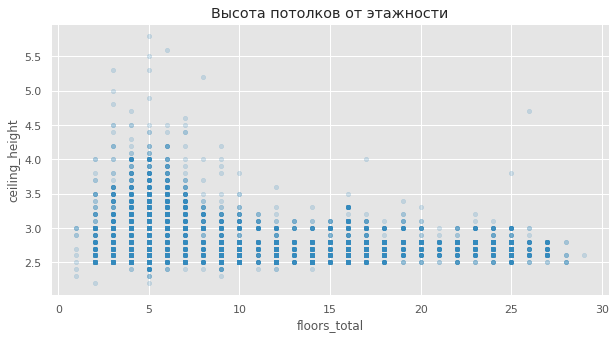

In [47]:
plt.style.use('ggplot')
(data1.query('floors_total < 30 and 2 < ceiling_height < 6').plot(x='floors_total', 
                                                                  y='ceiling_height', 
                                                                  kind='scatter', 
                                                                  title='Высота потолков от этажности', 
                                                                  grid=True, 
                                                                  figsize=(10, 5), 
                                                                  alpha=0.2)
)
plt.show()

Меньше 10 этажей рассеяние значений высот довольно большое - там трудно будет найти какие-либо типичные значения. \
Пожалуй, наиболее интересно выглядят 13, 14, 15, 18, 21, 22, 23 этажа, и более 25.\
То есть как раз не самые популярные типы этажности.

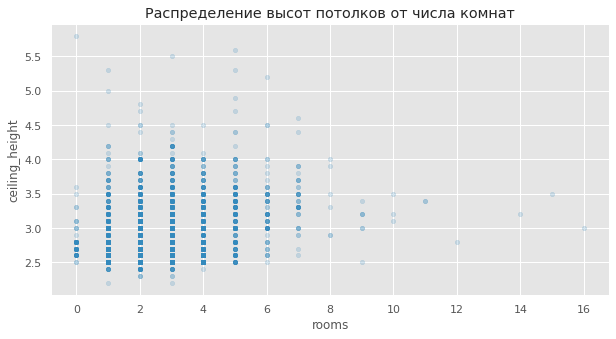

In [48]:
# Посотрим также на распределение высот потолков по числу комнат.
(data1.query('2 < ceiling_height < 6').plot(x='rooms', 
                                            y='ceiling_height', 
                                            kind='scatter', 
                                            title='Распределение высот потолков от числа комнат', 
                                            grid=True, 
                                            figsize=(10, 5), 
                                            alpha=0.2)
)
plt.show()

Компактно расположились только высоты для студий и open plane. 

              count  ceiling_mean  ceiling_median  delta
floors_total                                            
1.0              10          2.73            2.80  -0.07
2.0             215          3.01            2.70   0.31
3.0             399          2.97            2.80   0.17
4.0             789          2.99            3.00  -0.01
5.0            3666          2.80            2.60   0.20
6.0             619          3.12            3.00   0.12
7.0             398          2.95            3.00  -0.05
8.0             220          2.86            2.80   0.06
9.0            2557          2.60            2.60   0.00
10.0            750          2.69            2.60   0.09
11.0            109          2.79            2.80  -0.01
12.0            853          2.64            2.60   0.04
13.0            117          2.72            2.70   0.02
14.0            343          2.73            2.60   0.13
15.0            225          2.72            2.70   0.02
16.0            865          2.

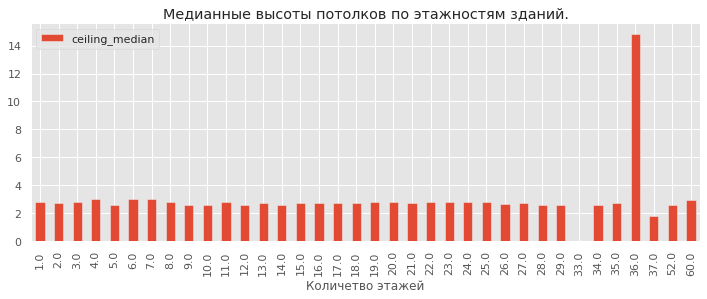

In [49]:
# Посотрим на средние и медианные значения высот потолков по этажностям.
floors_ceiling = data1.pivot_table(index='floors_total', 
                                   values='ceiling_height', 
                                   aggfunc=['count', 'mean', 'median'])

floors_ceiling.columns = ['count', 'ceiling_mean', 'ceiling_median']
floors_ceiling = floors_ceiling.round({'ceiling_mean' : 2})

floors_ceiling['delta'] = floors_ceiling['ceiling_mean'] - floors_ceiling['ceiling_median']
print(floors_ceiling)

# Визуализируем:
floors_ceiling.plot(y='ceiling_median', 
                    kind='bar', 
                    grid=True, 
                    figsize=(12, 4)
                   )
plt.title('Медианные высоты потолков по этажностям зданий.')
plt.xlabel('Количетво этажей')
plt.show()


Странный выброс на 36 этажах. Посмотрим, чем он вызван:

In [50]:
display(data1.query('floors_total == 36'))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
397,15,5990000.0,54.0,2018-03-22,2,NaN,36.0,21.4,28,NaN,0,0,18.7,1,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,11.0
5807,17,8150000.0,80.0,2019-01-09,2,27.0,36.0,41.0,13,NaN,0,0,12.0,5,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0
11079,16,9200000.0,75.0,2019-02-22,2,2.7,36.0,40.0,29,NaN,0,0,12.0,2,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,NaN


Это явно один дом. \
Одна этажность, одинаковая география. Большие кухни...\
Похоже, что 27 метров - это скорее ошибка записи - не там десятичную точку поставили. \
Можно предположить, что NaN в этом доме  - тоже 2.7 м.
</div>

In [51]:
data1['ceiling_height'] = data1['ceiling_height'].where(data1['floors_total'] != 36, 2.7)
display(data1.query('floors_total == 36'))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
397,15,5990000.0,54.0,2018-03-22,2,2.7,36.0,21.4,28,NaN,0,0,18.7,1,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,11.0
5807,17,8150000.0,80.0,2019-01-09,2,2.7,36.0,41.0,13,NaN,0,0,12.0,5,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0
11079,16,9200000.0,75.0,2019-02-22,2,2.7,36.0,40.0,29,NaN,0,0,12.0,2,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,NaN


#### 2.5.2. Где еще есть потолки 27 метров:

In [52]:
display(data1.query('ceiling_height == 27'))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
4876,7,3000000.0,25.0,2017-09-27,0,27.0,25.0,17.0,17,NaN,0,1,NaN,2,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,28.0
5246,0,2500000.0,54.0,2017-10-13,2,27.0,5.0,30.0,3,NaN,0,0,9.0,2,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540.0
10773,8,3800000.0,58.0,2017-10-13,2,27.0,10.0,30.1,3,False,0,0,8.1,2,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,71.0
17857,1,3900000.0,56.0,2017-12-22,3,27.0,5.0,33.0,4,False,0,0,NaN,0,Санкт-Петербург,41030.0,15543.0,0.0,NaN,0.0,NaN,73.0
20478,11,8000000.0,45.0,2017-07-18,1,27.0,4.0,22.0,2,NaN,0,0,10.0,1,Санкт-Петербург,18975.0,3246.0,0.0,NaN,3.0,449.0,429.0
21824,20,2450000.0,44.0,2019-02-12,2,27.0,2.0,38.0,2,False,0,0,8.6,2,городской поселок Большая Ижора,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22938,14,4000000.0,98.0,2018-03-15,4,27.0,2.0,73.0,2,True,0,0,9.0,1,деревня Нижняя,NaN,NaN,NaN,NaN,NaN,NaN,27.0


27 метров - малореальное значение высоты потолков. Особенно когда площадь квартиры 25-58 метров. \
Можно предположить, что это тоже ошибка разряда, и скорее всего это высота 2.7 метра.

Посмотрим также на другие потолки высотой более 20 м.


#### 2.5.3. Потолки более 20 метров.

In [53]:
#data1['ceiling_height'] = data1['ceiling_height'].where(data1['ceiling_height'] != 27, 2.7)

display(data1.query('ceiling_height >= 20'))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
355,17,3600000.0,55.2,2018-07-12,2,25.0,5.0,32.0,2,False,0,0,NaN,2,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0
3148,14,2900000.0,75.0,2018-11-12,3,32.0,3.0,53.0,2,NaN,0,0,8.0,0,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4643,0,4300000.0,45.0,2018-02-01,2,25.0,9.0,30.0,2,NaN,0,0,7.0,1,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181.0
4876,7,3000000.0,25.0,2017-09-27,0,27.0,25.0,17.0,17,NaN,0,1,NaN,2,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,28.0
5076,0,3850000.0,30.5,2018-10-03,1,24.0,5.0,19.5,1,True,0,0,5.5,0,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0
5246,0,2500000.0,54.0,2017-10-13,2,27.0,5.0,30.0,3,NaN,0,0,9.0,2,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540.0
5669,4,4400000.0,50.0,2017-08-08,2,26.0,9.0,21.3,3,NaN,0,0,7.0,2,Санкт-Петербург,28981.0,10912.0,1.0,305.0,0.0,NaN,267.0
6246,6,3300000.0,44.4,2019-03-25,2,25.0,5.0,31.3,5,NaN,0,0,5.7,0,Кронштадт,68923.0,50649.0,1.0,417.0,2.0,73.0,NaN
9379,5,3950000.0,42.0,2017-03-26,3,25.0,5.0,30.0,2,NaN,0,0,5.2,0,Санкт-Петербург,11647.0,13581.0,0.0,NaN,0.0,NaN,NaN
10773,8,3800000.0,58.0,2017-10-13,2,27.0,10.0,30.1,3,False,0,0,8.1,2,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,71.0


Высоты больше 20 метров похожи на ошибки в разряде при записи. \
Среди них преобладают значения вроде 25, 26, 32 метра... Это явно похоже больше на 2.5, 2.6, 3.2 метра.\
Заменим их соответствующими значениями:

In [54]:
data1['ceiling_height'] = data1['ceiling_height'].where(data1['ceiling_height'] < 20, 
                                                        (data1['ceiling_height'] / 10))

data1['ceiling_height'] = data1['ceiling_height'].astype('float').round(1)
data1['ceiling_height'].value_counts()

2.5     3799
2.6     3735
2.8     2248
2.7     1768
3.0     1241
3.2      409
3.1      285
2.9      213
3.3      182
3.5      157
3.4      138
3.6       73
4.0       48
2.4       39
3.7       38
3.8       37
3.9       19
4.2       14
2.0       12
4.5        7
2.3        6
4.4        6
4.1        5
8.0        3
4.7        2
2.2        2
5.3        2
14.0       1
5.8        1
5.6        1
1.0        1
5.2        1
10.0       1
4.9        1
10.3       1
1.8        1
8.3        1
4.8        1
4.6        1
4.3        1
5.0        1
6.0        1
5.5        1
1.2        1
Name: ceiling_height, dtype: int64

Мы удалили аномальные высоты более 20 м. \
Но остались еще высоты 6, 8, 10 метров, которые тоже выглядят в наших данных странно


#### 2.5.4. Потолки более 6 метров.

In [55]:
data1.query('ceiling_height >= 6')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3474,3,1400000.0,30.0,2018-03-16,1,8.0,5.0,15.3,2,False,0,0,7.3,0,деревня Нурма,NaN,NaN,NaN,NaN,NaN,NaN,125.0
5863,20,5650000.0,45.0,2018-08-15,1,8.3,16.0,19.3,14,NaN,0,0,8.3,1,Санкт-Петербург,13069.0,10763.0,0.0,NaN,1.0,613.0,14.0
15061,19,5600000.0,56.4,2018-05-11,2,14.0,14.0,32.4,5,NaN,0,0,9.1,2,Санкт-Петербург,14814.0,13610.0,0.0,NaN,0.0,NaN,315.0
15743,14,5600000.0,67.0,2016-11-11,3,8.0,16.0,41.0,1,NaN,0,0,8.0,0,Санкт-Петербург,32691.0,11035.0,1.0,723.0,0.0,NaN,474.0
17442,0,5350000.0,54.0,2015-06-16,2,8.0,5.0,29.0,2,NaN,0,0,NaN,1,Красное Село,24638.0,28062.0,0.0,NaN,0.0,NaN,469.0
20264,17,119000000.0,187.6,2017-07-10,4,6.0,7.0,147.0,7,NaN,0,0,15.6,0,Санкт-Петербург,26902.0,5605.0,3.0,484.0,1.0,305.0,259.0
22309,20,5300000.0,45.0,2017-09-30,1,10.3,16.0,15.5,15,NaN,0,0,NaN,0,Санкт-Петербург,36353.0,11936.0,2.0,440.0,2.0,450.0,136.0
22869,0,15000000.0,25.0,2018-07-25,1,10.0,5.0,14.0,5,True,0,0,11.0,5,Санкт-Петербург,34963.0,8283.0,1.0,223.0,3.0,30.0,19.0


##### Аномалия 14 метров

In [56]:
# 14-метровый потолок. Тоже похоже на ошибку заполнения. Рядом в количестве этажей тоже стоит число 14.
# не ту цифру не в то поле вставили.
#Посмотрим, есть ли что-то по-соседству с этим домом.
data1.query('13550 < cityCenters_nearest < 13660 and floors_total == 14')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
4344,9,7100000.0,54.0,2015-05-29,2,2.6,14.0,30.0,12,NaN,0,0,15.0,0,Санкт-Петербург,14762.0,13558.0,0.0,NaN,0.0,NaN,1199.0
6255,7,3100000.0,30.1,2017-12-01,1,2.6,14.0,13.6,4,NaN,0,0,7.8,0,Санкт-Петербург,14768.0,13564.0,0.0,NaN,2.0,805.0,41.0
15061,19,5600000.0,56.4,2018-05-11,2,14.0,14.0,32.4,5,NaN,0,0,9.1,2,Санкт-Петербург,14814.0,13610.0,0.0,NaN,0.0,NaN,315.0
17216,6,3350000.0,34.2,2017-02-22,1,2.6,14.0,17.6,9,NaN,0,0,8.0,0,Санкт-Петербург,14768.0,13564.0,0.0,NaN,2.0,805.0,553.0
18275,6,3750000.0,39.5,2017-11-28,1,2.6,14.0,19.1,13,NaN,0,0,8.1,2,Санкт-Петербург,14768.0,13564.0,0.0,NaN,2.0,805.0,15.0
23282,14,5600000.0,50.0,2017-11-14,2,2.7,14.0,24.8,6,NaN,0,0,11.1,1,Санкт-Петербург,14762.0,13558.0,0.0,NaN,0.0,NaN,215.0


На очень похожем расстоянии от центра и аэропорта есть похожие дома - с 14 этажами, со сравнимыми площадями квартир. Преобладающая высота потолков в этой выборке - 2.6 м.


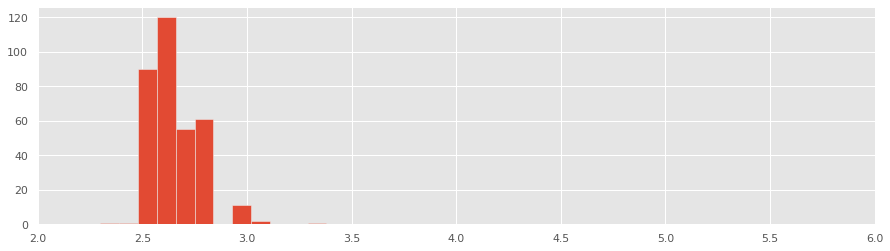

In [57]:
# Сравним с картиной для всех 14-этажных домов.
#data1.query('floors_total == 14 and ceiling_height == ceiling_height')
plt.figure(figsize=(15,4))
plt.hist(data1
         .query('floors_total == 14')['ceiling_height'],
        bins = 130)
plt.xlim(2, 6)
plt.show()

В целом, высоты 2.6 метра все равно преобладают, но разнообразие вполне заметное... \
То есть нельзя будет провести такую замену для всех пропусков в высотах потолков для 14-этажных домов.

##### Аномалия 10 метров.

In [58]:
data1.query('8270 < cityCenters_nearest < 8290')
# странная квартира - апартаменты 10 м высотой, при этом однокомнатная с 25 м площадью и 5 балконами
# Это кстати, до удаления потолков более 20 метров была квартира с высотой потолков 100м.

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5090,11,3200000.0,29.0,2017-08-23,1,NaN,9.0,15.0,2,NaN,0,0,7.0,0,Санкт-Петербург,14356.0,8285.0,0.0,NaN,0.0,NaN,21.0
6519,18,10800000.0,99.0,2017-11-21,3,2.6,12.0,53.0,2,NaN,0,0,15.0,0,Санкт-Петербург,31367.0,8279.0,0.0,NaN,2.0,692.0,335.0
10153,4,3150000.0,31.0,2016-09-14,1,2.5,9.0,16.5,3,NaN,0,0,7.3,0,Санкт-Петербург,14356.0,8285.0,0.0,NaN,0.0,NaN,438.0
11126,3,4500000.0,41.0,2019-03-14,2,2.5,5.0,28.0,2,NaN,0,0,7.0,0,Санкт-Петербург,38999.0,8288.0,0.0,NaN,1.0,469.0,7.0
12435,6,3600000.0,44.0,2017-07-06,2,NaN,5.0,29.0,3,NaN,0,0,6.0,0,Санкт-Петербург,32246.0,8279.0,3.0,395.0,1.0,201.0,201.0
13613,16,8100000.0,58.4,2019-04-26,0,3.3,7.0,33.0,6,NaN,1,0,NaN,0,Санкт-Петербург,14509.0,8288.0,0.0,NaN,0.0,NaN,NaN
13943,20,3300000.0,32.3,2018-07-06,1,2.5,5.0,17.7,1,NaN,0,0,6.0,0,Санкт-Петербург,14507.0,8277.0,0.0,NaN,0.0,NaN,10.0
16881,9,4200000.0,44.1,2018-04-06,2,2.5,5.0,28.8,5,NaN,0,0,6.0,0,Санкт-Петербург,38999.0,8288.0,0.0,NaN,1.0,469.0,29.0
22821,20,6470000.0,58.9,2017-09-21,3,2.5,9.0,41.4,8,NaN,0,0,6.2,0,Санкт-Петербург,14356.0,8285.0,0.0,NaN,0.0,NaN,181.0
22869,0,15000000.0,25.0,2018-07-25,1,10.0,5.0,14.0,5,True,0,0,11.0,5,Санкт-Петербург,34963.0,8283.0,1.0,223.0,3.0,30.0,19.0


Квартира с 10-метровым потолком (100-метровым в изначальных данных, до редактирования категории более 20 метров).\
На 5 этаже 5-этажного дома, общей площадью 25 метров. Однокомнатная. Аппартаменты. Похоже на шахту лифта.\
На первый взгляд, ничего подобрать мы этой квартире не можем. 

***Но:***
- в 5-этажках (и 9-этажках) на похожем удалении от центра в основном, потолки высотой 2.5 метра.
- Есть в этом районе две квартиры в 7-этажках, у обеих потолки 3.3 метра.


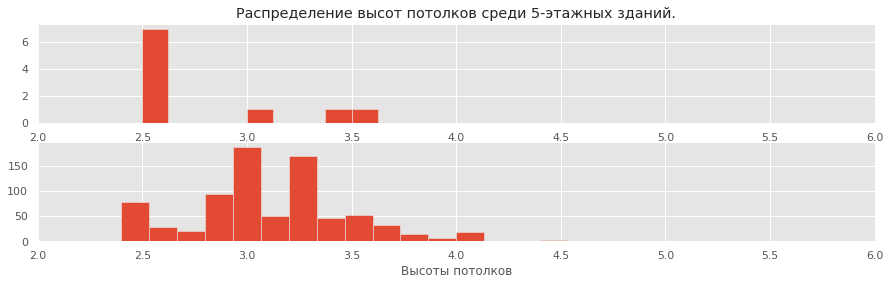

In [59]:
plt.figure(figsize=(15,4))
plt.subplot(2, 1, 1)
plt.hist(data1
         .query('8200 < cityCenters_nearest < 8300 and floors_total == 5')['ceiling_height'],
        bins = 60)
plt.title('Распределение высот потолков среди 5-этажных зданий.')
plt.xlim(2, 6)

# Сравним с пятиэтажками ближе к центру:
plt.subplot(2, 1, 2)
plt.hist(data1
         .query('cityCenters_nearest < 8300 and floors_total == 5')['ceiling_height'],
        bins = 60)

plt.xlim(2, 6)
plt.xlabel('Высоты потолков')
plt.show()




На удалении 8200 - 8300 от центра действительно большинство потолков 2.5 метра, но при расширении географии, разнообразие высот для пятиэтажек не позволяет нам однозначно подобрать замену для пропусков.

##### Аномалия 10.3 метра

In [60]:
# Теперь посмотрим на потолок 10.3 м. 
# Это объявление в доме, где 16 этажей и 11936 м до центра.
data1.query('floors_total == 16 and cityCenters_nearest == 11936')


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1207,14,7300000.0,70.2,2016-03-23,2,2.8,16.0,38.0,12,False,0,0,11.0,2,Санкт-Петербург,36353.0,11936.0,2.0,440.0,2.0,450.0,553.0
10772,8,5200000.0,41.0,2018-08-28,1,2.8,16.0,18.0,7,NaN,0,0,10.0,0,Санкт-Петербург,36353.0,11936.0,2.0,440.0,2.0,450.0,13.0
12770,8,5300000.0,47.0,2017-06-28,1,2.8,16.0,20.0,4,NaN,0,0,10.5,0,Санкт-Петербург,36353.0,11936.0,2.0,440.0,2.0,450.0,135.0
19351,14,8700000.0,69.0,2016-03-30,2,NaN,16.0,37.0,11,NaN,0,0,10.0,0,Санкт-Петербург,36353.0,11936.0,2.0,440.0,2.0,450.0,276.0
19531,18,8600000.0,73.0,2018-11-21,2,2.8,16.0,41.0,2,NaN,0,0,11.0,2,Санкт-Петербург,36353.0,11936.0,2.0,440.0,2.0,450.0,105.0
20142,16,5300000.0,45.8,2017-10-25,1,NaN,16.0,20.2,9,NaN,0,0,10.4,0,Санкт-Петербург,36353.0,11936.0,2.0,440.0,2.0,450.0,29.0
22309,20,5300000.0,45.0,2017-09-30,1,10.3,16.0,15.5,15,NaN,0,0,NaN,0,Санкт-Петербург,36353.0,11936.0,2.0,440.0,2.0,450.0,136.0


Похоже на один дом с типовыми высотами потолков. Все известные высоты - 2.8 м.\
NaN в этой выборке скорее всего тоже 2.8 м.
    
Можно также предположить, что высоты 8 м - тоже ошибка заполнения - не пропечаталась цифра 2.


##### Аномалии 8 метров

In [61]:
data1.query('7 < ceiling_height < 10')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3474,3,1400000.0,30.0,2018-03-16,1,8.0,5.0,15.3,2,False,0,0,7.3,0,деревня Нурма,NaN,NaN,NaN,NaN,NaN,NaN,125.0
5863,20,5650000.0,45.0,2018-08-15,1,8.3,16.0,19.3,14,NaN,0,0,8.3,1,Санкт-Петербург,13069.0,10763.0,0.0,NaN,1.0,613.0,14.0
15743,14,5600000.0,67.0,2016-11-11,3,8.0,16.0,41.0,1,NaN,0,0,8.0,0,Санкт-Петербург,32691.0,11035.0,1.0,723.0,0.0,NaN,474.0
17442,0,5350000.0,54.0,2015-06-16,2,8.0,5.0,29.0,2,NaN,0,0,NaN,1,Красное Село,24638.0,28062.0,0.0,NaN,0.0,NaN,469.0


In [62]:
data1.query('locality_name == "деревня Нурма"')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
596,10,2700000.0,65.0,2018-03-27,3,2.5,5.0,47.0,3,NaN,0,0,7.0,0,деревня Нурма,NaN,NaN,NaN,NaN,NaN,NaN,111.0
1570,6,1950000.0,50.0,2015-04-03,3,2.5,5.0,34.0,5,NaN,0,0,6.5,0,деревня Нурма,NaN,NaN,NaN,NaN,NaN,NaN,1283.0
2328,7,1500000.0,45.0,2017-10-13,2,NaN,5.0,29.0,1,NaN,0,0,6.0,0,деревня Нурма,NaN,NaN,NaN,NaN,NaN,NaN,137.0
3474,3,1400000.0,30.0,2018-03-16,1,8.0,5.0,15.3,2,False,0,0,7.3,0,деревня Нурма,NaN,NaN,NaN,NaN,NaN,NaN,125.0
3917,20,1850000.0,44.4,2018-10-15,2,2.5,5.0,NaN,5,False,0,0,NaN,2,деревня Нурма,NaN,NaN,NaN,NaN,NaN,NaN,82.0
4532,8,1700000.0,45.2,2018-02-27,2,NaN,5.0,27.2,5,False,0,0,7.0,1,деревня Нурма,NaN,NaN,NaN,NaN,NaN,NaN,80.0
4599,8,1100000.0,29.7,2018-07-16,1,2.5,5.0,15.3,5,NaN,0,0,6.5,0,деревня Нурма,NaN,NaN,NaN,NaN,NaN,NaN,89.0
8786,0,2200000.0,56.0,2017-08-15,2,NaN,2.0,42.0,2,NaN,0,0,7.0,0,деревня Нурма,NaN,NaN,NaN,NaN,NaN,NaN,17.0
11842,11,1450000.0,30.0,2017-05-18,1,2.5,5.0,16.0,5,NaN,0,0,7.0,1,деревня Нурма,NaN,NaN,NaN,NaN,NaN,NaN,216.0
18916,4,2500000.0,70.0,2015-11-22,3,2.6,5.0,NaN,1,False,0,0,6.0,2,деревня Нурма,NaN,NaN,NaN,NaN,NaN,NaN,NaN


В деревне Нурма почти все потолки имеют высоту 2.5 метра. Высота потолка 8 метров в 1-комнатной квартире - явно какая-то ошибка. Но причина этой ошибки пока остаётся тайной.

In [63]:
data1.query('locality_name == "Красное Село"')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
182,16,3400000.0,60.0,2017-10-10,3,2.5,5.0,44.1,1,NaN,0,0,6.0,0,Красное Село,26090.0,29514.0,0.0,NaN,0.0,NaN,98.0
249,15,5000000.0,70.5,2018-01-23,3,2.6,9.0,44.9,9,NaN,0,0,10.5,1,Красное Село,25594.0,29018.0,0.0,NaN,0.0,NaN,219.0
308,35,5700000.0,83.9,2018-02-01,3,2.6,5.0,51.8,2,NaN,0,0,9.6,0,Красное Село,27245.0,30670.0,0.0,NaN,0.0,NaN,47.0
363,10,7100000.0,101.0,2019-04-08,4,2.6,8.0,NaN,7,False,0,0,16.5,2,Красное Село,26876.0,30300.0,0.0,NaN,0.0,NaN,NaN
626,9,1990000.0,33.0,2017-05-18,1,NaN,5.0,NaN,3,NaN,0,0,NaN,0,Красное Село,27828.0,31253.0,1.0,587.0,0.0,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23156,0,4100000.0,65.0,2016-06-08,3,NaN,5.0,44.0,1,NaN,0,0,8.0,0,Красное Село,27679.0,31104.0,0.0,NaN,0.0,NaN,45.0
23183,16,4750000.0,71.0,2017-04-29,3,2.6,9.0,45.0,3,NaN,0,0,10.5,0,Красное Село,25575.0,28999.0,0.0,NaN,0.0,NaN,478.0
23368,7,2150000.0,32.0,2017-08-24,1,2.6,4.0,17.5,4,NaN,0,0,5.5,0,Красное Село,25371.0,28796.0,3.0,443.0,0.0,NaN,185.0
23586,14,4350000.0,58.0,2018-02-06,2,2.6,8.0,34.0,7,NaN,0,0,12.0,1,Красное Село,27199.0,30624.0,0.0,NaN,0.0,NaN,112.0


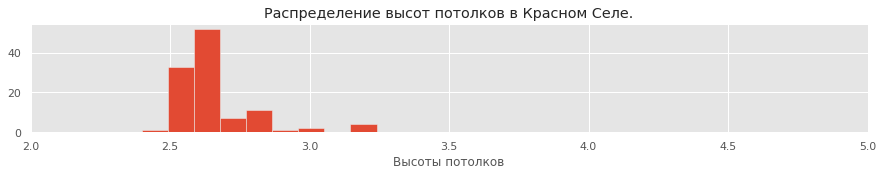

In [64]:
plt.figure(figsize=(15,2))
plt.hist(data1
         .query('locality_name == "Красное Село"')['ceiling_height'],
        bins = 60)
plt.title('Распределение высот потолков в Красном Селе.')
plt.xlim(2, 5)
plt.xlabel('Высоты потолков')
plt.show()

В Красном Селе потолки разнообразнее чем в деревне Нурма. Преобладают потолки 2.6 но это не даёт нам права ставить замену 8-метровому потолку - других вариантов тоже хватает. Объяснения 8-метрового потолка тоже пока нет.

In [65]:
data1.query('10700 < cityCenters_nearest < 11100 and floors_total == 16')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1791,8,5450000.0,41.10,2016-04-04,1,NaN,16.0,20.5,12,NaN,0,0,10.00,0,Санкт-Петербург,16548.0,11013.0,1.0,831.0,1.0,968.0,84.0
1882,18,9200000.0,79.00,2017-04-20,3,NaN,16.0,45.0,1,NaN,0,0,13.00,0,Санкт-Петербург,44132.0,10914.0,0.0,NaN,0.0,NaN,79.0
2239,16,5490000.0,46.00,2017-04-29,1,NaN,16.0,19.6,11,NaN,0,0,14.00,0,Санкт-Петербург,16548.0,11012.0,1.0,831.0,1.0,968.0,137.0
2899,5,3590000.0,35.90,2017-03-19,1,NaN,16.0,15.0,16,False,0,0,11.00,2,Санкт-Петербург,43250.0,11020.0,0.0,NaN,0.0,NaN,80.0
2982,4,6775000.0,72.34,2018-10-29,3,NaN,16.0,NaN,1,NaN,0,0,11.63,2,Санкт-Петербург,43250.0,11020.0,0.0,NaN,0.0,NaN,22.0
3681,1,7450000.0,70.00,2015-11-25,2,NaN,16.0,42.0,9,NaN,0,0,14.00,0,Санкт-Петербург,36395.0,10753.0,0.0,NaN,0.0,NaN,308.0
5071,12,9500000.0,83.90,2017-09-12,3,NaN,16.0,46.1,7,NaN,0,0,15.00,0,Санкт-Петербург,44153.0,10934.0,0.0,NaN,0.0,NaN,18.0
5276,11,4050000.0,41.00,2017-08-24,1,NaN,16.0,18.0,5,NaN,0,0,10.00,0,Санкт-Петербург,30159.0,11023.0,1.0,264.0,1.0,1177.0,38.0
5863,20,5650000.0,45.00,2018-08-15,1,8.3,16.0,19.3,14,NaN,0,0,8.30,1,Санкт-Петербург,13069.0,10763.0,0.0,NaN,1.0,613.0,14.0
7869,10,6200000.0,57.00,2018-10-16,2,2.5,16.0,30.0,11,NaN,0,0,7.20,2,Санкт-Петербург,41912.0,10793.0,1.0,235.0,0.0,NaN,33.0


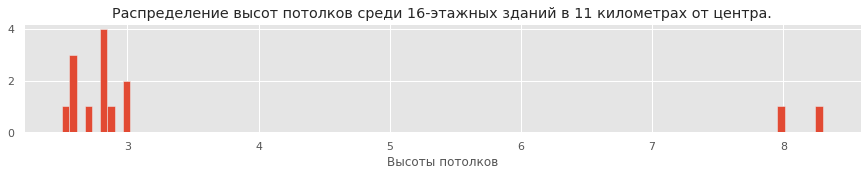

In [66]:
# Аномальные потолки в 16-этажках на удалении 10763  и 11035 м от центра.
# Посмотрим на соседей.
plt.figure(figsize=(15,2))
plt.hist(data1.query('10700 < cityCenters_nearest < 11100 and floors_total == 16')['ceiling_height'],
        bins = 100)
plt.title('Распределение высот потолков среди 16-этажных зданий в 11 километрах от центра.')
plt.xlabel('Высоты потолков')
#plt.xlim(2, 6)

plt.show()


В этой выборке очень много пропусков и большое разнообразие значений.\
Таким образом, нам не удалось найти объяснения восьмиметровым потолкам, и единственное место, где мы можем относительно уверенно предложить замену - это деревня Нурма, где все потолки 2.5 метра.

По-честному, строки с этими аномалиями лучше удалить из анализа.

##### Итого:
- Потолок 10 метров заменить на 2.5
- Потолок 10.3 метров заемнить на 2.8
- В 16-этажке на удалении 11936 от центра пропуски заменить на 2.8 м
- В деревне Нурма все потолки 2.5 метра, в том числе и ошибочный 8 метровый.
- Потолк 14 метров заменить на 2.6 м

In [67]:
data1.loc[3474, 'ceiling_height'] = 2.5
display(data1.query('locality_name == "деревня Нурма"'))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
596,10,2700000.0,65.0,2018-03-27,3,2.5,5.0,47.0,3,NaN,0,0,7.0,0,деревня Нурма,NaN,NaN,NaN,NaN,NaN,NaN,111.0
1570,6,1950000.0,50.0,2015-04-03,3,2.5,5.0,34.0,5,NaN,0,0,6.5,0,деревня Нурма,NaN,NaN,NaN,NaN,NaN,NaN,1283.0
2328,7,1500000.0,45.0,2017-10-13,2,NaN,5.0,29.0,1,NaN,0,0,6.0,0,деревня Нурма,NaN,NaN,NaN,NaN,NaN,NaN,137.0
3474,3,1400000.0,30.0,2018-03-16,1,2.5,5.0,15.3,2,False,0,0,7.3,0,деревня Нурма,NaN,NaN,NaN,NaN,NaN,NaN,125.0
3917,20,1850000.0,44.4,2018-10-15,2,2.5,5.0,NaN,5,False,0,0,NaN,2,деревня Нурма,NaN,NaN,NaN,NaN,NaN,NaN,82.0
4532,8,1700000.0,45.2,2018-02-27,2,NaN,5.0,27.2,5,False,0,0,7.0,1,деревня Нурма,NaN,NaN,NaN,NaN,NaN,NaN,80.0
4599,8,1100000.0,29.7,2018-07-16,1,2.5,5.0,15.3,5,NaN,0,0,6.5,0,деревня Нурма,NaN,NaN,NaN,NaN,NaN,NaN,89.0
8786,0,2200000.0,56.0,2017-08-15,2,NaN,2.0,42.0,2,NaN,0,0,7.0,0,деревня Нурма,NaN,NaN,NaN,NaN,NaN,NaN,17.0
11842,11,1450000.0,30.0,2017-05-18,1,2.5,5.0,16.0,5,NaN,0,0,7.0,1,деревня Нурма,NaN,NaN,NaN,NaN,NaN,NaN,216.0
18916,4,2500000.0,70.0,2015-11-22,3,2.6,5.0,NaN,1,False,0,0,6.0,2,деревня Нурма,NaN,NaN,NaN,NaN,NaN,NaN,NaN


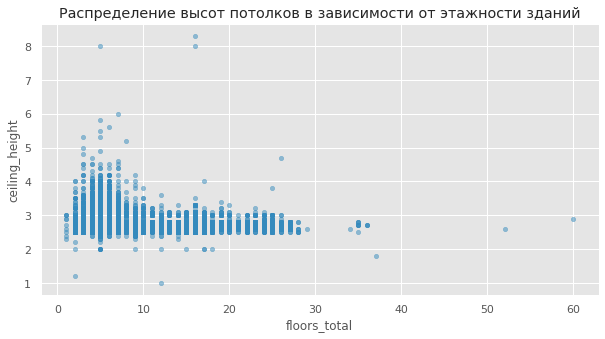

In [68]:
# заменить 14 м на 2.6 м
# 10 м - на 2.5 м
# 10.3 м - на 2.8 м
# заменить в 16-этажке (floors_total == 16 and cityCenters_nearest == 11936) пропуски и 10.3 на 2.8

data1['ceiling_height'] = data1['ceiling_height'].where(data1['ceiling_height'] != 14, 2.6)
data1['ceiling_height'] = data1['ceiling_height'].where(data1['ceiling_height'] != 10, 2.5)
data1['ceiling_height'] = data1['ceiling_height'].where(data1['ceiling_height'] != 10.3, 2.8)

data1.plot(x='floors_total', y='ceiling_height', kind='scatter', grid=True, figsize=(10, 5), alpha=0.5)
plt.title('Распределение высот потолков в зависимости от этажности зданий')
plt.show()

In [69]:
data1.query('5 <= ceiling_height < 8')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
464,15,66571000.0,280.3,2015-06-11,6,5.2,8.0,159.5,7,NaN,0,0,21.1,0,Санкт-Петербург,26316.0,6655.0,3.0,187.0,1.0,616.0,578.0
1026,20,155000000.0,310.0,2018-10-12,5,5.3,3.0,190.0,3,NaN,0,0,63.0,2,Санкт-Петербург,24899.0,4785.0,0.0,NaN,1.0,603.0,NaN
1053,13,550000.0,29.0,2018-02-01,1,5.0,3.0,NaN,1,False,0,0,NaN,0,Бокситогорск,NaN,NaN,NaN,NaN,NaN,NaN,6.0
1388,20,59800000.0,399.0,2015-01-21,5,5.6,6.0,NaN,6,NaN,0,0,NaN,0,Санкт-Петербург,26204.0,6934.0,2.0,149.0,2.0,577.0,719.0
7578,17,38000000.0,143.0,2017-11-02,3,5.5,5.0,83.0,5,NaN,0,0,29.0,1,Санкт-Петербург,26333.0,6448.0,3.0,479.0,0.0,NaN,NaN
12628,14,3900000.0,50.0,2018-03-29,1,5.3,5.0,NaN,5,NaN,0,0,NaN,0,Санкт-Петербург,19644.0,3918.0,1.0,505.0,1.0,92.0,8.0
20264,17,119000000.0,187.6,2017-07-10,4,6.0,7.0,147.0,7,NaN,0,0,15.6,0,Санкт-Петербург,26902.0,5605.0,3.0,484.0,1.0,305.0,259.0
21227,0,8200000.0,71.0,2017-07-21,0,5.8,5.0,68.0,5,NaN,1,0,NaN,0,Санкт-Петербург,20170.0,1261.0,2.0,295.0,3.0,366.0,30.0


Высоты потолков 5-6 метров - это могут быть например двухэтажные квартиры. В пользу этого говорят довольно большие площади квартир, большое количество комнат, необычная этажность некоторых домов, последние этажи. \
Исключение - однокомнатная квартирка в Бокситогорске 29 кв.м.

Но эти ситуации, хоть и объяснимы, довольно редки - всего 8 строк. Возможно, лучше будет относиться к ним как к выбросам.

- Мы избавились от явных аномалий в верхних границах значений высот потолков.
- Помним, что пропуски в деревне Нурма мы хотели заменить на 2.5
- Помним, что у трех строк с высотами 8 метров  мы так и не нашли объяснения и замены странным значениям, и их лучше будет удалить.
- Считаем, что квартиры с высотами потолков 5-6 метров - реальные, но представляют скорее исключение из общей картины, которое лучше рассмтривать как выбросы.


#### 2.5.5. Аномалии в нижних границах. 
Потолки менее 2 метров - это тоже странно.


In [70]:
display(data1.query('ceiling_height < 2.5')['ceiling_height'].value_counts())

2.4    39
2.0    12
2.3     6
2.2     2
1.8     1
1.2     1
1.0     1
Name: ceiling_height, dtype: int64

In [71]:
data1.query('ceiling_height < 2')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5712,5,1500000.0,42.8,2017-08-14,2,1.2,2.0,27.5,1,NaN,0,0,5.20,0,городской посёлок Мга,NaN,NaN,NaN,NaN,NaN,NaN,248.0
16934,5,4100000.0,40.0,2017-10-17,1,1.8,37.0,17.4,5,NaN,0,0,8.34,0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,71.0
22590,16,6000000.0,55.0,2018-10-31,2,1.0,12.0,32.4,7,NaN,0,0,10.00,0,Санкт-Петербург,33053.0,14217.0,2.0,293.0,2.0,289.0,13.0


In [72]:
# Попробуем посмотреть на соседей 1-метрового потолка
data1.query('floors_total == 12 and 14200 < cityCenters_nearest < 14240')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
4190,11,6050000.0,67.0,2018-03-26,3,2.5,12.0,44.0,4,False,0,0,8.0,2,Санкт-Петербург,15420.0,14216.0,1.0,627.0,0.0,NaN,80.0
7315,19,7250000.0,54.0,2019-02-26,2,2.5,12.0,32.0,6,NaN,0,0,10.1,2,Санкт-Петербург,33044.0,14208.0,0.0,NaN,0.0,NaN,11.0
10378,9,6500000.0,78.0,2017-08-29,3,NaN,12.0,48.0,6,False,0,0,15.0,1,Санкт-Петербург,33053.0,14217.0,2.0,293.0,2.0,289.0,97.0
15420,8,4500000.0,38.6,2019-03-31,1,2.7,12.0,20.1,2,False,0,0,10.1,0,Санкт-Петербург,33053.0,14217.0,2.0,293.0,2.0,289.0,29.0
17629,2,4990000.0,54.0,2017-04-11,2,NaN,12.0,NaN,9,NaN,0,0,NaN,0,Санкт-Петербург,33053.0,14217.0,2.0,293.0,2.0,289.0,45.0
18350,11,7625000.0,51.7,2018-10-21,2,2.7,12.0,NaN,1,NaN,0,0,NaN,0,Санкт-Петербург,15420.0,14216.0,1.0,627.0,0.0,NaN,NaN
22590,16,6000000.0,55.0,2018-10-31,2,1.0,12.0,32.4,7,NaN,0,0,10.0,0,Санкт-Петербург,33053.0,14217.0,2.0,293.0,2.0,289.0,13.0


In [73]:
# смотрим на соседей потолка 1.2 м. 
# Это поселок, поэтому выборку делаем  по названию поселка
data1.query('floors_total == 2 and locality_name == "городской посёлок Мга"')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1710,13,1050000.0,30.4,2018-02-07,1,NaN,2.0,17.5,1,NaN,0,0,6.1,0,городской посёлок Мга,NaN,NaN,NaN,NaN,NaN,NaN,210.0
5712,5,1500000.0,42.8,2017-08-14,2,1.2,2.0,27.5,1,NaN,0,0,5.2,0,городской посёлок Мга,NaN,NaN,NaN,NaN,NaN,NaN,248.0
6148,0,2000000.0,51.3,2018-03-26,2,2.5,2.0,30.2,1,NaN,0,0,7.6,0,городской посёлок Мга,NaN,NaN,NaN,NaN,NaN,NaN,91.0
7733,0,1500000.0,46.0,2018-01-16,2,2.6,2.0,NaN,2,NaN,0,0,NaN,0,городской посёлок Мга,NaN,NaN,NaN,NaN,NaN,NaN,45.0
18636,14,2150000.0,63.4,2018-11-15,3,3.2,2.0,45.0,2,NaN,0,0,7.2,1,городской посёлок Мга,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18858,0,2300000.0,44.0,2017-03-27,2,2.6,2.0,28.0,2,NaN,0,0,6.0,0,городской посёлок Мга,NaN,NaN,NaN,NaN,NaN,NaN,714.0


   
1. Отмечу сразу, что потолок 1.8 мета - в единственном доме высотой 35-37 метров на удалении 20444 м от центра (рассматривается далее). В этом доме большая часть потолков высотой 2.7 - 2.8 м. Так что на этом фоне 1.8 похоже на ошибку заполнения - вместо 2 нажали 1.
2. У потолков высотой 1 метр и 1.2 метра тоже есть соседи, но высоты потолков у них разные и не дают никакого представления о возможной природе таких необычных значений. Лучше относиться к этим двум строчкам как к выбросам.

Заменим потолок 1.8 м значением 2.8.


In [74]:
data1['ceiling_height'] = data1['ceiling_height'].where(data1['ceiling_height'] != 1.8, 2.8)

In [75]:
print('Количество слишком низких потолков:')
display(data1.query('ceiling_height <= 2.5')['ceiling_height'].value_counts())
print()
print('Количество слишком высоких потолков:')
display(data1.query('ceiling_height >= 4.0')['ceiling_height'].value_counts())

Количество слишком низких потолков:


2.5    3801
2.4      39
2.0      12
2.3       6
2.2       2
1.2       1
1.0       1
Name: ceiling_height, dtype: int64


Количество слишком высоких потолков:


4.0    48
4.2    14
4.5     7
4.4     6
4.1     5
8.0     2
5.3     2
4.7     2
6.0     1
8.3     1
5.6     1
5.2     1
4.9     1
4.8     1
5.5     1
5.8     1
5.0     1
4.6     1
4.3     1
Name: ceiling_height, dtype: int64

Итого:
- Потолков менее 2.5 метров - 61
- Потолков более 4 метров - 49 (вместе с 4-метровыми - 97)
- Всего исключительных потолков - 110 (или 158, если включить сюда 4-метровые потолки). 0.46% (или 0.66, соответствено).

Это все единичные случаи, и их в сумме менее, чем пол процента.\
Кажется логичным их удалить.


<i>Обратим внимание, что если мы делаем срез данных методом query, то строки с NaN удаляются</i>

In [76]:
data1 = data1.drop(data1[data1['ceiling_height'] > 4.0].index)
data1 = data1.drop(data1[data1['ceiling_height'] < 2.5].index)

#data1 = data1.query('ceiling_height <= 4.0')
print(data1['ceiling_height'].unique())
display(data1['ceiling_height'].value_counts())


[2.7 nan 3.  2.5 2.6 2.8 2.9 3.2 3.4 3.5 3.3 4.  3.1 3.7 3.6 3.8 3.9]


2.5    3801
2.6    3736
2.8    2250
2.7    1768
3.0    1241
3.2     409
3.1     285
2.9     213
3.3     182
3.5     157
3.4     138
3.6      73
4.0      48
3.7      38
3.8      37
3.9      19
Name: ceiling_height, dtype: int64

In [77]:
# Проверяем, что строки с NaN не исчезли:
display(data1)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.7,16.0,51.0,8,NaN,0,0,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.6,1,NaN,0,0,11.00,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.3,4,NaN,0,0,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,NaN,0,0,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.0,14.0,32.0,13,NaN,0,0,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.7,5.0,73.3,3,NaN,0,0,13.83,0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15,3,NaN,5.0,38.0,4,NaN,0,0,8.50,0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11,2,NaN,3.0,29.7,1,NaN,0,0,NaN,0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28,2,3.0,17.0,NaN,12,NaN,0,0,23.30,2,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


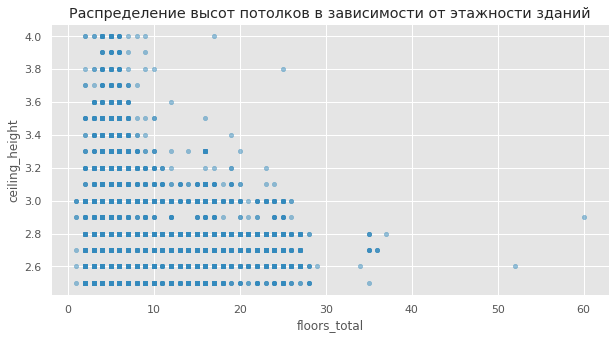

In [78]:

data1.plot(x='floors_total', y='ceiling_height', kind='scatter', grid=True, figsize=(10, 5), alpha=0.5)
plt.title('Распределение высот потолков в зависимости от этажности зданий')
plt.show()

Мы избавились от явных аномалий в значениях высот потолков.\
Теперь надо разобраться с NaN.

#### 2.5.6. NaN в значениях высот потолков.


##### Посмотрим сначала на типовые дома
- Судя по построенной кртине распределения высот потолков в зависимости от этажности, очень трудно будет выявить типовые высоты потолков по количеству этажей. 
- Надежда есть только для зданий высотой выше 28 этажей.
- Самый большой разброс высот - в малоэтажных зданиях (4-6 этажей)..

Те не менее, не будем терять надежды, и посмотрим на распределение высот потолков в некоторых этажностях

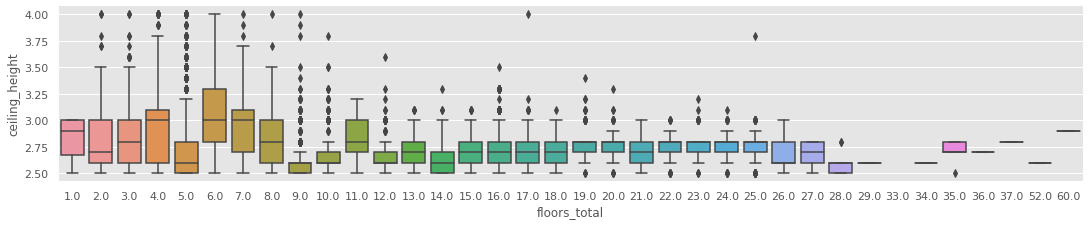

In [79]:
sns.catplot(y = 'ceiling_height',
            x = 'floors_total', 
            data = data1,
            kind = 'box',
            height = 3,
           aspect = 5)
plt.show()

- 9, 10 и 12-этажки имеют самые компактные "ящики", но очень длинные усы в верхних значениях.
- Ранее, по диаграмме расеяния, мы отмечали, что наиболее интересно выглядят 13, 14, 15, 18, 21, 22, 23 этажа, и более 25.

<ipython-input-80-ab6e7a274ffa>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data=data1[(data['floors_total'] > 10) & (data['floors_total'] < 29)],


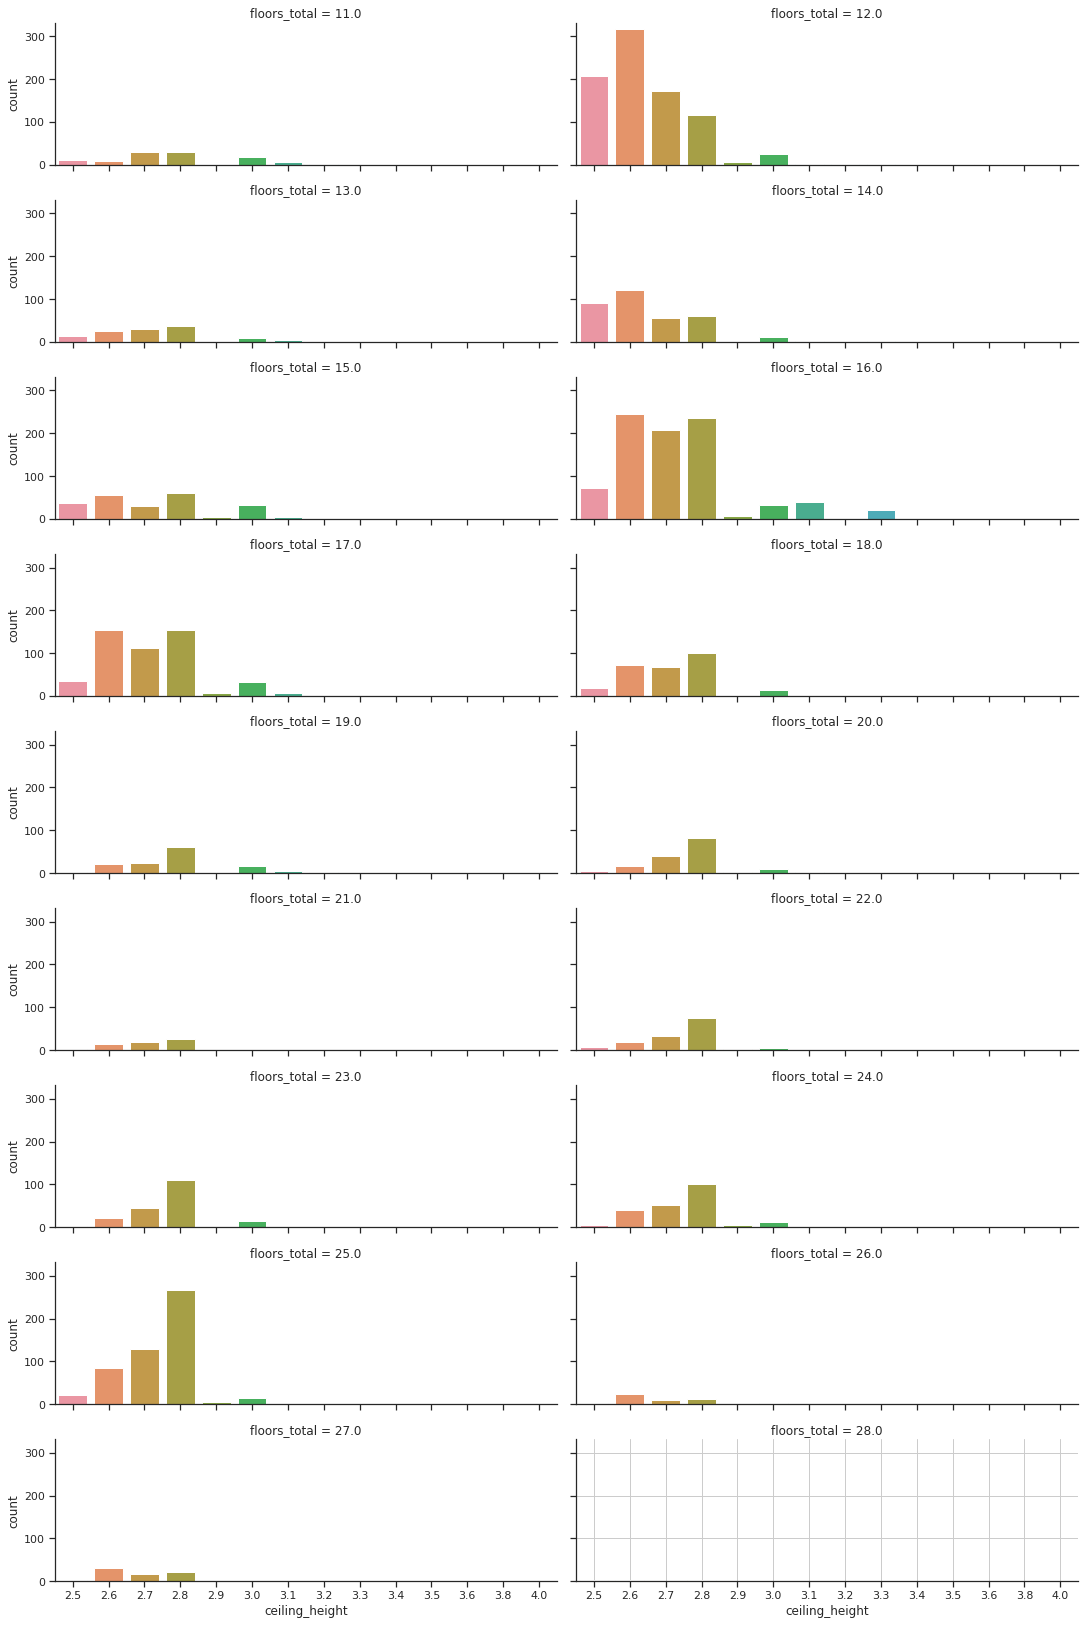

In [80]:
#plt.style.use('seaborn')
sns.set(style="ticks")
sns.catplot(x="ceiling_height", 
            col="floors_total", 
            col_wrap=2,
            data=data1[(data['floors_total'] > 10) & (data['floors_total'] < 29)],
            kind="count", 
            height=2.5, 
            aspect=3
           )
plt.grid()
plt.show()

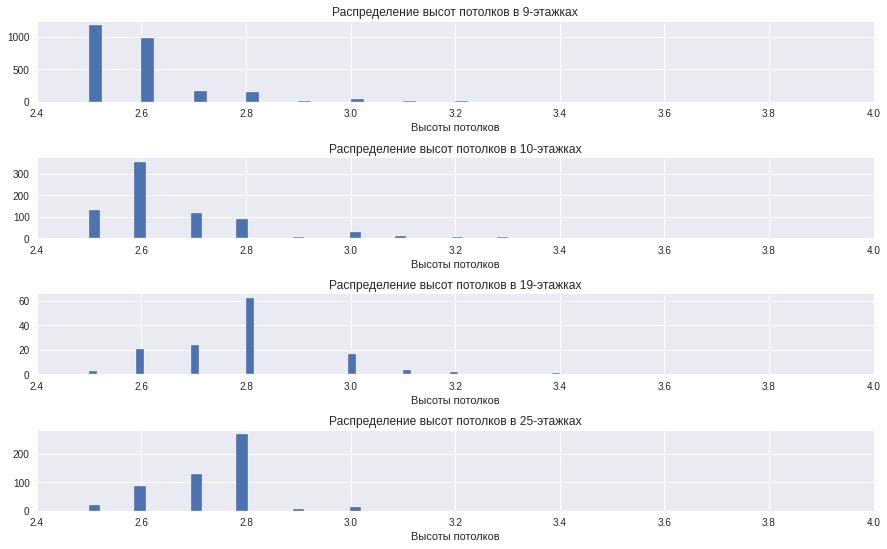

In [81]:
plt.style.use('seaborn')
plt.figure(figsize = (15,9))
plt.subplots_adjust(hspace=0.7)
plt.subplot(4, 1, 1)
plt.hist(data1
         .query('floors_total == 9')['ceiling_height'],
        bins = 60)
plt.title('Распределение высот потолков в 9-этажках')
plt.xlim(2.4, 4)
plt.xlabel('Высоты потолков')

plt.subplot(4, 1, 2)
plt.hist(data1
         .query('floors_total == 10')['ceiling_height'],
        bins = 60)
plt.title('Распределение высот потолков в 10-этажках')
plt.xlim(2.4, 4)
plt.xlabel('Высоты потолков')

plt.subplot(4, 1, 3)
plt.hist(data1
         .query('floors_total == 19')['ceiling_height'],
        bins = 60)
plt.title('Распределение высот потолков в 19-этажках')
plt.xlim(2.4, 4)
plt.xlabel('Высоты потолков')

plt.subplot(4, 1, 4)
plt.hist(data1
         .query('floors_total == 25')['ceiling_height'],
        bins = 60)
plt.title('Распределение высот потолков в 25-этажках')
plt.xlim(2.4, 4)
plt.xlabel('Высоты потолков')

plt.show()

Для каждой этажности, даже самой типовой, есть вариации высот потолков. В этой ситуации при любой попытке заполнить автоматически отсутствующие высоты мы рискуем получить искажения реальности.

Теоретически можно попытаться выявить типовые высоты потолков для 9-, 10, 19- 22-этажных домов, проведя исследование их географии, также, как мы проводили оценивали, в каких домах или районах находились аномальные значения. Но это отдельная большая и очень кропотливая работа.

##### Рассмотрим еще здания выше 28 этажей.

In [82]:
display(data1.query('floors_total == 35'))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
871,14,7777777.0,75.0,2017-11-16,2,NaN,35.0,40.5,23,NaN,0,0,11.7,0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,169.0
1060,10,5200000.0,50.0,2015-11-06,2,NaN,35.0,39.0,15,False,0,0,20.5,2,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,281.0
1917,13,10150000.0,74.0,2017-11-17,2,2.8,35.0,34.4,30,NaN,0,0,13.0,0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,NaN
2966,9,4300000.0,37.0,2017-08-08,1,NaN,35.0,14.0,15,NaN,0,0,10.4,0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,50.0
4855,12,5500000.0,50.0,2017-06-22,1,2.8,35.0,22.0,4,NaN,0,0,13.0,0,Санкт-Петербург,18627.0,20339.0,1.0,609.0,3.0,145.0,537.0
5749,20,3590000.0,25.0,2017-08-30,0,2.8,35.0,NaN,26,NaN,0,1,NaN,2,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,198.0
5808,12,4590000.0,43.0,2018-10-19,1,NaN,35.0,14.0,11,NaN,0,0,15.0,0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,82.0
7236,10,4599000.0,42.0,2019-01-10,1,NaN,35.0,15.0,12,NaN,0,0,11.0,2,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,72.0
8496,20,7500000.0,73.3,2017-05-18,3,NaN,35.0,28.0,27,NaN,0,0,23.1,0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,250.0
9186,7,6500000.0,49.1,2019-04-12,1,2.5,35.0,31.0,3,NaN,0,0,7.0,0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,3.0


In [83]:
display(data1.query('floors_total > 35'))
# в этой групе было значение высоты потолка 1.8, которое мы заменили ранее на 2.8м.

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
397,15,5990000.0,54.0,2018-03-22,2,2.7,36.0,21.4,28,NaN,0,0,18.70,1,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,11.0
2253,12,3800000.0,45.5,2018-06-28,2,2.9,60.0,27.4,4,NaN,0,0,7.40,0,Кронштадт,67763.0,49488.0,2.0,342.0,3.0,614.0,166.0
5807,17,8150000.0,80.0,2019-01-09,2,2.7,36.0,41.0,13,NaN,0,0,12.00,5,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0
11079,16,9200000.0,75.0,2019-02-22,2,2.7,36.0,40.0,29,NaN,0,0,12.00,2,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,NaN
16731,9,3978000.0,40.0,2018-09-24,1,2.6,52.0,10.5,18,NaN,0,0,14.00,0,Санкт-Петербург,20728.0,12978.0,1.0,793.0,0.0,NaN,45.0
16934,5,4100000.0,40.0,2017-10-17,1,2.8,37.0,17.4,5,NaN,0,0,8.34,0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,71.0


In [84]:
display(data1.query(' 28 < floors_total < 35'))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1697,11,3550000.0,28.0,2018-02-08,1,2.6,34.0,18.00,23,NaN,0,0,NaN,0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,410.0
3797,10,4100000.0,43.2,2018-09-24,1,2.6,29.0,14.35,18,NaN,0,0,14.4,2,посёлок Парголово,53734.0,19942.0,0.0,NaN,0.0,NaN,45.0
11575,9,9900000.0,101.0,2016-04-28,3,NaN,33.0,53.00,32,False,0,0,21.0,0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,53.0


##### Много квартир на расстоянии 20444м от центра 

In [85]:
display(data1.query('cityCenters_nearest == 20444'))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
397,15,5990000.0,54.0,2018-03-22,2,2.7,36.0,21.4,28,NaN,0,0,18.70,1,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,11.0
871,14,7777777.0,75.0,2017-11-16,2,NaN,35.0,40.5,23,NaN,0,0,11.70,0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,169.0
1060,10,5200000.0,50.0,2015-11-06,2,NaN,35.0,39.0,15,False,0,0,20.50,2,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,281.0
1697,11,3550000.0,28.0,2018-02-08,1,2.6,34.0,18.0,23,NaN,0,0,NaN,0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,410.0
1917,13,10150000.0,74.0,2017-11-17,2,2.8,35.0,34.4,30,NaN,0,0,13.00,0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,NaN
2966,9,4300000.0,37.0,2017-08-08,1,NaN,35.0,14.0,15,NaN,0,0,10.40,0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,50.0
5749,20,3590000.0,25.0,2017-08-30,0,2.8,35.0,NaN,26,NaN,0,1,NaN,2,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,198.0
5807,17,8150000.0,80.0,2019-01-09,2,2.7,36.0,41.0,13,NaN,0,0,12.00,5,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0
5808,12,4590000.0,43.0,2018-10-19,1,NaN,35.0,14.0,11,NaN,0,0,15.00,0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,82.0
7236,10,4599000.0,42.0,2019-01-10,1,NaN,35.0,15.0,12,NaN,0,0,11.00,2,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,72.0


Похоже, что это все один большой дом на расстоянии 20444 метров от центра.\
Большая часть значений высот потолков составляет 2.7 метра, хотя есть и отличающиеся значения - 2.6, 2.8 метра. Эти отличия могут быть обусловлены точностью измерений или особенностями ремонта в каждой отдельной квартире.\
И даже есть одна квартирка с высотой 1.8 метра где-то под крышей - может и ошибка записи, а может и правда есть каморка памяти Раскольникова. (Ранее предположили, что это все-таки ошибка записи и заменили 1.8 на 2.8)\
Вполне можно считать, что нормальная высота потолка в этом доме 2.7 м.


In [86]:
# Проверим количество пропусков перед их заполнением.
print('Количество пропусков в столбце "ceiling_height" до заполнения - ', 
      data1.query('cityCenters_nearest == 20444')['ceiling_height'].isna().sum())

# Теперь заполним пропуски в 35-этажном доме на удалении 20444 м от центра.
data1.loc[(data1['cityCenters_nearest'] == 20444) & (data1['ceiling_height'].isna()),'ceiling_height'] = 2.7

# Снова проверим количество пропусков
print('Количество пропусков в столбце "ceiling_height" после заполнения - ', 
      data1.query('cityCenters_nearest == 20444')['ceiling_height'].isna().sum())
data1.query('cityCenters_nearest == 20444')

Количество пропусков в столбце "ceiling_height" до заполнения -  15
Количество пропусков в столбце "ceiling_height" после заполнения -  0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
397,15,5990000.0,54.0,2018-03-22,2,2.7,36.0,21.4,28,NaN,0,0,18.70,1,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,11.0
871,14,7777777.0,75.0,2017-11-16,2,2.7,35.0,40.5,23,NaN,0,0,11.70,0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,169.0
1060,10,5200000.0,50.0,2015-11-06,2,2.7,35.0,39.0,15,False,0,0,20.50,2,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,281.0
1697,11,3550000.0,28.0,2018-02-08,1,2.6,34.0,18.0,23,NaN,0,0,NaN,0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,410.0
1917,13,10150000.0,74.0,2017-11-17,2,2.8,35.0,34.4,30,NaN,0,0,13.00,0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,NaN
2966,9,4300000.0,37.0,2017-08-08,1,2.7,35.0,14.0,15,NaN,0,0,10.40,0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,50.0
5749,20,3590000.0,25.0,2017-08-30,0,2.8,35.0,NaN,26,NaN,0,1,NaN,2,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,198.0
5807,17,8150000.0,80.0,2019-01-09,2,2.7,36.0,41.0,13,NaN,0,0,12.00,5,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0
5808,12,4590000.0,43.0,2018-10-19,1,2.7,35.0,14.0,11,NaN,0,0,15.00,0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,82.0
7236,10,4599000.0,42.0,2019-01-10,1,2.7,35.0,15.0,12,NaN,0,0,11.00,2,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,72.0


In [87]:
# Проверим - не потеряли ли кого:
display(data1.query('floors_total > 28')[data1['ceiling_height'].isnull()])

<ipython-input-87-7434b614b0ea>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  display(data1.query('floors_total > 28')[data1['ceiling_height'].isnull()])


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
18218,4,9900000.0,101.0,2018-09-27,3,NaN,35.0,53.4,33,NaN,0,0,13.7,2,Санкт-Петербург,18737.0,20450.0,0.0,NaN,3.0,72.0,7.0
18617,8,7350000.0,68.5,2017-10-09,2,NaN,35.0,27.0,3,NaN,0,0,23.0,1,Санкт-Петербург,18627.0,20339.0,1.0,609.0,3.0,145.0,41.0


Потерялись две строки. Дом скорее всего тот же, но здесь расстояния до центра немного отличаются от 20444.

In [88]:
# Заменим оставшиеся два пропуска.
data1['ceiling_height_1'] = data1[data1['floors_total'] > 28]['ceiling_height'].fillna(2.7)
data1.loc[data1['floors_total'] > 28, 'ceiling_height'] = data1['ceiling_height_1']

print('Количество NaN в высотах потолков в домах выше 28 этажей: ',
      data1.loc[data1['floors_total'] > 28, 'ceiling_height'].isna().sum())
print('Оставшееся количество NaN в высотах потолков:', 
      data1['ceiling_height'].isna().sum())
data1.query('cityCenters_nearest == 20444').head(10)

Количество NaN в высотах потолков в домах выше 28 этажей:  0
Оставшееся количество NaN в высотах потолков: 9177


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ceiling_height_1
397,15,5990000.0,54.0,2018-03-22,2,2.7,36.0,21.4,28,NaN,0,0,18.7,1,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,11.0,2.7
871,14,7777777.0,75.0,2017-11-16,2,2.7,35.0,40.5,23,NaN,0,0,11.7,0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,169.0,2.7
1060,10,5200000.0,50.0,2015-11-06,2,2.7,35.0,39.0,15,False,0,0,20.5,2,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,281.0,2.7
1697,11,3550000.0,28.0,2018-02-08,1,2.6,34.0,18.0,23,NaN,0,0,NaN,0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,410.0,2.6
1917,13,10150000.0,74.0,2017-11-17,2,2.8,35.0,34.4,30,NaN,0,0,13.0,0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,NaN,2.8
2966,9,4300000.0,37.0,2017-08-08,1,2.7,35.0,14.0,15,NaN,0,0,10.4,0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,50.0,2.7
5749,20,3590000.0,25.0,2017-08-30,0,2.8,35.0,NaN,26,NaN,0,1,NaN,2,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,198.0,2.8
5807,17,8150000.0,80.0,2019-01-09,2,2.7,36.0,41.0,13,NaN,0,0,12.0,5,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0,2.7
5808,12,4590000.0,43.0,2018-10-19,1,2.7,35.0,14.0,11,NaN,0,0,15.0,0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,82.0,2.7
7236,10,4599000.0,42.0,2019-01-10,1,2.7,35.0,15.0,12,NaN,0,0,11.0,2,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,72.0,2.7


In [89]:
# проверим, как выглядят теперь наши данные, на всякий случай.
data1.head(6)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ceiling_height_1
0,20,13000000.0,108.0,2019-03-07,3,2.7,16.0,51.0,8,NaN,0,0,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,NaN
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,0,0,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,NaN
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,0,0,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,NaN
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,NaN,0,0,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,NaN
4,2,10000000.0,100.0,2018-06-19,2,3.0,14.0,32.0,13,NaN,0,0,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,NaN
5,10,2890000.0,30.4,2018-09-10,1,NaN,12.0,14.4,5,NaN,0,0,9.1,0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,NaN


<div class="alert alert-info">
    <h4> Итого: </h4>
    
1. Мы избавились от явно аномальных значений высот потолков, подобрав вручную подходящие значения. Теперь наши графики будет удобно смотреть без дополнительных ограничений по высотам потолков.
    
2. Мы удалили 110 строк с аномальными значениями высот потолков, так как они представляют собой единичные случаи и не являются статистически значимыми.
    
3. Заполнили пропуски высот потолков во всех домах выше 28 этажей типичным значением для этих домов - 2.7м.
    
4. Становится понятно, что при необходимости, можно для части пропусков в высотах потолков подобрать адекватные значения с учетом типа застройки (этажность, география). Но это очень кропотливая и долгая работа. К тому же, в зданиях более низкой этажности (менее 10 этажей) наблюдается очень большое рассеяние значений высот потолков, что явно затруднит такой ручной подбор значений.
    
5. Обнаружилось, что в методе where очень осторожно надо задавать условия меньше или больше, так как метод воспринимает NaN и как меньшие и как большие значения.
</div>

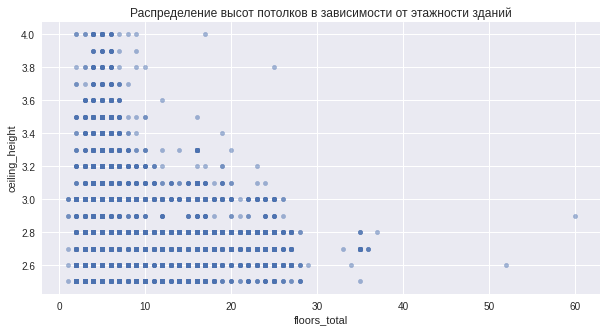

In [90]:
# Ещё раз визуализация распределения высот потолков:
data1.plot(x='floors_total', y='ceiling_height', kind='scatter', grid=True, figsize=(10, 5), alpha=0.5)
plt.title('Распределение высот потолков в зависимости от этажности зданий')
plt.show()

В наших данных всё равно осталось много пропусков в `ceiling_height`.\
Но на данном этапе оставим эти пропуски "как есть", \
то есть только с теми изменениями, которые мы провели вручную.


[В оглавление](#content)

<a id='step2_6'></a>
### 2.6. Аппартаменты

Следующие пропуски, которые кажутся очевидными - в столбце 'is_apartment'.
Апартаменты не относятся к жилым помещениям и имеют особый статус. Там можно жить, но нельзя прописаться.
Из соображений здравого смысла, предположим, что продавцы апартаментов точно знают, что они продают именно апартаменты, и почти наверняка это укажут. Если продавец не указал статус апартаменты, то можно предположить, что он продает не апартаменты. 

In [91]:
print('Количество пропусков в is_apartment:', 
     data1['is_apartment'].isna().sum())

Количество пропусков в is_apartment: 20834


In [92]:
data1['is_apartment'].value_counts()

False    2709
True       46
Name: is_apartment, dtype: int64

Просто посмотрим на is-apartment == True.\
Вдруг они особенные

In [93]:
data1.query('is_apartment == True').head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ceiling_height_1
543,11,12790000.0,56.6,2018-11-06,2,3.5,3.0,29.40,1,True,0,0,NaN,0,Петергоф,35248.0,30437.0,3.0,53.0,3.0,22.0,NaN,NaN
916,11,8183000.0,70.0,2018-01-11,2,3.1,3.0,40.00,3,True,0,0,NaN,2,Санкт-Петербург,45796.0,21729.0,0.0,NaN,1.0,754.0,179.0,NaN
1109,1,34878556.0,95.8,2014-12-09,2,NaN,6.0,58.30,5,True,0,0,20.00,1,Санкт-Петербург,21860.0,318.0,2.0,160.0,3.0,569.0,1572.0,NaN
1608,12,2150000.0,20.1,2019-01-30,1,NaN,9.0,NaN,1,True,0,0,NaN,0,Санкт-Петербург,26646.0,12147.0,0.0,NaN,0.0,NaN,13.0,NaN
2759,11,7500000.0,152.0,2018-07-27,3,3.0,3.0,NaN,1,True,0,0,NaN,1,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN
2975,9,4931398.0,42.9,2018-07-23,1,3.2,4.0,20.39,3,True,0,0,10.29,0,Санкт-Петербург,44870.0,20802.0,0.0,NaN,1.0,792.0,273.0,NaN
3816,4,4779000.0,53.1,2016-05-16,1,NaN,13.0,19.80,6,True,0,0,15.90,2,Санкт-Петербург,19396.0,4516.0,0.0,NaN,1.0,826.0,60.0,NaN
3951,10,4300000.0,50.0,2019-04-20,1,3.0,11.0,17.00,9,True,0,0,12.00,2,Санкт-Петербург,10143.0,11367.0,0.0,NaN,0.0,NaN,NaN,NaN
4339,19,6900000.0,72.0,2019-03-25,3,3.5,4.0,70.00,1,True,0,0,NaN,0,Санкт-Петербург,31487.0,4466.0,2.0,353.0,1.0,439.0,22.0,NaN
5297,19,45000000.0,96.0,2018-11-15,2,3.2,6.0,NaN,4,True,0,0,45.00,1,Санкт-Петербург,21860.0,318.0,2.0,160.0,3.0,569.0,NaN,NaN


Никаких явных особенностей не наблюдается. Нет видимой связи между общей, жилой и кухонной площадями или каких-то других видимых закономерностей. 


Замним в `is_apartment`  `NaN` на `False`:

In [94]:
data1['is_apartment'] = data1['is_apartment'].fillna(False)
print('Проверим тип данных в is_apartment:', data1['is_apartment'].dtypes)
data1.isnull().sum()

Проверим тип данных в is_apartment: bool


total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9177
floors_total               86
living_area              1892
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2263
balcony                     0
locality_name              49
airports_nearest         5505
cityCenters_nearest      5485
parks_around3000         5484
parks_nearest           15559
ponds_around3000         5484
ponds_nearest           14524
days_exposition          3164
ceiling_height_1        23556
dtype: int64

Мы заменили все NaN в столбце 'is_apartmet' на False, посчитав, что апартаменты - очень необычный вид жилья, и если продавец не указал особо, что он продает апартаменты, то скорее всего в объявлении обычная квартира.
После замены мы проверили полученный тип данных, и получили, что он теперь bool, как и положено.

[В оглавление](#content)

<a id='step2_7'></a>
### 2.7. Число этажей в доме, часть 2.

Выше мы уже рассматривали число этажей в доме, пытаясь найти какие-нибудь закономерности.\
Обратимся теперь к пропускам в этой категории.

<a id='print_nan'></a>
Создадим функцию  `print_nan` для печати числа пропусков и части датафрейма с пропусками.

In [95]:
def print_nan(df, column):
    print('Число пропусков в',
          column, 
          ':', 
          df[column].isna().sum())
    display(df[df[column].isnull()].head())

In [96]:
print_nan(df = data1,
          column = 'floors_total')

Число пропусков в floors_total : 86


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ceiling_height_1
186,12,11640000.0,65.2,2018-10-02,2,NaN,NaN,30.80,4,False,0,0,12.00,0,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0,NaN
237,4,2438033.0,28.1,2016-11-23,1,NaN,NaN,20.75,1,False,0,0,NaN,0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0,NaN
457,4,9788348.0,70.8,2015-08-01,2,NaN,NaN,38.40,12,False,0,0,10.63,0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0,NaN
671,4,6051191.0,93.6,2017-04-06,3,NaN,NaN,47.10,8,False,0,0,16.80,0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0,NaN
1757,5,3600000.0,39.0,2017-04-22,1,NaN,NaN,NaN,9,False,0,0,NaN,0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0,NaN


Всего 86 пропусков.

И пропуски в количетве этажей, похоже, имеют рядом пропуски в высоте потолков. \
Проверим это:

In [97]:
data1[(data1['floors_total'].isnull()) & (data1['ceiling_height'].notnull())]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ceiling_height_1
8478,19,13500000.0,77.8,2019-04-17,2,2.8,NaN,39.41,21,False,0,0,13.27,2,Санкт-Петербург,12838.0,11477.0,1.0,593.0,1.0,130.0,NaN,NaN
10058,9,3350000.0,25.0,2018-09-10,1,2.6,NaN,17.00,21,False,0,0,3.50,0,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,23.0,NaN
10568,12,14900000.0,100.0,2018-10-02,3,2.8,NaN,51.00,4,False,0,0,40.00,0,Санкт-Петербург,30766.0,8059.0,0.0,NaN,1.0,213.0,140.0,NaN
14264,13,14000000.0,94.0,2019-01-23,6,2.6,NaN,51.00,23,False,0,0,16.30,0,Санкт-Петербург,51333.0,13056.0,0.0,NaN,0.0,NaN,NaN,NaN
16668,0,15950000.0,108.0,2017-10-24,3,2.8,NaN,NaN,3,False,0,0,NaN,0,Санкт-Петербург,26402.0,5249.0,0.0,NaN,2.0,444.0,91.0,NaN
20250,5,6060000.0,60.6,2015-10-29,2,2.8,NaN,NaN,2,False,0,0,NaN,0,Санкт-Петербург,35231.0,13301.0,0.0,NaN,1.0,830.0,1257.0,NaN
21651,4,7143060.0,44.7,2019-01-11,1,3.0,NaN,13.79,19,False,0,0,NaN,0,Санкт-Петербург,9222.0,11340.0,0.0,NaN,0.0,NaN,NaN,NaN
22542,5,8500000.0,63.5,2017-05-24,2,2.8,NaN,NaN,3,False,0,0,NaN,0,Санкт-Петербург,51340.0,15363.0,0.0,NaN,1.0,853.0,512.0,NaN
23658,6,3063600.0,43.8,2016-11-28,1,2.7,NaN,14.00,8,False,0,0,15.50,2,Санкт-Петербург,8426.0,12082.0,2.0,24.0,1.0,271.0,246.0,NaN


Не угадали. Из 86 есть 9 строк, в которых присутствует значение ceiling_height.

Пропусков немного. И не представляется возможности заполнить эти пропуски исходя только из тех данных, которые у нас есть в нашем датафрейме.

Закономерно желание удалить эти пропуски.\
Но пока оставим. Эти строки несут другую полезную информацию. \
Удалить всегда успеем.\
Только запомним, что из-за NaN в данном столбце значения имеют тип float, и в int мы их преобразовать легким движением не сможем.

[В оглавление](#content)

<a id='step2_8'></a>
### 2.8. Жилая площадь


In [98]:
# Посмотрим на пропуски в living_area:
print_nan(df = data1,
          column = 'living_area')


Число пропусков в living_area : 1892


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ceiling_height_1
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,0,0,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,NaN
7,5,7915000.0,71.6,2019-04-18,2,NaN,24.0,NaN,22,False,0,0,18.9,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,NaN
30,12,2200000.0,32.8,2018-02-19,1,NaN,9.0,NaN,2,False,0,0,NaN,0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0,NaN
37,10,1990000.0,45.8,2017-10-28,2,2.5,5.0,NaN,1,False,0,0,NaN,0,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0,NaN
44,13,5350000.0,40.0,2018-11-18,1,NaN,22.0,NaN,3,False,0,0,NaN,1,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN,NaN


Многие из пропусков в living_area совпадают с пропусками в kitchen_area. Но не все.

Посмотрим, какие вообще есть значения в этом столбце.

<a id='hist0'></a>
Создадим сначала функцию  `hist0` для построения гистограммы распределения параметра:

In [99]:
def hist0(df, column, name, bins_n, xmin, xmax):
    df[column].hist(bins=bins_n,
                    range = (xmin, xmax),
                    figsize=(15, 4))
    plt.title('Распределение ' + column)
    plt.xlabel(name)
    plt.ylabel('количество')
    plt.show()

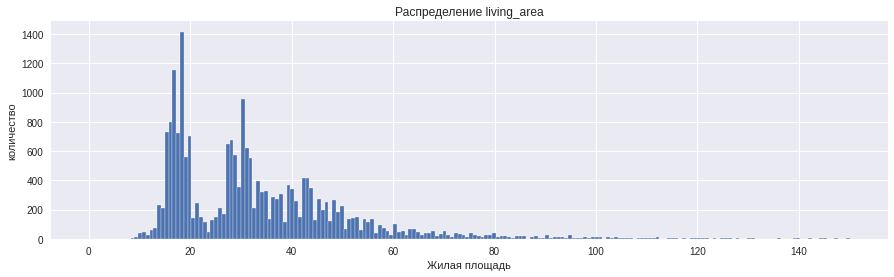

In [100]:
hist0(df = data1, 
      column = 'living_area', 
      name = 'Жилая площадь', 
      bins_n = 200, 
      xmin = 0, 
      xmax = 150)

In [101]:
data1['living_area'].describe()

count    21697.000000
mean        34.358785
std         21.663273
min          2.000000
25%         18.600000
50%         30.000000
75%         42.260000
max        409.700000
Name: living_area, dtype: float64

Очень большой разброс значений жилой площади. Некорректно будет брать ни среднее значение, ни медиану. Тем более, что в некоторых случаях медиана может оказаться больше общей площади - что будет совсе некорректно.

Но, вдруг есть корреляция между жилой площадью и общей? Посчитаем, какую часть от общей площади занимает жилая.

In [102]:
data1['convers_living_area'] = (data1['living_area'] / data1['total_area']) * 100
data1[['last_price', 
       'floors_total', 
       'floor', 
       'rooms', 
       'total_area', 
       'living_area', 
       'convers_living_area', 
       'kitchen_area', 
       'locality_name']].head(10)

,last_price,floors_total,floor,rooms,total_area,living_area,convers_living_area,kitchen_area,locality_name
0,13000000.0,16.0,8,3,108.00,51.00,47.222222,25.00,Санкт-Петербург
1,3350000.0,11.0,1,1,40.40,18.60,46.039604,11.00,посёлок Шушары
2,5196000.0,5.0,4,2,56.00,34.30,61.250000,8.30,Санкт-Петербург
3,64900000.0,14.0,9,3,159.00,NaN,NaN,NaN,Санкт-Петербург
4,10000000.0,14.0,13,2,100.00,32.00,32.000000,41.00,Санкт-Петербург
5,2890000.0,12.0,5,1,30.40,14.40,47.368421,9.10,городской посёлок Янино-1
6,3700000.0,26.0,6,1,37.30,10.60,28.418231,14.40,посёлок Парголово
7,7915000.0,24.0,22,2,71.60,NaN,NaN,18.90,Санкт-Петербург
8,2900000.0,27.0,26,1,33.16,15.43,46.531966,8.81,посёлок Мурино
9,5400000.0,9.0,7,3,61.00,43.60,71.475410,6.50,Санкт-Петербург


In [103]:
data1['convers_living_area'].describe()

count    21697.000000
mean        56.454334
std         10.531778
min          2.158273
25%         49.500713
50%         56.756757
75%         63.768116
max        100.000000
Name: convers_living_area, dtype: float64

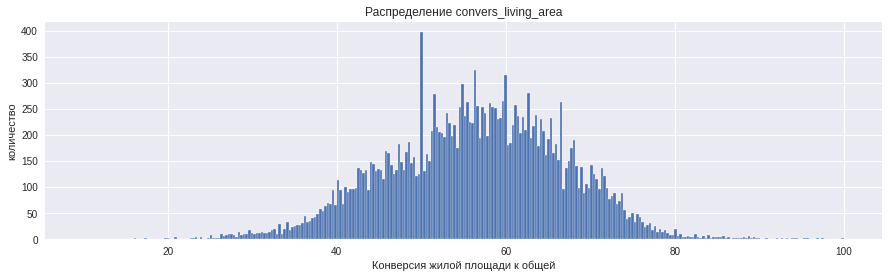

In [104]:
hist0(df = data1, 
      column = 'convers_living_area', 
      name = 'Конверсия жилой площади к общей', 
      bins_n = 300, 
      xmin = 10, 
      xmax = 100)

Основная часть квартир имеет соотношение от 40 до 70%.\
Межквартильный размах - от 50 до 64%.\
Медиана - 56.8% (среднее значение довольно близко к медиане - 56.5%)

Можно попробовать для замены пропусков в жилых площадях использовать медианное значение конверсий жилых площадей к общим.

In [105]:
# медиана конверсии жилой площади к общей = 56.8
# чтобы вычислить жилую площадь, умножим медианную конверсию на общую площадь и поделим на 100
#data1['convers_living_area'] = (data1['living_area'] / data1['total_area']) * 100

data1['living_area'] = data1['living_area'].fillna(data1['total_area'] * 0.56)
# Проверим, что получилось:
print('Число пропусков в living_area:', 
      data1['living_area'].isna().sum())
display(data1.query('convers_living_area != convers_living_area').head(6))

Число пропусков в living_area: 0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ceiling_height_1,convers_living_area
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,89.040,9,False,0,0,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,NaN,NaN
7,5,7915000.0,71.6,2019-04-18,2,NaN,24.0,40.096,22,False,0,0,18.9,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN
30,12,2200000.0,32.8,2018-02-19,1,NaN,9.0,18.368,2,False,0,0,NaN,0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0,NaN,NaN
37,10,1990000.0,45.8,2017-10-28,2,2.5,5.0,25.648,1,False,0,0,NaN,0,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0,NaN,NaN
44,13,5350000.0,40.0,2018-11-18,1,NaN,22.0,22.400,3,False,0,0,NaN,1,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN,NaN,NaN
59,15,6300000.0,46.5,2017-03-06,1,NaN,13.0,26.040,13,False,0,0,NaN,0,Санкт-Петербург,11125.0,14501.0,0.0,NaN,0.0,NaN,336.0,NaN,NaN


##### Итог. 

Мы заменили пропуски в жилой площади, исходя из общей площади и медианного значения отношения жилой площади к общей. Теперь здесь нет пропусков. \
Таких замен получилось 1892 (почти 8% данных).


[В оглавление](#content)

<a id='step2_9'></a>
### 2.9. Площадь кухни

Воспользуемся функцией [print_nan](#print_nan)

In [106]:
print_nan(data1, 'kitchen_area')

Число пропусков в kitchen_area : 2263


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ceiling_height_1,convers_living_area
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,89.040,9,False,0,0,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,NaN,NaN
30,12,2200000.0,32.8,2018-02-19,1,NaN,9.0,18.368,2,False,0,0,NaN,0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0,NaN,NaN
37,10,1990000.0,45.8,2017-10-28,2,2.5,5.0,25.648,1,False,0,0,NaN,0,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0,NaN,NaN
44,13,5350000.0,40.0,2018-11-18,1,NaN,22.0,22.400,3,False,0,0,NaN,1,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN,NaN,NaN
59,15,6300000.0,46.5,2017-03-06,1,NaN,13.0,26.040,13,False,0,0,NaN,0,Санкт-Петербург,11125.0,14501.0,0.0,NaN,0.0,NaN,336.0,NaN,NaN


Помним, что часть пропусков обусловлена наличием студий и опенпланов - это те квартиры, у которых 0 комнат и площадь кухонь 0.

In [107]:
print('Число квартир-студий и open_plan: ', 
      data1.query('rooms == 0').shape[0])

Число квартир-студий и open_plan:  196


In [108]:
data1['kitchen_area'].describe()

count    21326.000000
mean        10.558535
std          5.874114
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

Какой большой разброс в размерах кухонь: от 1.3 до 112 метров!\
Скорее всего, с площадьми кухонь мы тоже не сможем подобрать замены для Nan.\
Но для собственного спокойствия все-же посмотрим на эти значения также, как мы смотрели на жилые площади.


In [109]:
data1['convers_kitchen_area'] = (data1['kitchen_area'] / data1['total_area']) * 100
data1['convers_kitchen_area'].describe()

count    21326.000000
mean        18.745071
std          7.297794
min          2.538071
25%         13.333333
50%         17.241379
75%         23.250000
max         78.787879
Name: convers_kitchen_area, dtype: float64

Воспользуемся фнкцией [hist0](#hist0)

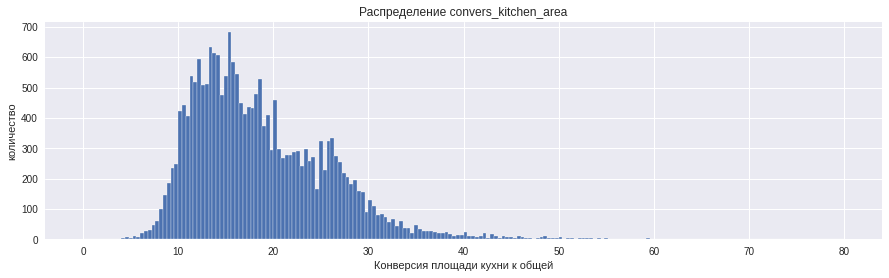

In [110]:
hist0(df = data1, 
      column = 'convers_kitchen_area', 
      name = 'Конверсия площади кухни к общей', 
      bins_n = 200, 
      xmin = 0, 
      xmax = 80)

Довольно большой разброс популярных значений. Примерно от 8 до 30 % от общей площади. 

Запомним эти значения. Если очень-очень будет надо, то можно будет посчитать по медиане - 17% от общей площади квартиры.\
Не забыв при этом про кухни в студиях и опенпланах.

Но пока оставим пропуски как есть.

[В оглавление](#content)

<a id='step2_10'></a>
### 2.10. География

In [111]:
print_nan(data1, 'locality_name')

Число пропусков в locality_name : 49


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ceiling_height_1,convers_living_area,convers_kitchen_area
1097,3,8600000.0,81.7,2016-04-15,3,3.6,5.0,50.8,2,False,0,0,8.8,0,NaN,23478.0,4258.0,0.0,NaN,0.0,NaN,147.0,NaN,62.178703,10.771114
2033,6,5398000.0,80.0,2017-05-30,3,NaN,4.0,42.6,2,False,0,0,18.6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0,NaN,53.250000,23.250000
2603,20,3351765.0,42.7,2015-09-20,1,NaN,24.0,15.6,3,False,0,0,10.7,0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,276.0,NaN,36.533958,25.058548
2632,2,5130593.0,62.4,2015-10-11,2,NaN,24.0,33.1,21,False,0,0,8.2,0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,256.0,NaN,53.044872,13.141026
3574,10,4200000.0,46.5,2016-05-28,2,NaN,5.0,30.8,5,False,0,0,6.5,0,NaN,27419.0,8127.0,0.0,NaN,1.0,603.0,45.0,NaN,66.236559,13.978495


In [112]:
data1['locality_name'].value_counts()

Санкт-Петербург            15655
посёлок Мурино               522
посёлок Шушары               440
Всеволожск                   396
Пушкин                       365
                           ...  
посёлок Сапёрное               1
поселок Каложицы               1
деревня Малая Романовка        1
деревня Шпаньково              1
деревня Новолисино             1
Name: locality_name, Length: 363, dtype: int64

49 пропусков в названиях населенных пунктов.

##### Заменим Nan на unknown ( чтобы тип объектов в столбце совпадал).

In [113]:
data1['locality_name'] = data1['locality_name'].fillna('unknown')
data1.query('locality_name == "unknown"').head(6)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ceiling_height_1,convers_living_area,convers_kitchen_area
1097,3,8600000.0,81.7,2016-04-15,3,3.6,5.0,50.80,2,False,0,0,8.80,0,unknown,23478.0,4258.0,0.0,NaN,0.0,NaN,147.0,NaN,62.178703,10.771114
2033,6,5398000.0,80.0,2017-05-30,3,NaN,4.0,42.60,2,False,0,0,18.60,0,unknown,NaN,NaN,NaN,NaN,NaN,NaN,34.0,NaN,53.250000,23.250000
2603,20,3351765.0,42.7,2015-09-20,1,NaN,24.0,15.60,3,False,0,0,10.70,0,unknown,22041.0,17369.0,0.0,NaN,1.0,374.0,276.0,NaN,36.533958,25.058548
2632,2,5130593.0,62.4,2015-10-11,2,NaN,24.0,33.10,21,False,0,0,8.20,0,unknown,22041.0,17369.0,0.0,NaN,1.0,374.0,256.0,NaN,53.044872,13.141026
3574,10,4200000.0,46.5,2016-05-28,2,NaN,5.0,30.80,5,False,0,0,6.50,0,unknown,27419.0,8127.0,0.0,NaN,1.0,603.0,45.0,NaN,66.236559,13.978495
4151,17,17600000.0,89.5,2014-12-09,2,3.0,8.0,39.62,7,False,0,0,13.38,0,unknown,25054.0,3902.0,1.0,485.0,3.0,722.0,869.0,NaN,44.268156,14.949721


Интересно, что для многих строк с неизвестным населенным пунктом, заполнены значения удаленности от центра, от аэропорта и т.д. \
То есть при наличии времени и при большом желании можно попытаться сопоставить харатерные расстояния с населенными пунктами.\
Мы же пока оставим наши пропуски как есть - 49 пропусков (0.2% от всех данных).\
Только названия приведем к одному регистру.

In [114]:
data1['locality_name'] = data1['locality_name'].str.lower()
data1['locality_name'].value_counts().head(10)

санкт-петербург      15655
посёлок мурино         522
посёлок шушары         440
всеволожск             396
пушкин                 365
колпино                337
посёлок парголово      326
гатчина                307
деревня кудрово        299
выборг                 234
Name: locality_name, dtype: int64

[В оглавление](#content)

<a id='step2_11'></a>
### 2.11.  Инфраструктура.

Для 5.5 тысяч строк у нас нет картографических данных.\
Посмотрим на географию этих строк.

In [115]:
not_cartography = data1.query('parks_around3000 == "NaN"')
not_cartography['locality_name'].value_counts().head(20)

Series([], Name: locality_name, dtype: int64)

In [116]:
print('В Петербурге данных с пропущенной географией: ', 
      len(not_cartography[not_cartography['locality_name'] == 'санкт-петербург']))

В Петербурге данных с пропущенной географией:  0


Из 5.5 тысяч абсолютное большинство - поселки, для которых, кажется, все значения можно восстановить.\
Лишь у 61 строки в Санкт-Петербурге такое восстановление маловероятно.\
Посмотрим, есть ли какая-нибудь картографичекая информация в наших данных для каких-нибудь из проблемных поселков. 

In [117]:
murino = data1.query('locality_name == "посёлок мурино"')
print(murino['airports_nearest'].unique())
print(murino['parks_around3000'].unique())
print('Число строк из поселка Мурино: ', murino.shape[0])

[nan]
[nan]
Число строк из поселка Мурино:  522


In [118]:
vyborg = data1.query('locality_name == "выборг"')
print(vyborg['airports_nearest'].unique())
print(vyborg['parks_around3000'].unique())
print('Число строк из Выборга: ', vyborg.shape[0])

[nan]
[nan]
Число строк из Выборга:  234


Для поселка Мурино, самого многочисленного по географическим пропускам, оказалось, что в наших данных нет ни одного известного значения расстояния до аэропорта, или количества парков в 3 км. \
И для Выборга тоже.\
То есть из таблицы мы эти цифры взять не можем.\
Возможно, что для пригорода расстояния отсутствуют, потому что слишком далеко до цента, аэропорта и парков с прудами. То есть настолько далеко, что и указывать их бессмысленно.\
Оставим пока географические пропуски как есть

Заметим еще, что в расстояниях до парка или до водоема есть дополнительные 10 тысяч пропусков.\
Тут есть определенная закономерность.\
В случае, если в колонке 'parks_around3000' стоит ноль, то расстояние до ближайшего парка - NaN, что вполне естественно. Трудно оценить расстояние до парков, которых нет.\
Тоже самое касается водоемов.\
Стоит ли заполнять эти расстояния? Пока кажется, что не стоит. Ведь если парка нет поблизости, то его нет.\


In [119]:
not_parks = data1.query('parks_around3000 == 0')
not_parks['locality_name'].value_counts().head(10)

санкт-петербург         8360
посёлок шушары           436
посёлок парголово        316
колпино                  204
пушкин                   154
красное село             129
ломоносов                116
сестрорецк               111
посёлок металлострой      64
петергоф                  58
Name: locality_name, dtype: int64

В Петербурге половина продаваемых квартир - без парков в радиусе 3 км.

#### Проверим - есть ли явные дубликты в наших данных

In [120]:
data1.duplicated().sum()

0

Дубликатов нет - это хорошо.

[В оглавление](#content)

<a id='step2_12'></a>
### 2.12.  Даты.

В столбце с датами мы уже заменили выше тип object на datetime.


In [121]:
print(data1['first_day_exposition'].head())

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]


In [122]:
data1['first_day_exposition'].describe(datetime_is_numeric=True)


count                            23589
mean     2017-11-08 23:09:56.566195968
min                2014-11-27 00:00:00
25%                2017-05-12 00:00:00
50%                2017-12-12 00:00:00
75%                2018-08-26 00:00:00
max                2019-05-03 00:00:00
Name: first_day_exposition, dtype: object

Предположение: пропуски в 'days exposition' могут означать, что объявление не было снято на момент формирования DataFrame.

Первое объявление - 2014 год.\
Последнее объявление - 3 мая 2019.

In [123]:
data_not_days = data1.query('days_exposition != days_exposition')
print(data_not_days['first_day_exposition'].value_counts().head(8))
print()
print(data_not_days['first_day_exposition'].value_counts().tail())

2019-04-22    46
2019-04-18    44
2019-04-04    36
2019-04-29    36
2019-04-08    36
2019-04-26    35
2019-04-17    35
2019-04-15    34
Name: first_day_exposition, dtype: int64

2018-01-08    1
2017-09-15    1
2018-05-11    1
2016-12-20    1
2017-08-27    1
Name: first_day_exposition, dtype: int64


Среди пропусков в 'days_exposition' в топе наиболее свежие - апрель 2019 года, что вполне отвечает нашей версии о том, что пропуски в этом столбце связаны с тем, что объявление не было снято на момент формирования Датафрейма.\
Но есть и единичные несвежие объявления - за 16, 17 или даже 15 года.

Воспользуемся функцией [hist0](#hist0), чтобы посмотреть гистограмму распределения дат публикации **среди объявлений с пропусками в  days_exposition**:

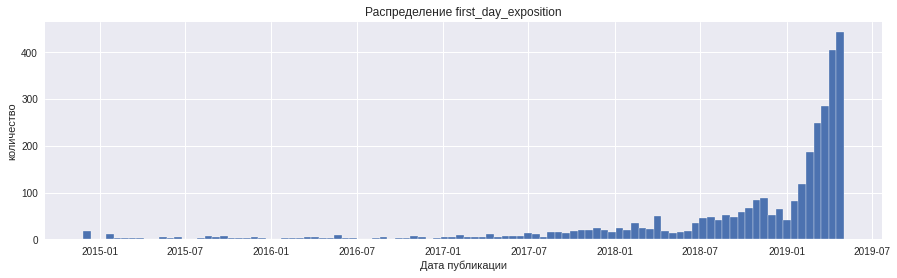

In [124]:
hist0(df = data_not_days, 
      column = 'first_day_exposition', 
      name = 'Дата публикации', 
      bins_n = 100, 
      xmin = '2014-11-27', 
      xmax = '2019-05-03')

   
На графике лучше видно, как распределились даты выставления объявлений в срезе с пустыми 'days_exposition'. 

Большая часть значений с пропускми в количестве дней - последние полтора года перед формированием датафрейма. \
Причем из этих полутора лет - значительный пик гистограммы приходится на первое полугодие 2019 года - то есть на последние полгода. Это хорошо соотносится с  с версией о том, что пропуски в длительности продаж могут соответствовать тому, что эти объявления еще не сняты.


In [125]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23589 entries, 0 to 23698
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23589 non-null  int64         
 1   last_price            23589 non-null  float64       
 2   total_area            23589 non-null  float64       
 3   first_day_exposition  23589 non-null  datetime64[ns]
 4   rooms                 23589 non-null  int64         
 5   ceiling_height        14412 non-null  float64       
 6   floors_total          23503 non-null  float64       
 7   living_area           23589 non-null  float64       
 8   floor                 23589 non-null  int64         
 9   is_apartment          23589 non-null  bool          
 10  studio                23589 non-null  int64         
 11  open_plan             23589 non-null  int64         
 12  kitchen_area          21326 non-null  float64       
 13  balcony         

### Выводы.
1. Мы заменили нулями пустые значения в столбце 'balcony'. Оставшиеся значения привели к типу int.

2. Заменили некоторые пропуски и аномалии в значениях высоты потолков. Строки, в которых не смогли заменить аномалии - удалили (их немного). Значения округлили до первого знака после запятой, уменьшив разнообразие этих значений. 

3. Заменили пропуски в столбце 'is_apartment' на False. Автоматически тип значений столбца стал bool вместо object.

4. Пропускам в количестве этажей мы не смогли найти внятного объяснения и предпочли оставить их как есть (их немного - 86). Тип значений при этом остался float из-за пропусков.

5. В квартирах типа 'studio' или 'open_plan' не обозначены площади кухонь, что вполне логично. Всем этим квартирам (и только им) соответствует нулевое количество комнат.

6. Доля жилой площади по отношению к общей, имеет в наших данных характерное распределение, в котором межквартильный размах умещается в пределах 50-60%. Медиана для этого отношения составила 56 % и почти совпадает со средним значением. Это позволило найти замену для пропусков в жилой площади. Мы общую площадь умножали на 0.56 (медиану соотношения жилой и общей площадей)

7. Отношение площади кухни к общей площади. Здесь разброс популярных значений - от 8 до 30%. 

8. Заменили пропуски в названиях населенных пунктов на 'unknown', приведя значения в столбце к единому типу.

9. Нет картографических данных для целых поселков - то есть если в поселке всего выставлено 500 квартир, то картографических данных нет сразу у всех.

10. Предположили, что отсутствие картографических данных в большинстве связано с настолько большой удаленностью от центра-парков-аэропортов, что указывать эти расстояния бессмысленно.

11. Большинство пропусков в столбцах с расстоянием до ближайшего пруда или до ближайшего парка хорошо соответствуют нулевым значениям в соседних 'parks_around3000' и 'ponds_around3000'. Что вполне логично - если нет ни одного парка, то нет и расстояния до него.

12. Даты в столбце 'first_day_exposition' перевели в тип datetime.

13. Предположили, что большинство пропусков в 'days_exposition' связаны с тем, что объявление еще не было снято на момент формирования датафрейма.

[В оглавление](#content)

<a id='step3'></a>
## Шаг 3. Посчитаем и добавим в таблицу

На этапе предобработки мы посчитали отношение жилой площади к общей и отношение площади кухни к общей площади.\
Записали эти значения в столбцы 'convers_living_area' и  'convers_kitchen_area' соответственно.

Посчитаем теперь:
1. цену за квадратный метр в столбце 'price_metr'
2. День недели пуликации объявления в столбце 'weekday_expos'
3. Месяц пуликации объявления в столбце 'month_expos'
4. Год пуликации объявления в столбце 'year_expos'

In [126]:
data1['price_metr'] = (data1['last_price'] / data1['total_area']) / 1000000
data1['weekday_expos'] = data1['first_day_exposition'].dt.weekday
data1['month_expos'] = data1['first_day_exposition'].dt.month
data1['year_expos'] = data1['first_day_exposition'].dt.year
data1.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ceiling_height_1,convers_living_area,convers_kitchen_area,price_metr,weekday_expos,month_expos,year_expos
0,20,13000000.0,108.0,2019-03-07,3,2.7,16.0,51.00,8,False,0,0,25.0,0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,NaN,47.222222,23.148148,0.120370,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.60,1,False,0,0,11.0,2,посёлок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,NaN,46.039604,27.227723,0.082921,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.30,4,False,0,0,8.3,0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,NaN,61.250000,14.821429,0.092786,3,8,2015
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,89.04,9,False,0,0,NaN,0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,NaN,NaN,NaN,0.408176,4,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.0,14.0,32.00,13,False,0,0,41.0,0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,NaN,32.000000,41.000000,0.100000,1,6,2018


#### сгруппируем этажи
Выделим первые, последние и другие этажи
Вспомним, что у нас есть 25 одноэтажных домов, в которых первый этаж будет и первым и последним.
Пусть эти этажи будут считаться только первыми.

In [127]:

def floors(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    if floors_total == floor:
        return 'последний'
    else:
        return 'другое'
    
data1['floor_type'] = data1.apply(floors, axis=1)
data1.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ceiling_height_1,convers_living_area,convers_kitchen_area,price_metr,weekday_expos,month_expos,year_expos,floor_type
0,20,13000000.0,108.0,2019-03-07,3,2.7,16.0,51.00,8,False,0,0,25.0,0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,NaN,47.222222,23.148148,0.120370,3,3,2019,другое
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.60,1,False,0,0,11.0,2,посёлок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,NaN,46.039604,27.227723,0.082921,1,12,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.30,4,False,0,0,8.3,0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,NaN,61.250000,14.821429,0.092786,3,8,2015,другое
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,89.04,9,False,0,0,NaN,0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,NaN,NaN,NaN,0.408176,4,7,2015,другое
4,2,10000000.0,100.0,2018-06-19,2,3.0,14.0,32.00,13,False,0,0,41.0,0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,NaN,32.000000,41.000000,0.100000,1,6,2018,другое


Мы добавили в таблицу новые столбцы:
1. *'price_metr'* - цена квадратного метра в млн.руб
2. *'weekday_expos'* - день недели публикаци
3. *'month_expos'* - месяц публикации
4. *'year_expos'* - год публикации
5. *'floor_type'* - Тип этажа (первый, последний, другое.)

Ранее также были добавлены столбцы:
1. *'convers_living_area'* - отношение жилой площади к общей
2. *'convers_kitchen_area'* - отношение площади кухни к общей площади

[В оглавление](#content)

<a id='step4'></a>
## Шаг 4. Исследовательский анализ данных

[В оглавление](#content)

<a id='step4_1'></a>
### 4.1.  Площадь.

In [128]:
print(data1['total_area'].describe())

count    23589.000000
mean        60.199833
std         35.060777
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64


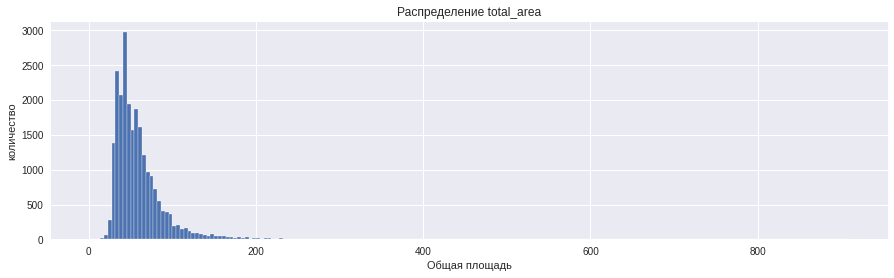

In [129]:
hist0(df = data1, 
      column = 'total_area', 
      name = 'Общая площадь', 
      bins_n = 200, 
      xmin = 0, 
      xmax = 910)

Видно, что большая часть значений укладывается до 200 квадратных метров. Дальше редкие выбросы.\
Посмотрим более детально:

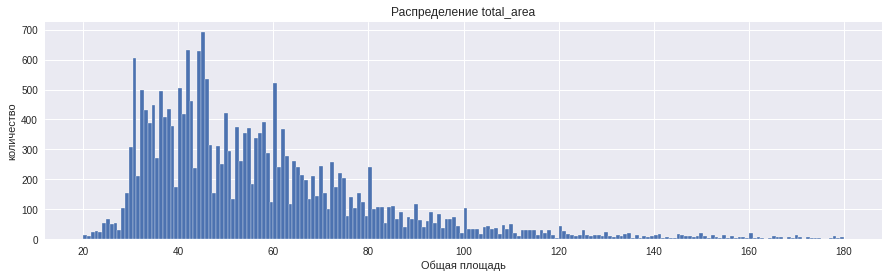

In [130]:
hist0(df = data1, 
      column = 'total_area', 
      name = 'Общая площадь', 
      bins_n = 200, 
      xmin = 20, 
      xmax = 180)

In [131]:
#Посмотрим солько строк у нас попадает в группу более 120 кв.м., более 200 кв.м., более 300 кв.м.
print('Кол-во строк в групе > 120 кв.м.: ', data1.query('total_area > 120').shape)
print('Кол-во строк в групе > 150 кв.м.: ', data1.query('total_area > 150').shape)

print('Кол-во строк в групе > 200 кв.м.: ', data1.query('total_area > 200').shape)
print('Кол-во строк в групе > 300 кв.м.: ', data1.query('total_area > 300').shape)

print('Кол-во строк в групе < 20 кв.м.: ', data1.query('total_area < 20').shape)

Кол-во строк в групе > 120 кв.м.:  (1044, 30)
Кол-во строк в групе > 150 кв.м.:  (550, 30)
Кол-во строк в групе > 200 кв.м.:  (215, 30)
Кол-во строк в групе > 300 кв.м.:  (56, 30)
Кол-во строк в групе < 20 кв.м.:  (27, 30)


- 200 объявлений - это чуть менее 1 % данных.
- 100 объявлений - мене 0.5%
- Здесь видно, что  площади менее 30 метров довольно редки, а менее 20 метров и вовсе почти уникальны. Но помним, что в интервал 25-30 кв.м. попадает большинство студий и опенпланов.
- Больше 120 метров - тоже довольно мало значений.
- Разброс от 12 до 900 метров.
- Среднее - 60 кв.м.
- Медиана - 52 кв.м.
- межквартильный размах - от 40 до 69 кв.м. = 29
- ус - 29 * 1.5 = 43.5
- таким образом нормальные значения должны укладываться от -3.5 до 112.5 кв.м. В нашем случае - от 12 до 112.5 кв.м.. 
- Более 120 кв.м. - длинный хвост, в который попадает довольно много значений - 1062 - почти 5%
- 5% - это довольно много.  Поэтому сместим верхнюю границу нормальных значений до 150 кв.м. Удалим значения меньше 20 и больше 150 кв.м.


In [132]:
# Проверим нашу оценку методом quantile 
np.quantile(data1['total_area'], 0.98, overwrite_input=False, interpolation='linear', keepdims=False)

157.5439999999988

In [133]:
# Удалим выбросы.
data2 = data1.query('20 < total_area < 150').copy()


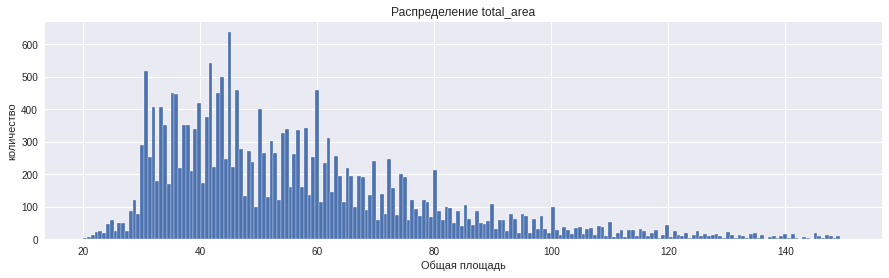

In [134]:
hist0(df = data2, 
      column = 'total_area', 
      name = 'Общая площадь', 
      bins_n = 200, 
      xmin = 20, 
      xmax = 150)

[В оглавление](#content)

<a id='step4_2'></a>
### 4.2.  Цена.

In [135]:
# создадим столбец, где цена указана в млн.руб - то есть поделим наши рубли на миллион:
# для наглядности
data2['price_mln'] = data2['last_price'] / 1000000
data2 = data2.round({'price_mln' : 2})
data2['price_mln'].head(15)

0     13.00
1      3.35
2      5.20
4     10.00
5      2.89
6      3.70
7      7.92
8      2.90
9      5.40
10     5.05
11     3.30
12     3.89
13     3.55
14     4.40
15     4.65
Name: price_mln, dtype: float64

In [136]:
print(data2['price_mln'].describe())

count    22986.000000
mean         5.688153
std          4.492974
min          0.010000
25%          3.400000
50%          4.590000
75%          6.500000
max        124.000000
Name: price_mln, dtype: float64


Воспользуемся фнкцией [hist0](#hist0)

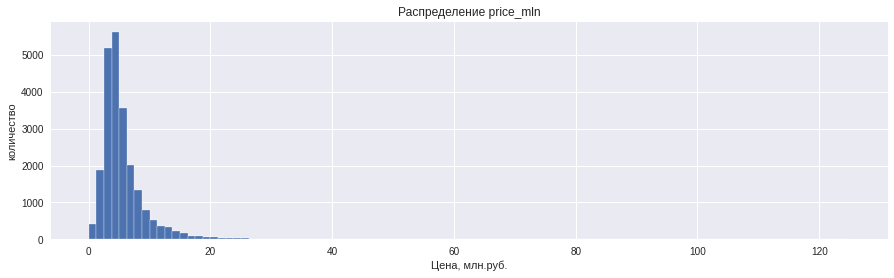

In [137]:
hist0(df = data2, 
      column = 'price_mln', 
      name = 'Цена, млн.руб.', 
      bins_n = 100, 
      xmin = 0, 
      xmax = 125)

In [138]:
print('Кол-во строк в групе > 100 млн.руб.: ', data2.query('price_mln > 100').shape)
print('Кол-во строк в групе > 50 млн.руб.: ', data2.query('price_mln > 50').shape)
print('Кол-во строк в групе > 30 млн.руб.: ', data2.query('price_mln > 30').shape)

Кол-во строк в групе > 100 млн.руб.:  (2, 31)
Кол-во строк в групе > 50 млн.руб.:  (19, 31)
Кол-во строк в групе > 30 млн.руб.:  (95, 31)


In [139]:
print(np.quantile(data2['price_mln'], 0.99, overwrite_input=False, interpolation='linear', keepdims=False))
print(np.quantile(data2['price_mln'], 0.01, overwrite_input=False, interpolation='linear', keepdims=False))

23.0
1.0


Всего 1% квартир стоимостью более 23 млн.руб.

***Удалим выбросы по стоимости квартир.***

In [140]:
data3 = data2.query('price_mln < 23').copy()

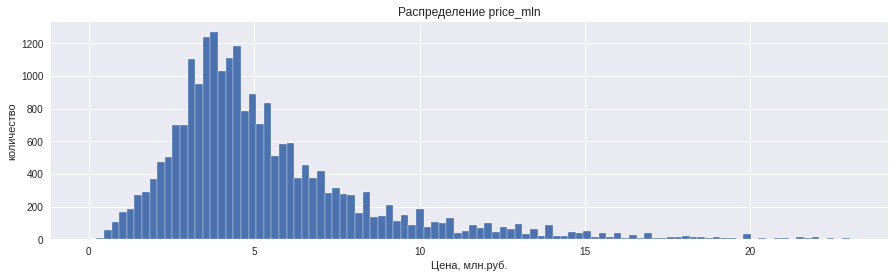

In [141]:
hist0(df = data3, 
      column = 'price_mln', 
      name = 'Цена, млн.руб.', 
      bins_n = 100, 
      xmin = 0, 
      xmax = 23)

- Средняя цена - 6.5 млн.руб.
- Медианная - 4.6 млн. руб.
- Средняя выше медианы почти наполовину.
- межквартильный размах - от 3.4 до 6.8 млн.руб. = 3.4 млн.
- нормальные значения: от 0 до 6.8 + (3.4 * 1.5) = 11.9 млн.руб.
- И длинный хвост очень высоких цен - до 763 млн.

***Но мы посмотрели на стоимости самих квартир. \
Надо бы еще посмотреть на стоимости квадратного метра:***

In [142]:
print(data3['price_metr'].describe())


count    22753.000000
mean         0.095323
std          0.033449
min          0.000112
25%          0.075952
50%          0.094262
75%          0.112500
max          0.600000
Name: price_metr, dtype: float64


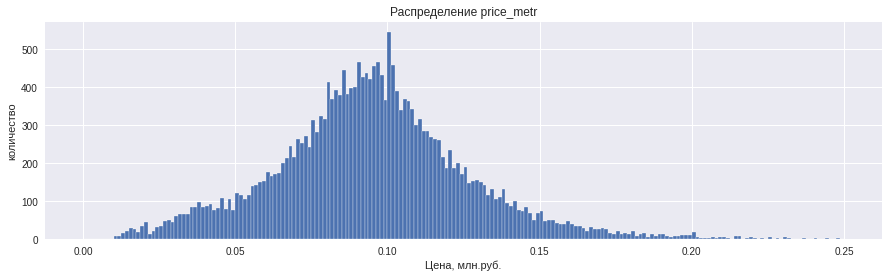

In [143]:

hist0(df = data3, 
      column = 'price_metr', 
      name = 'Цена, млн.руб.', 
      bins_n = 200, 
      xmin = 0, 
      xmax = 0.25)


- Медиана - 95 тыс.руб. за метр.
- Среднее - 99 тыс.руб. за метр. 
- В целом все симметрично и красиво - никаких заоблачных отскоков. Есть некоторый хвост больших значений (более 200тыс за метр).
- Межквартильный интервал - от 76 тыс.руб. до 114 тыс.руб.за кв.м. (114 - 76 = 38 тыс.)
- нормальные значения: от (76 - 57 = 19 тыс.руб.) до (114 + 57 = 171 тыс.руб.)

In [144]:
print(np.quantile(data3['price_metr'], 0.99, overwrite_input=False, interpolation='linear', keepdims=False))
print(np.quantile(data3['price_metr'], 0.01, overwrite_input=False, interpolation='linear', keepdims=False))

0.19471121822962306
0.022587236200012677


##### Удалим то, что дороже 200 тыс.руб.  за кв.м.


In [145]:
data4 = data3.query('price_metr < 0.2').copy()


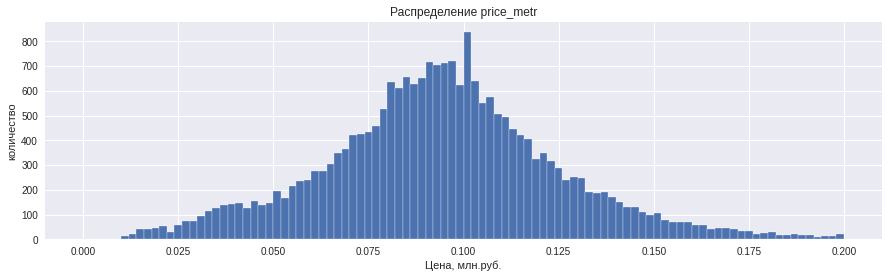

In [146]:
hist0(df = data4, 
      column = 'price_metr', 
      name = 'Цена, млн.руб.', 
      bins_n = 100, 
      xmin = 0, 
      xmax = 0.2)


[В оглавление](#content)

<a id='step4_3'></a>
### 4.3.   Число комнат.

In [147]:
print(data4['rooms'].describe())

count    22571.000000
mean         1.990652
std          0.944284
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64


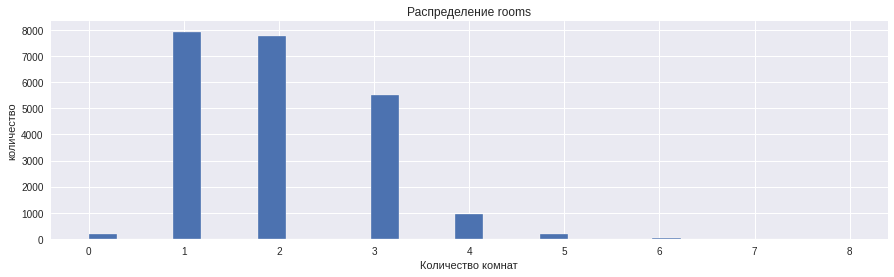

In [148]:
hist0(df = data4, 
      column = 'rooms', 
      name = 'Количество комнат', 
      bins_n = 27, 
      xmin = 0, 
      xmax = 8)


In [149]:
print('Кол-во строк в групе > 4 комнат: ', data4.query('rooms > 4').shape)
print('Кол-во строк в групе > 5 комнат: ', data4.query('rooms > 5').shape)
print('Кол-во строк в групе > 6 комнат: ', data4.query('rooms > 6').shape)
print('Кол-во строк в групе 0 комнат: ', data4.query('rooms == 0').shape)

Кол-во строк в групе > 4 комнат:  (201, 31)
Кол-во строк в групе > 5 комнат:  (29, 31)
Кол-во строк в групе > 6 комнат:  (6, 31)
Кол-во строк в групе 0 комнат:  (184, 31)


- У большнства - от 1 до 3 комнат.
- Мы уже выяснили, что 0 комнат - это студии и открытые планировки.
- 4-5 комнат уже встречаются гораздо реже. 
- Более 5 комнат - уже большая редкость (менее 1% всех данных)
- Более 7 комнат - это уже единичные случаи. После удаления выбросов по площадям и стоимостям у нас сами собой исчезли квартиры с количеством комнат более 7.

[В оглавление](#content)

<a id='step4_4'></a>
### 4.4.  Высота потолков.

In [150]:
display(data4['ceiling_height'].describe())
    

count    13737.000000
mean         2.706755
std          0.235795
min          2.500000
25%          2.500000
50%          2.600000
75%          2.800000
max          4.000000
Name: ceiling_height, dtype: float64

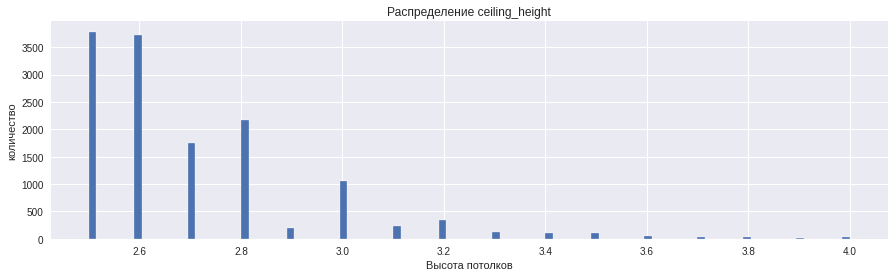

In [151]:
hist0(df = data4, 
      column = 'ceiling_height', 
      name = 'Высота потолков', 
      bins_n = 100, 
      xmin = 2.5, 
      xmax = 4)


    
В наших данных есть небольшой провал на значении 2.7м, несмотря на то, что это довольно стандартные значения для многих квартир. \
Возможно, это связано с тем, что такие высоты спрятаны в нашем большом количестве пропусков. 

Выше мы уже обработали высоты потолков и избавились от аномальных значений. \
Так что в этой выборке у нас остались только потолки от 2.5 до 4 метров. И большое количество пропусков.


In [152]:
# Оценим потери данных. 
print('Размеры нынешней таблицы:', 
      data4.shape)
print('Доля от стартовых данных: {:.2%}'.format(data4.shape[0] / data.shape[0]))

Размеры нынешней таблицы: (22571, 31)
Доля от стартовых данных: 95.24%


[В оглавление](#content)

<a id='step4_5'></a>
### 4.5.  Время продажи квартиры.

In [153]:
print_nan(df = data4, 
         column = 'days_exposition')

Число пропусков в days_exposition : 2911


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ceiling_height_1,convers_living_area,convers_kitchen_area,price_metr,weekday_expos,month_expos,year_expos,floor_type,price_mln
0,20,13000000.0,108.0,2019-03-07,3,2.7,16.0,51.000,8,False,0,0,25.0,0,санкт-петербург,...,16028.0,1.0,482.0,2.0,755.0,NaN,NaN,47.222222,23.148148,0.120370,3,3,2019,другое,13.00
7,5,7915000.0,71.6,2019-04-18,2,NaN,24.0,40.096,22,False,0,0,18.9,2,санкт-петербург,...,11634.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,26.396648,0.110545,3,4,2019,другое,7.92
44,13,5350000.0,40.0,2018-11-18,1,NaN,22.0,22.400,3,False,0,0,NaN,1,санкт-петербург,...,11603.0,1.0,620.0,1.0,1152.0,NaN,NaN,NaN,NaN,0.133750,6,11,2018,другое,5.35
45,17,5200000.0,50.6,2018-12-02,2,2.6,9.0,30.300,7,False,0,0,7.0,0,санкт-петербург,...,12872.0,0.0,NaN,0.0,NaN,NaN,NaN,59.881423,13.833992,0.102767,6,12,2018,другое,5.20
46,17,6600000.0,52.1,2019-01-31,2,2.6,24.0,29.700,9,False,0,0,8.3,2,санкт-петербург,...,12702.0,0.0,NaN,0.0,NaN,NaN,NaN,57.005758,15.930902,0.126679,3,1,2019,другое,6.60


В `days_exposition` осталось много попусков.\
последняя дата публикации объявления: 2019-05-03

In [154]:
data4['days_exposition'].describe()

count    19660.000000
mean       177.126501
std        215.890052
min          1.000000
25%         44.000000
50%         93.000000
75%        225.000000
max       1580.000000
Name: days_exposition, dtype: float64

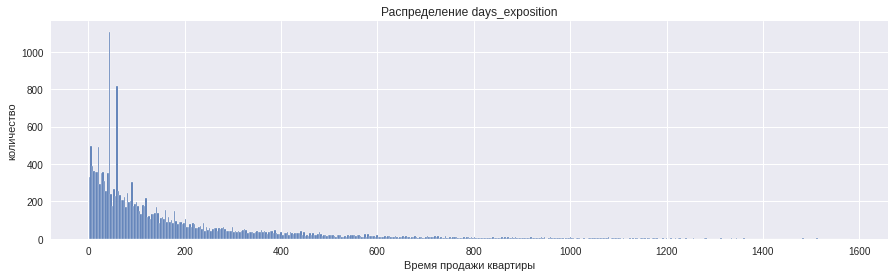

In [155]:
hist0(df = data4, 
      column = 'days_exposition', 
      name = 'Время продажи квартиры', 
      bins_n = 500, 
      xmin = 1, 
      xmax = 1580)


Среднее значение - 180 дней.\
Медианное - 95 дней.\
Среднее вдвое больше, чем медиана. \
Но у нас есть очень длинный хвост из очень долгих продаж - до 1580 дней.\
межквартильный размах - 232-45=187 дней.
    ус = 187 * 1.5 = 280.5\
    Нормальные значения должны попадать в рамках "усов".\
    232 + 280.5 = 512.5 дней. Это почти полтора года. Все что больше - слишком долгие продажи.

Попробуем отрубить хвосты и посмотреть, как изменится картина.

In [156]:
# Проконтроллируем, чтобы не потерялись строки с пропусками:
print('Число пропусков в days_exposition до удаления выбросов', 
      data4.query('days_exposition != days_exposition').shape[0])

days_expo = data4.query('days_exposition < 550 or days_exposition != days_exposition')
print('Число пропусков в days_exposition после удаления выбросов', 
      days_expo.query('days_exposition != days_exposition').shape[0])


Число пропусков в days_exposition до удаления выбросов 2911
Число пропусков в days_exposition после удаления выбросов 2911


In [157]:
days_expo['days_exposition'].describe()

count    18308.000000
mean       131.249836
std        126.523693
min          1.000000
25%         41.000000
50%         85.000000
75%        185.000000
max        549.000000
Name: days_exposition, dtype: float64

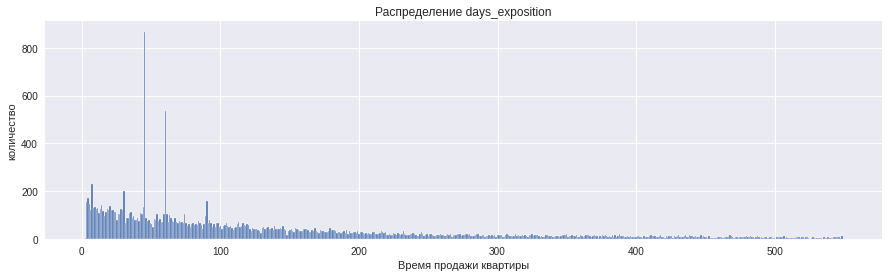

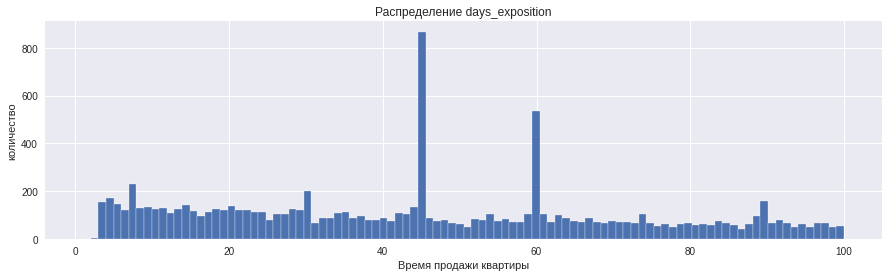

In [158]:
hist0(df = days_expo, 
      column = 'days_exposition', 
      name = 'Время продажи квартиры', 
      bins_n = 550, 
      xmin = 1, 
      xmax = 550)

hist0(df = days_expo, 
      column = 'days_exposition', 
      name = 'Время продажи квартиры', 
      bins_n = 100, 
      xmin = 1, 
      xmax = 100)


In [159]:
days_expo['days_exposition'].value_counts().head()

45.0    868
60.0    534
7.0     229
30.0    202
4.0     172
Name: days_exposition, dtype: int64

После отрубания хвостов, разница между средним и медианой сократилась, но все осталась значительной.\
Теперь медиана - 84 дней.\
Среднее - 131 дня.\
Странные выбросы в районе 45 и 60 дней. \
Небольшой пик в районе 90 дней похож на двойной срок по 45  :)
В силу того,что это единичные выбросы, можно предположить, что это какое-то технологичекое явление. Например, связано со сроком хранения бесплатных объявлений или что-то подобное (дата снятия объявления - это не обязательно дата продажи)...

В среднем квартиры продаются за 40-200 дней.
Менее 40 дней - это достаточно быстрые продажи и их у нас мене 25%
Более 200 дней - медленные продажи.
Более 512 дней - сверхмедленные продажи

Посмотрим, как изменится картина, если удалить выбросы 45 и 60 дней.

In [160]:
# Оценим потери
print('Стартовые данные: ', data.shape[0])
print('До удаления выбросов в days_exposition: ', data4.shape[0])
print('После удаления выбросов в days_exposition: ', days_expo.shape[0])


Стартовые данные:  23699
До удаления выбросов в days_exposition:  22571
После удаления выбросов в days_exposition:  21219


In [161]:
data4['days_exposition'].dtypes

dtype('float64')

In [162]:
# Округлим значения, чтобы иметь возможность корректно удалить точечные значения
days_expo = days_expo.round({'days_exposition' : 0})
days_expo.query('days_exposition == 45').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ceiling_height_1,convers_living_area,convers_kitchen_area,price_metr,weekday_expos,month_expos,year_expos,floor_type,price_mln
78,9,4350000.0,37.0,2018-02-22,1,NaN,19.0,18.0,6,False,0,0,10.7,0,санкт-петербург,...,14192.0,0.0,NaN,0.0,NaN,45.0,NaN,48.648649,28.918919,0.117568,3,2,2018,другое,4.35
89,9,2500000.0,63.0,2018-10-25,3,2.5,5.0,43.0,4,False,0,0,9.0,0,посёлок городского типа сиверский,...,NaN,NaN,NaN,NaN,NaN,45.0,NaN,68.253968,14.285714,0.039683,3,10,2018,другое,2.50
110,6,3850000.0,72.3,2017-09-29,2,NaN,3.0,27.4,2,False,0,0,23.6,0,деревня пикколово,...,NaN,NaN,NaN,NaN,NaN,45.0,NaN,37.897649,32.641770,0.053250,4,9,2017,другое,3.85
153,12,4350000.0,55.0,2017-05-21,2,2.6,9.0,31.2,2,False,0,0,8.3,0,петергоф,...,34425.0,1.0,589.0,0.0,NaN,45.0,NaN,56.727273,15.090909,0.079091,6,5,2017,другое,4.35
158,15,3100000.0,47.3,2017-11-07,2,NaN,5.0,27.5,2,False,0,0,8.5,0,городской посёлок янино-1,...,NaN,NaN,NaN,NaN,NaN,45.0,NaN,58.139535,17.970402,0.065539,1,11,2017,другое,3.10


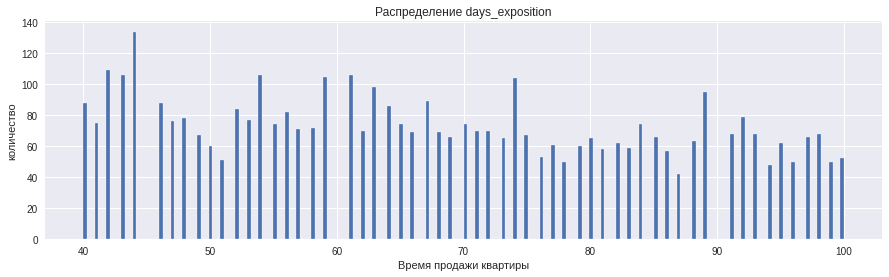

Пропусков до удаления 45, 60 и 90 дней:  2911
Пропусков после удаления 45, 60 и 90 дней:  2911
Строк после удаления 45, 60 и 90 дней:  19658
Удалено строк:  1561


In [163]:
days_expo1 = days_expo.query('days_exposition != 45.0')
#days_expo1 = days_expo[(days_expo['days_exposition'] != 45)]
#& (days_expo['days_exposition'] != 60)]
days_expo1 = days_expo1.query('days_exposition != 60')
days_expo1 = days_expo1.query('days_exposition != 90')

hist0(df = days_expo1, 
      column = 'days_exposition', 
      name = 'Время продажи квартиры', 
      bins_n = 200, 
      xmin = 40, 
      xmax = 100)

print('Пропусков до удаления 45, 60 и 90 дней: ', 
      days_expo.query('days_exposition != days_exposition').shape[0])

print('Пропусков после удаления 45, 60 и 90 дней: ', 
      days_expo1.query('days_exposition != days_exposition').shape[0])

print('Строк после удаления 45, 60 и 90 дней: ', 
      days_expo1.shape[0])

print('Удалено строк: ', 
      days_expo.shape[0] - days_expo1.shape[0])


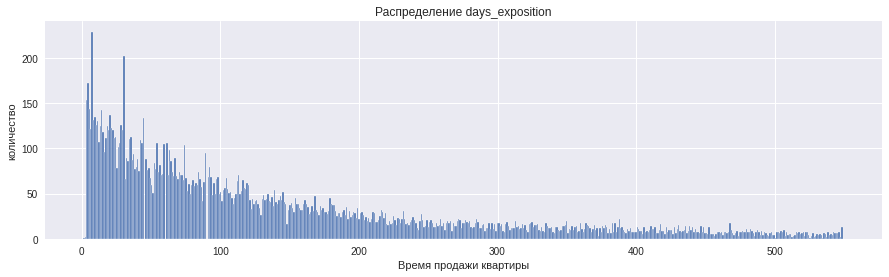

In [164]:
hist0(df = days_expo1, 
      column = 'days_exposition', 
      name = 'Время продажи квартиры', 
      bins_n = 550, 
      xmin = 1, 
      xmax = 550)


In [165]:
days_expo1['days_exposition'].describe() 


count    16747.000000
mean       138.383711
std        129.945957
min          1.000000
25%         37.000000
50%         95.000000
75%        199.000000
max        549.000000
Name: days_exposition, dtype: float64

Средние длительности немного изменились. \
Теперь медиана - 96 дней - это почти как в исходных данных, \
среднее - 140 дней - а вот среднее приблизилось к медиане.

Меньше 37 дней можно считать быстрыми продажами. Более 200 - долгими. Более 512 - сверхдолгими.

In [166]:
print(days_expo1.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19658 entries, 0 to 23698
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          19658 non-null  int64         
 1   last_price            19658 non-null  float64       
 2   total_area            19658 non-null  float64       
 3   first_day_exposition  19658 non-null  datetime64[ns]
 4   rooms                 19658 non-null  int64         
 5   ceiling_height        12117 non-null  float64       
 6   floors_total          19580 non-null  float64       
 7   living_area           19658 non-null  float64       
 8   floor                 19658 non-null  int64         
 9   is_apartment          19658 non-null  bool          
 10  studio                19658 non-null  int64         
 11  open_plan             19658 non-null  int64         
 12  kitchen_area          18170 non-null  float64       
 13  balcony         

In [167]:
print('Осталось данных до удаления строк с 45, 60 и 90 днями экспозиции: {:.2%}'
      .format(days_expo.shape[0] / data.shape[0]))

print('Осталось данных после удаления строк с 45, 60 и 90 днями экспозиции: {:.2%}'
      .format(days_expo1.shape[0] / data.shape[0]))


Осталось данных до удаления строк с 45, 60 и 90 днями экспозиции: 89.54%
Осталось данных после удаления строк с 45, 60 и 90 днями экспозиции: 82.95%


- В результате исключения всех выбросов у нас остлось почти 83% данных. 
- Если не удалять дни массового снятия объявлений (45, 60 и 90 дней), то останется 89.5% данных.


[В оглавление](#content)

<a id='step4_6'></a>
### 4.6.  Факторы, влияющие на цену. 

Вот мы и добрались до стоимости квартир.

#### 4.6.1. Факторы, влияющие на цену. площадь

<a id='corr_price'></a>
Определим функцию `corr_price` для вычисления и построения корреляции цены за квадратный метр с исследуемым параетром.

In [168]:
def corr_price(df, column):
    print('Коэффициент корреляции Пирсона между ценой и параметром {} : '.format(column),
          df['price_metr'].corr(df[column]))
    print()

    df.plot(x = column,
            y = 'price_metr', 
            kind = 'scatter', 
            grid = True, 
            title = ('Зависимость цены за кв.м. от ' + column),
            figsize = (15, 4), 
            alpha = 0.2)
    plt.show()
    


Посмотрим на зависимость цены за квадратный метр (в млн.руб.) от площади квартиры

Коэффициент корреляции Пирсона между ценой и параметром total_area :  0.08952321858485553



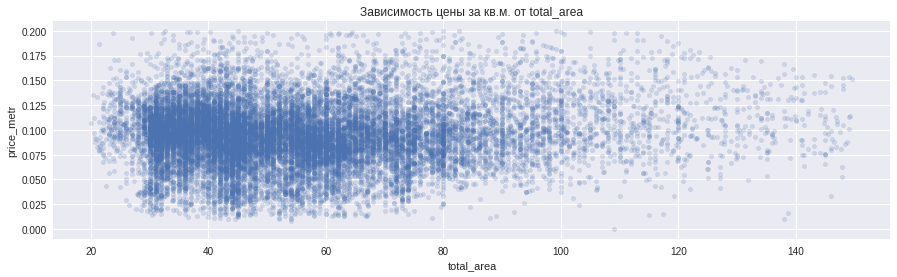

In [169]:
corr_price(df = days_expo1, 
          column = 'total_area')

Корреляция почти 0.09. \
Положительная, но совсем небольшая. 

#### 4.6.2. Факторы, влияющие на цену. число комнат

Коэффициент корреляции Пирсона между ценой и параметром rooms :  -0.12372821917552557



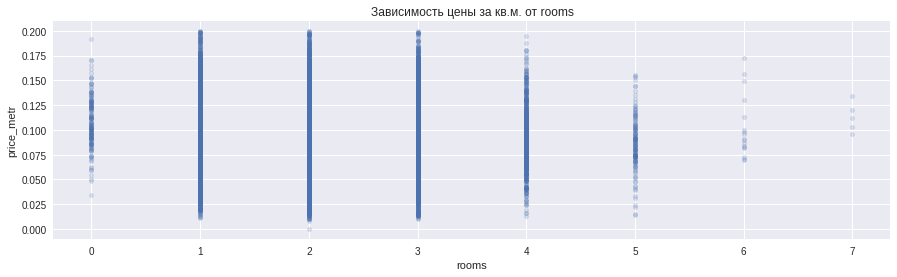

In [170]:
corr_price(df = days_expo1, 
          column = 'rooms')

   
- Небольшая отрицательная корреляция (-0.12). 
- Те не менее, на графике видно, что наибольшие цены за квадратный метр у 2-3-комнатных квартир.
- Удивительно, но при увеличении числа комнат больше 4 - цена заметно падает. Получается что увеличение числа комнат не способствует росту цены.

<i>Коэффициенты корреляции могут сильно измениться в зависимости от того, как мы отбрасываем аномальные значения параметров. Выбросы сильно искажают оценки основной массы данных. </i>

#### 4.6.3. Факторы, влияющие на цену. удаленность от центра

*** Зависимость цены от удалённости от центра до 60 км: 

Коэффициент корреляции Пирсона между ценой и параметром cityCenters_nearest :  -0.40090801487444216



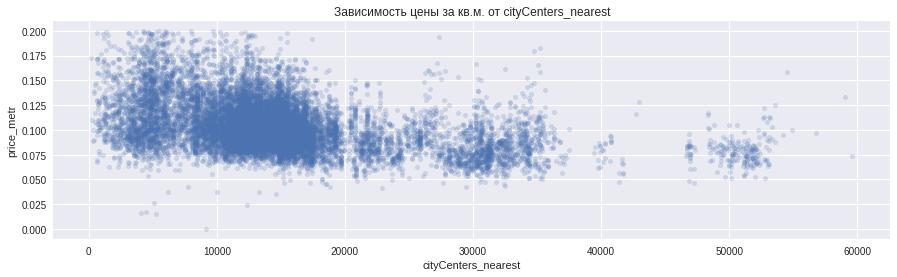


********************************************************************************
*** Зависимость цены от удалённости от центра до 35 км: 

Коэффициент корреляции Пирсона между ценой и параметром cityCenters_nearest :  -0.399262637608878



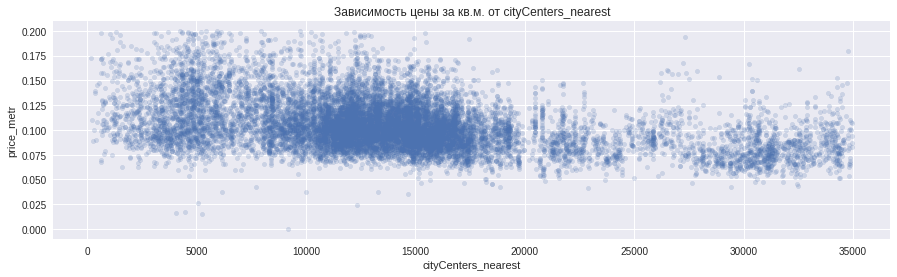

In [171]:
print('*** Зависимость цены от удалённости от центра до 60 км: ')
print()
corr_price(df = days_expo1.query('cityCenters_nearest < 60000'), 
          column = 'cityCenters_nearest')
print()
print(80 * '*')
print('*** Зависимость цены от удалённости от центра до 35 км: ')
print()
corr_price(df = days_expo1.query('cityCenters_nearest < 35000'), 
          column = 'cityCenters_nearest')

- Коэффициент кореляции отрицательный: -0.4.
- То есть, при увеличении растояния от центра цена за квадратный метр жилья склонна уменьшаться.
- На графике видно, что основная доля такого поведения приходится на расстояния до 20 км от центра. Дальше 20 км цены держатся более стабильно.
- На картинке видно, что в сегменте удаленности до 10 км много значений, отвечающих высоким ценам (200-500 тыс.руб. за кв.м.). Таких высоких значений почти нет на удаленности более 15 км. 

#### 4.6.4. Факторы, влияющие на цену. Этаж.

In [172]:
def pivot_price(df, column, size):
    # days_expo1
    df_new = df.pivot_table(index=column, 
                               values='price_metr', 
                               aggfunc=['count', 'mean', 'median']).reset_index()
    df_new.columns = [column, 'count', 'price_mean', 'price_median']
    display(df_new)
    
    df_new.plot(x = column, 
                y = 'price_median', 
                kind = 'bar', 
                title = 'Зависимость медианной цены за кв.м. от ' + column, 
                grid = True, 
                figsize = size)
    plt.show()
    return df_new

,floor_type,count,price_mean,price_median
0,другое,14562,0.098574,0.097601
1,первый,2425,0.080349,0.081452
2,последний,2671,0.085963,0.086879


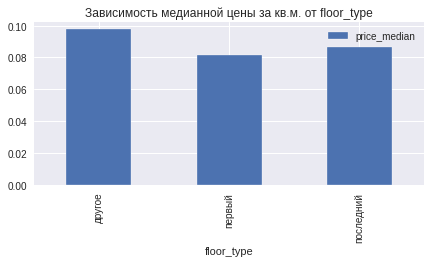

In [173]:
floors = pivot_price(df = days_expo1, 
                     column = 'floor_type', 
                     size = (7, 3))

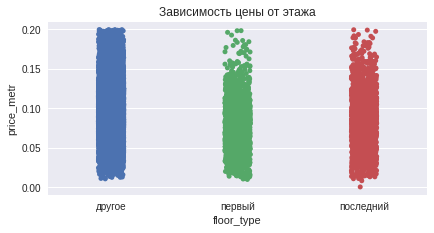

In [174]:
sns.catplot(x="floor_type", 
            y="price_metr", 
            data=days_expo1,
            height=3, 
            aspect=2)
plt.title('Зависимость цены от этажа')
plt.show()

- Самые дешевые - первые этажи (медиана 81.4 тыс.руб. за кв.метр)
- Другие этажи дороже всего (медиана 97.6 тыс.руб. за метр)
- Последние этажи занимают почетную серединку между первыми и другими (медиана 86.9 тыс.руб. за кв.метр).


#### 4.6.5. Факторы, влияющие на цену. дата размещения объявления

Сгруппируем данные по дню недели, по месяцу и по году выставления квартиры на продажу, и посмотрим, как будут меняться цены


*** Медианные стоимости за кв.м. по дням недели: 


,weekday_expos,count,price_mean,price_median
0,0,3009,0.095182,0.094444
1,1,3496,0.095231,0.095224
2,2,3267,0.095288,0.095176
3,3,3536,0.094353,0.094118
4,4,3389,0.094304,0.093750
5,5,1587,0.092552,0.092667
6,6,1374,0.093992,0.093735


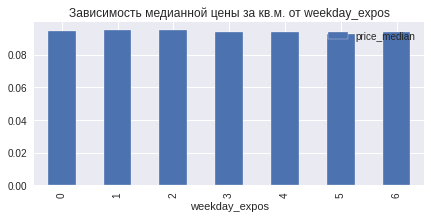


*** Медианные стоимости за кв.м. по месяцам: 


,month_expos,count,price_mean,price_median
0,1,1183,0.095516,0.095210
1,2,2164,0.094462,0.094828
2,3,2163,0.095081,0.095200
3,4,2089,0.095999,0.095588
4,5,1015,0.094528,0.092857
5,6,1407,0.091365,0.091842
6,7,1369,0.094413,0.094125
7,8,1476,0.096129,0.095884
8,9,1681,0.095671,0.094545
9,10,1869,0.094026,0.093478


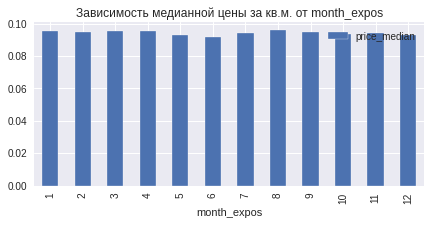


*** Медианные стоимости за кв.м. по годам: 


,year_expos,count,price_mean,price_median
0,2014,13,0.133600,0.156190
1,2015,544,0.091853,0.090439
2,2016,2017,0.091521,0.090682
3,2017,7049,0.092538,0.091684
4,2018,7371,0.095094,0.095541
5,2019,2664,0.101481,0.102603


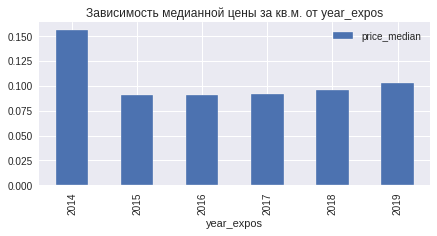

In [175]:
print()
print('*** Медианные стоимости за кв.м. по дням недели: ')
weekday = pivot_price(df = days_expo1, 
                      column = 'weekday_expos', 
                      size = (7, 3))
print()
print('*** Медианные стоимости за кв.м. по месяцам: ')
month = pivot_price(df = days_expo1, 
                    column = 'month_expos', 
                    size = (7, 3))

print()
print('*** Медианные стоимости за кв.м. по годам: ')
year = pivot_price(df = days_expo1, 
                   column = 'year_expos', 
                   size = (7, 3))

- По барам медианных значений цен почти не видно разницы по дням недели.
- По месяцам - есть некоторое уменьшение цен в апреле-июне и в декабре. 
- По годам картина более наглядная. Высокие цены в 2014 году могут быть еще обусловлены небольшм размером выборки за этот год (всего 13 строк). А вот с 2015 по 2019 год цены постепенно росли с 90.4 тыс до 102.6 тыс за кв.м.!

#### 4.6.6. Факторы, влияющие на цену. Популярные населенные пункты

Сначала выделим самые популярные населенные пункты. \
И посмотрим, что там происходит со средними значениями цен.

,locality_name,count,price_median,price_mean
322,санкт-петербург,12934,0.103510,0.107822
277,посёлок мурино,461,0.085680,0.085729
313,посёлок шушары,386,0.076876,0.078872
4,всеволожск,333,0.065333,0.067078
317,пушкин,312,0.099331,0.101703
124,колпино,291,0.075000,0.075583
281,посёлок парголово,277,0.092143,0.090517
6,гатчина,263,0.067647,0.068631
53,деревня кудрово,239,0.091803,0.092292
5,выборг,190,0.058001,0.058061


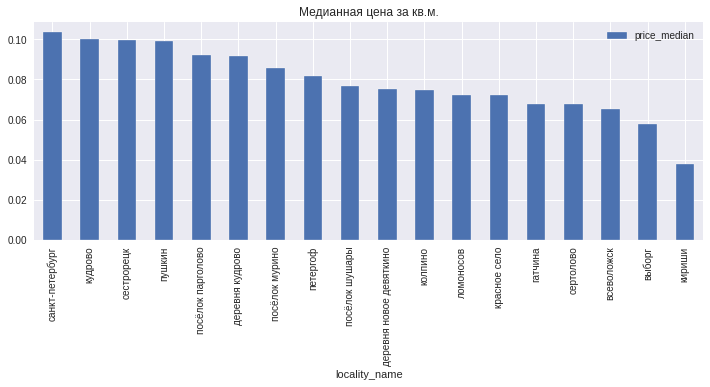

In [176]:
locality_pivot = (days_expo1.pivot_table(index='locality_name', 
                                         values='price_metr', 
                                         aggfunc=['count', 'median', 'mean']).reset_index()
                 )
locality_pivot.columns = ['locality_name', 'count', 'price_median', 'price_mean']

# Выберем самые популярные поселки, в которых продаётся более 100 квартир
locality_pivot = (locality_pivot.query('count >= 100')
                  .sort_values('count', ascending=False)
                 )
display(locality_pivot)

(locality_pivot.sort_values('price_median', ascending=False)
 .plot(x = 'locality_name',
       y = 'price_median', 
       kind = 'bar', 
       title = 'Медианная цена за кв.м.', 
       grid = True, 
       figsize = (12, 4)))
plt.show()

- Самые дешевые квартиры в Выборге и Всеволжске - в среднем, 56 и 66 тыс.руб.за кв.м.(в Киришах еще меньше - 38 тыс)
- Самые дорогие - в Санкт-Петербурге , Кудрово, Сестрорецке и в Пушкине - около 100 тыс. рублей за кв.м..

#### 4.6.7. Выводы о факторах, влияющих на цену.

- Выгоднее всего продавать трехкомнатную квартиру в центре Санкт-Петербурга, на не первом и не последнем этаже в августе-меяце.\
- И напротив, дешевле всего можно купить квартиру-студию или квартиру со свободной планировкой в Выборге на первом этаже в июне-месяце. 

1. Квартиры с большей площадью стоят в среднем дороже, чем малогабаритные.
2. Самые дорогие квартиры располагаются не на первых и не на последних этажах. Самые дешевые - на первых
3. Дороже продаются квартиры с 2-3 комнатами. При увеличении числа комнат цена за квадратный метр падает. 
4. Самые дорогие квартиры находятся в пределах 10 км от центра Санкт-Петербурга.
5. В августе квартиры продаются дороже всего. В июне и декабре - дешевле. В среднем, в июне цена ниже августовской на 4%.
6. Разумеется, есть погодовой рост цен на квартиры. В 2019 они продавались на 10% дороже, чем в 2015.
7. Самая яркая разница цен обнаружена в зависимости от населенного пункта. В Выборге квартиры почти вдвое дешевле, чем в Петербурге.

[В оглавление](#content)

<a id='step4_7'></a>
### 4.7. Сегмент квартир в центре.

Выделим сегмент данных по Санкт-Петербургу

In [177]:
piter = days_expo1.query('locality_name == "санкт-петербург"').copy()
piter['center_km'] = piter['cityCenters_nearest'] / 1000
print(piter.shape)


(12934, 32)


In [178]:
# Ометим пропуски:
print_nan(df = piter,
         column = 'center_km')

Число пропусков в center_km : 41


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ceiling_height_1,convers_living_area,convers_kitchen_area,price_metr,weekday_expos,month_expos,year_expos,floor_type,price_mln,center_km
81,9,10949000.0,68.0,2018-12-27,1,NaN,10.0,38.08,6,False,0,0,NaN,0,санкт-петербург,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.161015,3,12,2018,другое,10.95,NaN
593,20,4200000.0,38.3,2019-04-16,1,2.6,16.0,19.80,10,False,0,0,10.1,2,санкт-петербург,...,NaN,NaN,NaN,NaN,NaN,NaN,51.697128,26.370757,0.109661,1,4,2019,другое,4.20,NaN
604,11,9899000.0,101.0,2018-12-12,3,3.0,5.0,62.00,3,False,0,0,15.0,0,санкт-петербург,...,NaN,NaN,NaN,NaN,NaN,NaN,61.386139,14.851485,0.098010,2,12,2018,другое,9.90,NaN
795,19,7100000.0,59.6,2019-02-13,2,3.4,5.0,36.60,2,False,0,0,12.5,0,санкт-петербург,...,NaN,NaN,NaN,NaN,NaN,NaN,61.409396,20.973154,0.119128,2,2,2019,другое,7.10,NaN
1872,13,3100000.0,32.0,2019-03-15,1,NaN,4.0,19.00,2,False,0,0,5.0,0,санкт-петербург,...,NaN,NaN,NaN,NaN,3.0,NaN,59.375000,15.625000,0.096875,4,3,2019,другое,3.10,NaN


14 строк содержат 'NaN' в столбце расстояний до центра. Из почти 12 тысяч строк.\
Эти строки никак не помогут нам проанализировать цены в зависимости от удаленности от центра. Поэтому просто удалим их из этой выборки

In [179]:
piter = piter.dropna(subset=['center_km'])
print(piter.shape)
print("Пропусков в center_km: ", piter['center_km'].isna().sum())
piter['center_km'] = piter['center_km'].astype('int')
piter.head()

(12893, 32)
Пропусков в center_km:  0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ceiling_height_1,convers_living_area,convers_kitchen_area,price_metr,weekday_expos,month_expos,year_expos,floor_type,price_mln,center_km
0,20,13000000.0,108.0,2019-03-07,3,2.7,16.0,51.000,8,False,0,0,25.0,0,санкт-петербург,...,1.0,482.0,2.0,755.0,NaN,NaN,47.222222,23.148148,0.120370,3,3,2019,другое,13.00,16
4,2,10000000.0,100.0,2018-06-19,2,3.0,14.0,32.000,13,False,0,0,41.0,0,санкт-петербург,...,2.0,112.0,1.0,48.0,121.0,NaN,32.000000,41.000000,0.100000,1,6,2018,другое,10.00,8
7,5,7915000.0,71.6,2019-04-18,2,NaN,24.0,40.096,22,False,0,0,18.9,2,санкт-петербург,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,26.396648,0.110545,3,4,2019,другое,7.92,11
9,18,5400000.0,61.0,2017-02-26,3,2.5,9.0,43.600,7,False,0,0,6.5,2,санкт-петербург,...,0.0,NaN,0.0,NaN,289.0,NaN,71.475410,10.655738,0.088525,6,2,2017,другое,5.40,15
10,5,5050000.0,39.6,2017-11-16,1,2.7,12.0,20.300,3,False,0,0,8.5,0,санкт-петербург,...,1.0,310.0,2.0,553.0,137.0,NaN,51.262626,21.464646,0.127525,3,11,2017,другое,5.05,13



Воспользуемся функцией [corr_price](#corr_price)

In [180]:
print(piter['center_km'].describe())

count    12893.000000
mean        11.574808
std          4.613911
min          0.000000
25%          9.000000
50%         12.000000
75%         15.000000
max         29.000000
Name: center_km, dtype: float64


Коэффициент корреляции Пирсона между ценой и параметром center_km :  -0.3099776258041407



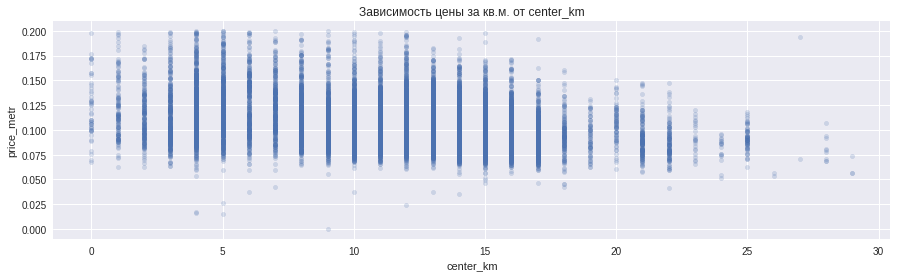

In [181]:
corr_price(df = piter,
          column = 'center_km')

,center_km,count,price_mean,price_median
0,0,49,0.123136,0.117284
1,1,132,0.121263,0.114760
2,2,195,0.115359,0.112195
3,3,368,0.114022,0.106967
4,4,585,0.122984,0.121538
5,5,495,0.123379,0.120000
6,6,327,0.123996,0.119355
7,7,312,0.122515,0.122282
8,8,526,0.115273,0.110629
9,9,588,0.108985,0.105506


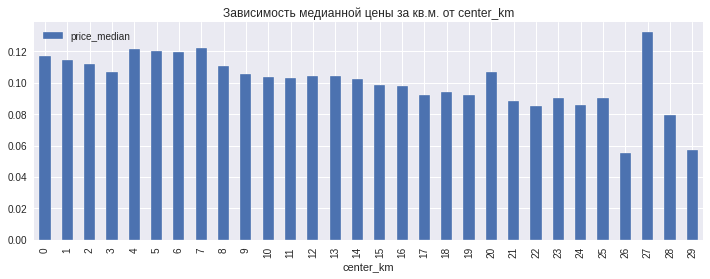

In [182]:
piter_km = pivot_price(df = piter, 
                       column = 'center_km', 
                       size = (12, 4))

1. На диаграмме рассеяния видно, что после 25 км - слишком мало данных, поэтому понятие средней цены там не очень достоверно. Возможно,что отскок стоимости на 27 км связан с новым жилым кварталом - там плотная (с маленьким разбросом) группа значений.
2. Относительно центра и до 25 км. наш график можно разделить на три зоны: 
   - 1-3 км (цены высокие, но с каждым километром равномерно падают), 
   - 4-7 км (стабильно высокие цены), 
   - и на 8-9 км цена снижается ступенькой с постепенным дальнейшим снижением.
3. Помним, что медианное значение стоимости за квадратный метр по всему региону была 95 тыс.руб.

#### Выделим сегмент в ценре Санкт-Петербурга

In [183]:
piter_center = piter.query('center_km < 9').copy()
print(piter_center.shape)
print(piter_center['price_metr'].describe())


(2989, 32)
count    2989.000000
mean        0.120080
std         0.029318
min         0.015345
25%         0.097701
50%         0.116129
75%         0.139659
max         0.199597
Name: price_metr, dtype: float64


#### Сегмент квартир в центре. Площадь квартиры.

In [184]:
display(piter_center['total_area'].describe())


count    2989.000000
mean       71.555718
std        27.564099
min        20.300000
25%        49.000000
50%        68.000000
75%        89.300000
max       149.200000
Name: total_area, dtype: float64

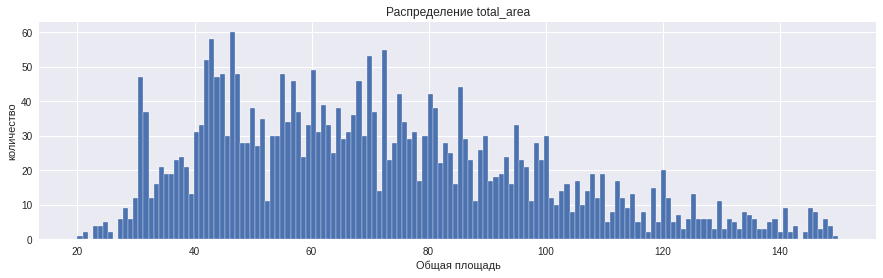

In [185]:
hist0(df = piter_center, 
      column = 'total_area', 
      name = 'Общая площадь', 
      bins_n = 150,
      xmin = 20,
      xmax = 150)

Коэффициент корреляции Пирсона между ценой и параметром total_area :  -0.1261937014508545



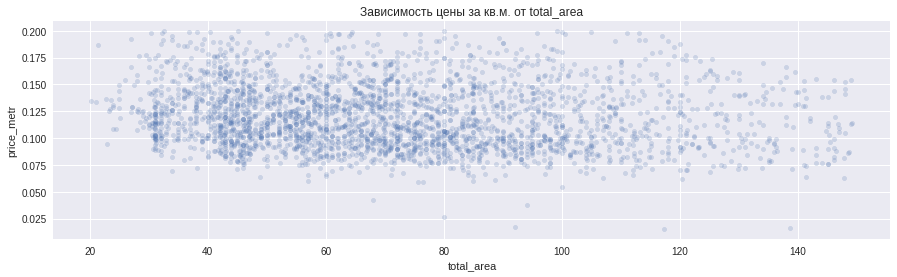

In [186]:
corr_price(df = piter_center, 
           column = 'total_area')

,group_area,count,price_mean,price_median
0,20.0,12,0.129322,0.130208
1,25.0,29,0.137527,0.128676
2,30.0,145,0.125012,0.120968
3,35.0,117,0.133213,0.134211
4,40.0,236,0.126506,0.121388
5,45.0,233,0.120442,0.115385
6,50.0,172,0.123290,0.120563
7,55.0,216,0.116833,0.114502
8,60.0,201,0.123172,0.121236
9,65.0,205,0.120622,0.119597


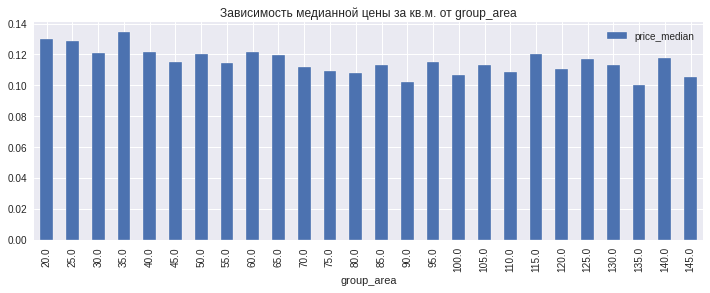

In [187]:
# Разобьем значения площади на групы, кратные 5 для удобства визуализации:
piter_center['group_area'] = (piter_center['total_area'] // 5) * 5

piter_km = pivot_price(df = piter_center, 
                       column = 'group_area', 
                       size = (12, 4))

In [188]:
print('Кол-во строк в групе > 120 кв.м.: ', piter_center.query('total_area > 120').shape)
print('Кол-во строк в групе > 200 кв.м.: ', piter_center.query('total_area > 200').shape)


Кол-во строк в групе > 120 кв.м.:  (189, 33)
Кол-во строк в групе > 200 кв.м.:  (0, 33)


- Площади основной массы квартир в центре города лежат в диапазоне от 25 до 150 метров.
- С значительными выбросами в районе 25 и примерно 40 метров - видимо какой-то стандарт какой-нибудь эпохи застройки.
- межквартильный размах - от 50 до 99 кв.м.
- На центр Петербурга приходится примерно половина всех больших квартир в регионе.
- Медианная цена - 119 тыс руб.
- На удивление, маленькие квартиры стоят дороже. Самые дорогие - 20, 25 и 35 кв.м.

#### Сегмент квартир в центре. Цена.

In [189]:
print('Характерные значения цен за кв.м. в млн.руб.')
display(piter_center['price_metr'].describe())

Характерные значения цен за кв.м. в млн.руб.


count    2989.000000
mean        0.120080
std         0.029318
min         0.015345
25%         0.097701
50%         0.116129
75%         0.139659
max         0.199597
Name: price_metr, dtype: float64

Коэффициент корреляции Пирсона между ценой и параметром center_km :  -0.003428356112024111



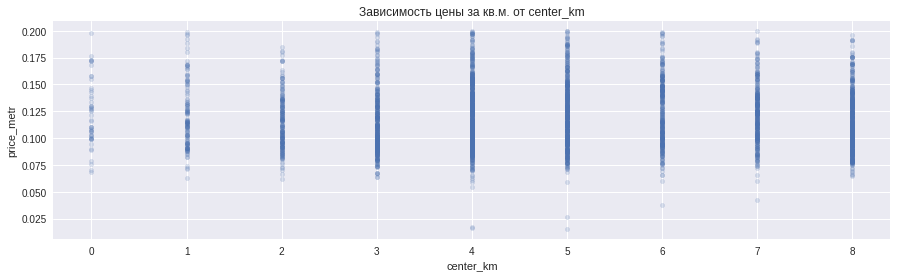

In [190]:
corr_price(df = piter_center.sort_values('center_km'), 
           column = 'center_km')

,center_km,count,price_mean,price_median
0,0,49,0.123136,0.117284
1,1,132,0.121263,0.114760
2,2,195,0.115359,0.112195
3,3,368,0.114022,0.106967
4,4,585,0.122984,0.121538
5,5,495,0.123379,0.120000
6,6,327,0.123996,0.119355
7,7,312,0.122515,0.122282
8,8,526,0.115273,0.110629


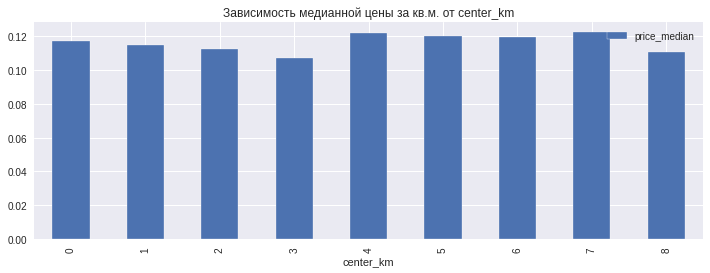

In [191]:
piter_center_km = pivot_price(df = piter_center, 
                       column = 'center_km', 
                       size = (12, 4))

Кстати, интернет говорит, что нулевой километр в Петербурге - это не Дворцовая площадь, и даже не Исакий. Нулевой километр в Петербурге находится на почтамтской улице (справедливости ради,это все-же недалеко от Исакия).

Медианные значения говорят нам о том, что в среднем цена квартир держится в центре в районе 120-125 тыс.руб., немного снижаясь (до 110 тыс.руб) в радиусе 2-3 км.
Однако, Средние значения и диаграмма рассеяния подсказывают, что в самом центре имеются хвосты из более редких но значительно более высоких цен.

#### Сегмент квартир в центре. Число комнат.

count    2989.000000
mean        2.445299
std         1.053824
min         0.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         7.000000
Name: rooms, dtype: float64

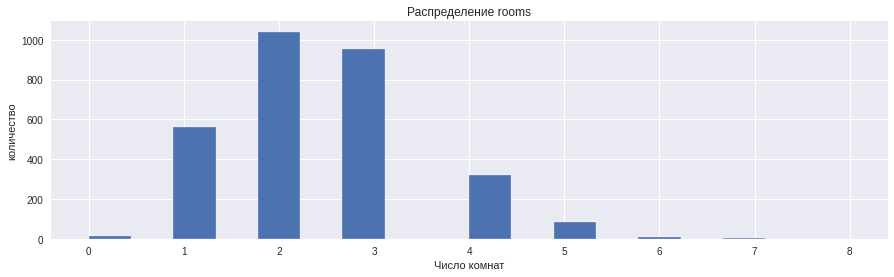

In [192]:
display(piter_center['rooms'].describe())

hist0(df = piter_center, 
     column = 'rooms', 
     name = 'Число комнат', 
     bins_n = 18,
     xmin = 0, 
     xmax = 8)

Коэффициент корреляции Пирсона между ценой и параметром rooms :  -0.3096711294823069



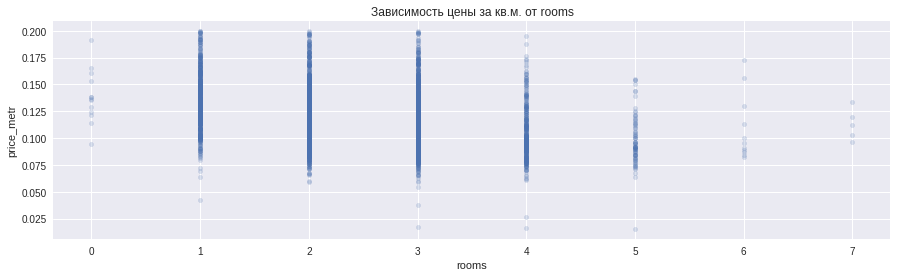

In [193]:
corr_price(df = piter_center,
           column = 'rooms')

,rooms,count,price_mean,price_median
0,0,13,0.138735,0.136564
1,1,561,0.135251,0.133508
2,2,1040,0.122079,0.119206
3,3,953,0.115600,0.109395
4,4,322,0.105920,0.100585
5,5,84,0.098081,0.092193
6,6,11,0.109108,0.095455
7,7,5,0.112992,0.111940


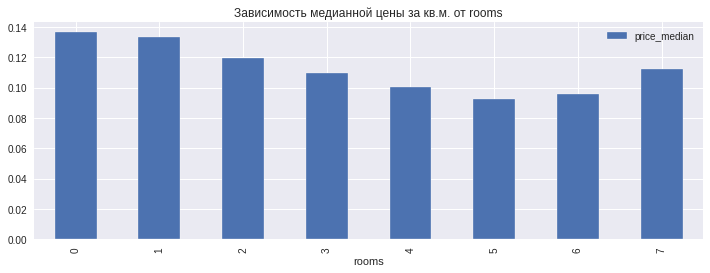

In [194]:
piter_center_rooms = pivot_price(df = piter_center, 
                                 column = 'rooms', 
                                 size = (12, 4))

По-прежнему больше всего квартир - это 2-х и 3-х-комнатные.\
Более 7 комнат - единичные случаи, поэтому понятие средней цены для них очень условно.\
Любопытно, что самые большие медианные цены наблюдаются для 0- и 1-комнатных квартир, с постепенным уменьшением цены по мере роста количества комнат. Тогда как в общем облаке данных наибольшие медианные цены были у 3- и 4-комнатных квартир.\

Кстати. После того, как мы отбросили часть данных для площадей более 600 кв.м., из выборки пропала единственная квартира на 12 комнат с очень высокой ценой (460 тыс.руб. за кв.м.). До фильтрации выборки по площади эта 12-комнатная квартира очень выделялаь на столбчатой диаграмме зависимости цены от числа комнат.

#### Сегмент квартир в центре. Высота потолков.

count    1959.000000
mean        2.987698
std         0.324701
min         2.500000
25%         2.800000
50%         3.000000
75%         3.200000
max         4.000000
Name: ceiling_height, dtype: float64

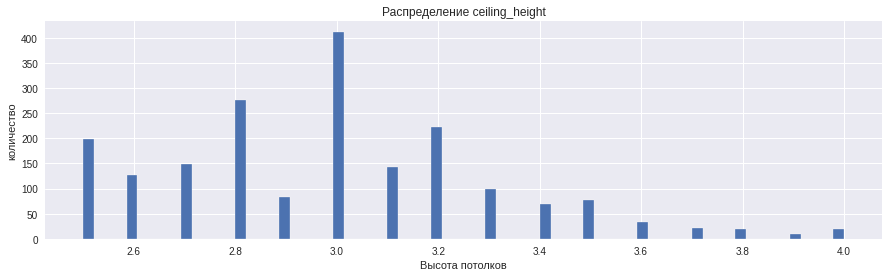

In [195]:
display(piter_center['ceiling_height'].describe())

hist0(df = piter_center, 
     column = 'ceiling_height', 
     name = 'Высота потолков', 
     bins_n = 70,
     xmin = 2.5, 
     xmax = 4)

в ценре гсподствуют трехметровые потолки! И этим всегда славился центр Петербурга.\
На втором месте - потолки 2.8 метра. Но помним, что в высотах потолков у нас очень много пропусков - примерно половина данных

Коэффициент корреляции Пирсона между ценой и параметром ceiling_height :  -0.014524105263729974



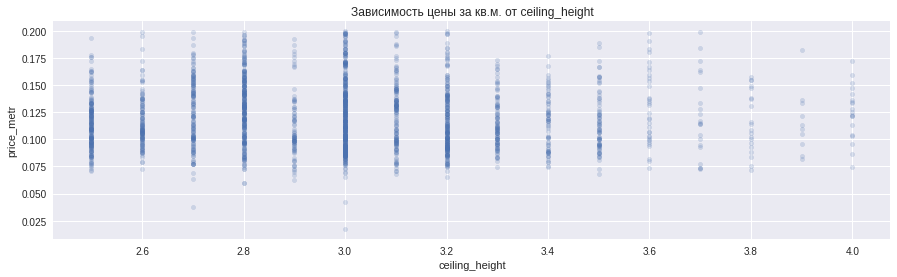

In [196]:
corr_price(df = piter_center,
          column = 'ceiling_height')

Центр Петербурга ассоциируется с просторными квартирами с высокими потолками.\
Потолки высотой более 4 метров - редкость.\
Самые дорогие квартиры - с потолками 2.8 - 3.2 м. И их достаточно много.

Проверим, что покажут медианные значения цен:

,ceiling_height,count,price_mean,price_median
0,2.5,198,0.114697,0.111722
1,2.6,126,0.115999,0.110286
2,2.7,148,0.125099,0.123840
3,2.8,277,0.130030,0.129854
4,2.9,84,0.111494,0.102470
5,3.0,412,0.123288,0.117661
6,3.1,143,0.123263,0.126928
7,3.2,222,0.116418,0.109410
8,3.3,99,0.115396,0.110569
9,3.4,69,0.116070,0.117105


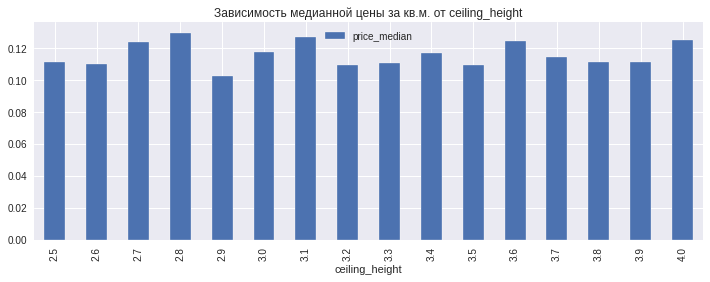

In [197]:
piter_center_ceiling = pivot_price(df = piter_center, 
                                   column = 'ceiling_height', 
                                   size = (12, 4))

Медианные значения говорят, что смые дорогие потолки -  2.8 и 3 м. \
На медианы потолков 2.4 м и более 4 метров не обращаем внимания - там слишком мало данных


#### Сегмент квартир в центре. Этаж.

In [198]:
plt.style.use('seaborn')

count       2989
unique         3
top       другое
freq        2144
Name: floor_type, dtype: object

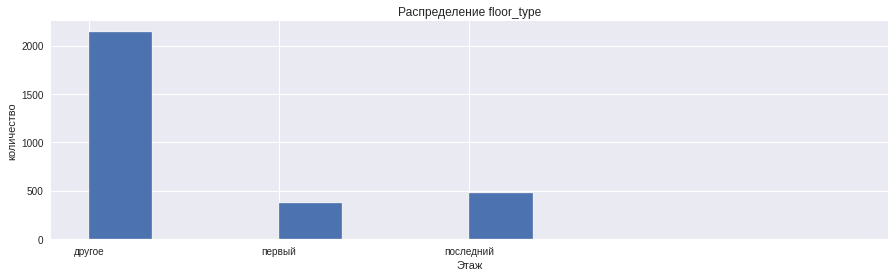

In [199]:
display(piter_center['floor_type'].describe())

hist0(df = piter_center, 
     column = 'floor_type', 
     name = 'Этаж', 
     bins_n = 12,
     xmin = 0, 
     xmax = 4)

Неохотно жители расстаются с первыми этажами в центре. Больше всего в продаже - "других" этажей

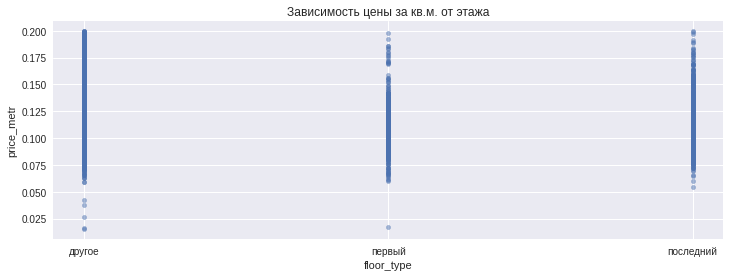

In [200]:
piter_center.plot(x = 'floor_type', 
                  y = 'price_metr', 
                  kind = 'scatter', 
                  title = 'Зависимость цены за кв.м. от этажа',
                  grid = True, 
                  figsize = (12, 4), 
                  alpha = 0.5)
plt.show()

,floor_type,count,price_mean,price_median
0,другое,2144,0.123185,0.120800
1,первый,366,0.108602,0.102532
2,последний,479,0.114953,0.110241


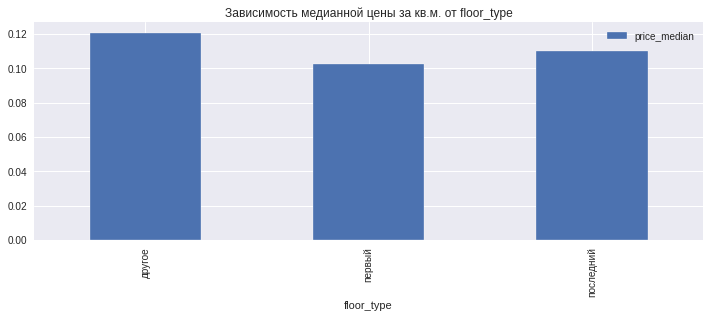

In [201]:
piter_center_ceiling = pivot_price(df = piter_center, 
                                   column = 'floor_type', 
                                   size = (12, 4))

А вот медианные цены для разных типов этажей близки: 110-120 тыс.руб.
Но по диаграммам рассеяния видно, что значения для "других" этажей более рассеяны и имеют хвост, уходящий выше 600 тыс.руб. Тогда как цены первых этажей более компактные и в целом меньше 300 тыс.руб.. 

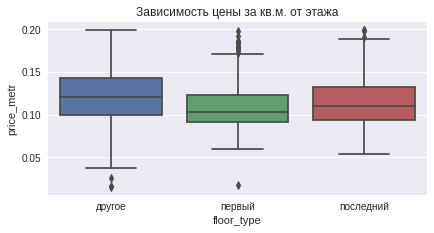

In [202]:
sns.catplot(x = "floor_type", 
            y = "price_metr", 
            kind = 'box',
            data = piter_center,
            height = 3, 
            aspect = 2)
plt.title('Зависимость цены за кв.м. от этажа')
plt.show()

#### Сегмент квартир в центре. Дата размещения объявления.

,weekday_expos,count,price_mean,price_median
0,0,458,0.121155,0.116847
1,1,520,0.119205,0.115059
2,2,506,0.121152,0.116439
3,3,591,0.119287,0.116364
4,4,527,0.118723,0.114655
5,5,222,0.120692,0.118756
6,6,165,0.122912,0.116667


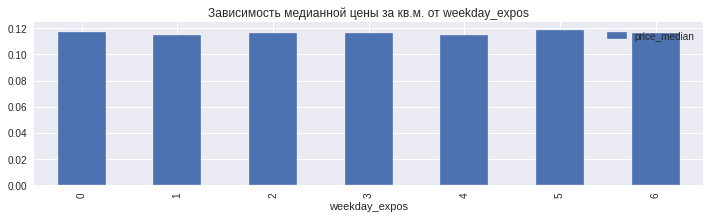

In [203]:
piter_center_weekday = pivot_price(df = piter_center, 
                                   column = 'weekday_expos', 
                                   size = (12, 3))

Неожиданно. В понедельник и в воскреенье медианные цены немного выше, чем в другие дни!

,month_expos,count,price_mean,price_median
0,1,162,0.122051,0.118688
1,2,306,0.119169,0.113453
2,3,325,0.123990,0.125000
3,4,304,0.121762,0.117117
4,5,179,0.119406,0.115297
5,6,227,0.113410,0.111039
6,7,230,0.119651,0.115181
7,8,243,0.123689,0.121581
8,9,282,0.120917,0.117133
9,10,279,0.119055,0.115431


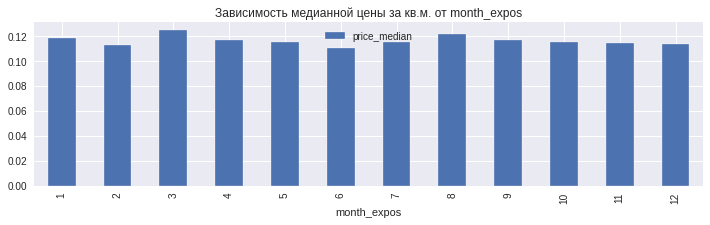

In [204]:
piter_center_month = pivot_price(df = piter_center, 
                                   column = 'month_expos', 
                                   size = (12, 3))

Как в в общей картине по региону, самые низкие цены - в июне. А вот самые высокие - в марте и августе.

Впрочем, разница в цене в зависимости от времени выставления на продажу относительно невелика. Площадь квартиры и число комнат гораздо сильнее влияет.

,year_expos,count,price_mean,price_median
0,2015,106,0.112163,0.108982
1,2016,348,0.115039,0.110213
2,2017,1123,0.118095,0.113333
3,2018,1036,0.121778,0.118123
4,2019,376,0.128226,0.127889


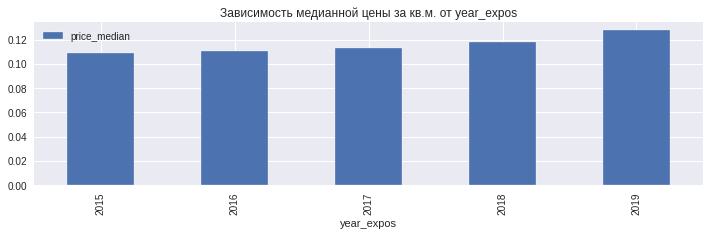

In [205]:
piter_center_year = pivot_price(df = piter_center, 
                                   column = 'year_expos', 
                                   size = (12, 3))

Равномерный рост цен на квартиры в центре Петербурга из года в год. 
При этом общий рост цены с 2015 по 2019 год составил почти 21.5%

[В оглавление](#content)

<a id='step5'></a>
## Шаг 5. Общий вывод

1. Для центра Санкт-Петербурга (в радиусе 9 км) характерны довольно большие разбросы цен. Есть "плотные" групы типичных цен до 200 тыс.руб.(медианы 110 - 120 тыс.руб. за кв.м.). Но есть и довольно много рассеянных значений сегмента высоких цен - 200-600 тыс.руб. за кв.м. Для всего остального региона все-таки характерны более однородные значения цен с небольшим понижением по мере удаления от центра. При этом медиана стоимости для всего региона - 95 тыс.руб. за кв.м.
2. В целом в центре питера квартиры чуть попросторнее: большая часть значений лежит в диапазоне от 50 до 100 кв.м., медиана - 72кв.м.. Тогда как для всего региона характерный диапазон - от 30 до 80 кв.м., медиана - 52 метра. Дорогое суперпросторное (более 120 кв.м.) жилье в центре Питера составляет примерно половину от всего суперпросторного жилья региона.
3. В центре города наиболее часто встречаются 2- и 3-комнатные квартиры, тогда как для всего остального региона также много и однушек. Медианные значения стоимости в центре выше у 0- и 1- комнатных квартир.  Но у 3-4-комнатных квартир больше рассеяние и длиннее хвосты в верхний сегмент цен (до 600-700 тыс.руб.).
4. В центре города довольно много потолков высотой 3 - 3.2 метра Цены на них медианные почти не отличаются от цен на 2.8 м. Однако, у потолков высотой 3 - 3.2 мета имеются хвосты в высокие цены - до 600 тыс.руб., тогда как потолки высотой 2.5-2.7 м не превышают 200 тыс.руб. Дле всего региона же в целом больше характерны квартиры с потолками 2.5-2.8м.
5. В центре города медианы цен на первые этажи процентов на 10 пониже цен на другие этажи. Однако, первые этажи не продаются дороже 300 тыс.руб. Тогда как другие этажи могут быть дороже 600 тыс.руб. Для всего региона картина похожая, только медианные знаения поменьше - первые этажи продаются за 80 тыс.руб, другие - чуь-чуть не дотягивают 100 тыс.
6. Дни недели выставления квартиры на продажу почти не влияют на цену. А вот месяц - влияет, хоть и не очень сильно. В июне самая низкая медианная цена как для цента Петербурга, так и для всего региона. Дороже продаются квартиры в августе. 
7. Вспомним, что в ценообразовании большую роль играет также и населенный пункт. Самые дорогие квартиры в Петербурге и в Пушкине. Самые дешевые - в Выборге.